In [2]:
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

### Data prep

In [16]:
len(latest_match_data[latest_match_data['rank_difference_abs'] >= 30])

3171

In [86]:
# dfteam2 = pd.DataFrame(latest_match_data['Team 2, Total Global Superstars'].value_counts())
# dfteam1 = pd.DataFrame(latest_match_data['Team 1, Total Global Superstars'].value_counts())

# dfboth = pd.concat([dfteam1, dfteam2], axis=1)
# dfboth.columns = ['Team 1', 'Team 2']
# dfboth['Count'] = dfboth['Team 1'] + dfboth['Team 2']
# dfboth = dfboth.drop(columns=['Team 1', 'Team 2'])
# dfboth.to_csv('num_lineups_with_X_stars.csv')

In [149]:
latest_match_data['Number_of_valuable_players_prediction_correct_inverse'].sum()

75

In [5]:
#latest_match_data = latest_match_data[(latest_match_data['Competition'] != 'Euros') & (latest_match_data['Competition'] != 'World Cup') & (latest_match_data['Competition'] != 'Copa America') & (latest_match_data['Competition'] != 'Gold Cup') & (latest_match_data['Competition'] != 'Olympics') & (latest_match_data['Competition'] != 'World Cup Qualifiers, UEFA') & (latest_match_data['Competition'] != 'World Cup Intercontinental Playoffs') & (latest_match_data['Competition'] != 'Africa Cup of Nations')]
# latest_match_data = latest_match_data[(latest_match_data['Global_Superstar_difference_abs'] < 1) & (latest_match_data['Team 1, Tier 1 Global Superstars'] == 0) & (latest_match_data['Team 2, Tier 1 Global Superstars'] == 0)]
#len(latest_match_data)
#len(latest_match_data[(latest_match_data['Team.1.Num.of.0.Value.Players'] != 0) | latest_match_data['Team.2.Num.of.0.Value.Players'] != 0])
#latest_match_data['mv_difference_abs'].std()

107962702.23757203

In [13]:
latest_match_data[latest_match_data['Global_Superstar_difference_abs'] != 0]['rank_prediction_correct'].sum()

1467

In [9]:
latest_match_data['Global_Superstar_difference_prediction_correct'].sum()

1482

In [14]:
len(latest_match_data[latest_match_data['rank_difference_abs'] >= 50])

2119

In [6]:
import pandas as pd

# Assuming latest_match_data is already loaded as a DataFrame

# Group by 'Competition' and calculate the sum and count for 'mv_prediction_correct' and 'rank_prediction_correct'
summary_df = latest_match_data.groupby('Competition').agg(
    mv_prediction_correct_sum=('MV_Prediction_Correct', 'sum'),
    rank_prediction_correct_sum=('rank_prediction_correct', 'sum'),
    count=('Competition', 'size')
).reset_index()

# Calculate the percentage
summary_df['mv_prediction_correct_percentage'] = summary_df['mv_prediction_correct_sum'] / summary_df['count'] * 100
summary_df['rank_prediction_correct_percentage'] = summary_df['rank_prediction_correct_sum'] / summary_df['count'] * 100

# Display the summary DataFrame
summary_df

Competition  mv_prediction_correct_sum  \
0                 Africa Cup of Nations                        115   
1     Africa Cup of Nations, Qualifiers                        401   
2                          Copa America                         68   
3                                 Euros                         60   
4                     Euros, Qualifiers                        507   
5                              Gold Cup                        112   
6                        Nations League                        242   
7                             World Cup                        114   
8   World Cup Intercontinental Playoffs                          5   
9          World Cup Qualifiers, Africa                        263   
10           World Cup Qualifiers, Asia                        425   
11       World Cup Qualifiers, CONCACAF                        222   
12       World Cup Qualifiers, CONMEBOL                        144   
13         World Cup Qualifiers, Europe                        533   

    rank_prediction_correct_sum  count  mv_prediction_correct_percentage  \
0                           115    220                         52.272727   
1                           389    710                         56.478873   
2                            67    112                         60.714286   
3                            57    102                         58.823529   
4                           514    740                         68.513514   
5                           101    169                         66.272189   
6                           222    454                         53.303965   
7                           119    192                         59.375000   
8                             6     10                         50.000000   
9                           268    488                         53.893443   
10                          425    650                         65.384615   
11                          228    372                         59.677419   
12                          138    251                         57.370518   
13                          523    780                         68.333333   

    rank_prediction_correct_percentage  
0                            52.272727  
1                            54.788732  
2                            59.821429  
3                            55.882353  
4                            69.459459  
5                            59.763314  
6                            48.898678  
7                            61.979167  
8                            60.000000  
9                            54.918033  
10                           65.384615  
11                           61.290323  
12                           54.980080  
13                           67.051282

In [4]:
latest_match_data

Match.ID  \
0             World Cup Qualifiers, Asia_95   
1            World Cup Qualifiers, Asia_256   
2            World Cup Qualifiers, Asia_295   
3            World Cup Qualifiers, Asia_299   
4          World Cup Qualifiers, Africa_111   
...                                     ...   
5321  Africa Cup of Nations, Qualifiers_710   
5322  Africa Cup of Nations, Qualifiers_711   
5323  Africa Cup of Nations, Qualifiers_712   
5324  Africa Cup of Nations, Qualifiers_713   
5325  Africa Cup of Nations, Qualifiers_714   

                            Competition                               Match  \
0            World Cup Qualifiers, Asia                     Iran vs Bahrain   
1            World Cup Qualifiers, Asia              Chinese Taipei vs Iraq   
2            World Cup Qualifiers, Asia                 Yemen vs Uzbekistan   
3            World Cup Qualifiers, Asia               Uzbekistan vs Bahrain   
4          World Cup Qualifiers, Africa                   DR Congo vs Libya   
...                                 ...                                 ...   
5321  Africa Cup of Nations, Qualifiers               Seychelles vs Lesotho   
5322  Africa Cup of Nations, Qualifiers             Djibouti vs South Sudan   
5323  Africa Cup of Nations, Qualifiers                 Somalia vs Eswatini   
5324  Africa Cup of Nations, Qualifiers                  Chad vs The Gambia   
5325  Africa Cup of Nations, Qualifiers  São Tomé and Príncipe vs Mauritius   

            Date  Season            Team.1.Name Team.1.Code  \
0     2011-10-11    2011                   Iran          IR   
1     2015-11-17    2015         Chinese Taipei          TW   
2     2015-11-17    2015                  Yemen          YE   
3     2016-03-29    2016             Uzbekistan          UZ   
4     2013-03-24    2013               DR Congo          DR   
...          ...     ...                    ...         ...   
5321  2022-03-23    2022             Seychelles         SCH   
5322  2022-03-23    2022               Djibouti          DJ   
5323  2022-03-23    2022                Somalia          SO   
5324  2022-03-23    2022                   Chad          TD   
5325  2022-03-24    2022  São Tomé and Príncipe          ST   

                                         Team.1.Players  \
0     ['Mehdi Rahmati', 'Hadi Aghili', 'Seyed Jalal ...   
1     ['Yu-Hung Chiu', 'Ming-Han Chiang', 'Ruei Wang...   
2     ['Mohammed Ayash', 'Hamada Al-Zubairi', 'Moham...   
3     ['Aleksandr Lobanov', 'Anzur Ismoilov', 'Egor ...   
4     ['Robert Muteba Kidiaba', 'Cédric Mongongu', '...   
...                                                 ...   
5321  ['Alvin Michel', 'Don Fanchette', 'Benoit Mari...   
5322  ['Innocent Mbonihankuye', 'Moussa Hamadou Arai...   
5323  ['Mustaf Yuusuf', 'Ahmed Said Ahmed', 'Haji Ab...   
5324  ['Gabin Allambatnan', 'Aubin Mbaigolmem', 'Abd...   
5325  ['Primo', 'Vavá Pequeno', 'Ivonaldo Viegas', '...   

                               Team.1.Players_Positions  \
0     ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
1     ['Goalkeeper', 'Defender', 'Centre-Back', 'Cen...   
2     ['Goalkeeper', 'Centre-Back', 'Right-Back', 'C...   
3     ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
4     ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
...                                                 ...   
5321  ['Goalkeeper', 'Defender', 'Defender', 'Defend...   
5322  ['Goalkeeper', 'Centre-Back', 'Right-Back', 'L...   
5323  ['Goalkeeper', 'Centre-Back', 'Defensive Midfi...   
5324  ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
5325  ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   

                                Team.1.Values.By.Player  Team.2.Name  \
0     1250000,1100000,3e+06,520000,8e+05,4e+06,75000...      Bahrain   
1                     0,0,0,0,0,0,0,75000,75000,0,25000         Iraq   
2                                 0,0,0,0,0,0,0,0,0,0,0   Uzbekistan   
3     6e+05,450000,3e+05,5e+06,4e+05,650000,5e+06,8e...   

In [3]:
latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/latest_match_data_positions_fixed_home_away_FIXED_value_scores_ADDED_AUGUST_11.csv')
#latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_1_superstar_August_11.csv') #match_data_1_superstar_each_August_11 #match_data_0_superstars_each_team_August_11
#latest_match_data = latest_match_data[latest_match_data['Global_Superstar_difference'] == -1]
#latest_match_data = latest_match_data[latest_match_data['rank_difference_abs'] <= 15]
latest_match_data = latest_match_data[latest_match_data['Competition'] != 'Olympics']
latest_match_data['value_score_difference_abs'] = abs(latest_match_data['value_score_difference'])
# Add "more_valuable_team_value_score" column
latest_match_data['more_valuable_team_value_score'] = np.where(
    latest_match_data['Market.Value.Difference'] > 0,
    latest_match_data['team 1 total value score'],
    latest_match_data['team 2 total value score']
)
#latest_match_data = latest_match_data[latest_match_data['value_score_nan_boolean'] == 0]
latest_match_data = latest_match_data[latest_match_data['Match Result Changed'] != True]
latest_match_data = latest_match_data.drop(columns=['Unnamed: 0'])
pd.set_option('display.max_columns', None)
latest_match_data



Match.ID  \
0             World Cup Qualifiers, Asia_95   
1            World Cup Qualifiers, Asia_256   
2            World Cup Qualifiers, Asia_295   
3            World Cup Qualifiers, Asia_299   
4          World Cup Qualifiers, Africa_111   
...                                     ...   
5321  Africa Cup of Nations, Qualifiers_710   
5322  Africa Cup of Nations, Qualifiers_711   
5323  Africa Cup of Nations, Qualifiers_712   
5324  Africa Cup of Nations, Qualifiers_713   
5325  Africa Cup of Nations, Qualifiers_714   

                            Competition                               Match  \
0            World Cup Qualifiers, Asia                     Iran vs Bahrain   
1            World Cup Qualifiers, Asia              Chinese Taipei vs Iraq   
2            World Cup Qualifiers, Asia                 Yemen vs Uzbekistan   
3            World Cup Qualifiers, Asia               Uzbekistan vs Bahrain   
4          World Cup Qualifiers, Africa                   DR Congo vs Libya   
...                                 ...                                 ...   
5321  Africa Cup of Nations, Qualifiers               Seychelles vs Lesotho   
5322  Africa Cup of Nations, Qualifiers             Djibouti vs South Sudan   
5323  Africa Cup of Nations, Qualifiers                 Somalia vs Eswatini   
5324  Africa Cup of Nations, Qualifiers                  Chad vs The Gambia   
5325  Africa Cup of Nations, Qualifiers  São Tomé and Príncipe vs Mauritius   

            Date  Season            Team.1.Name Team.1.Code  \
0     2011-10-11    2011                   Iran          IR   
1     2015-11-17    2015         Chinese Taipei          TW   
2     2015-11-17    2015                  Yemen          YE   
3     2016-03-29    2016             Uzbekistan          UZ   
4     2013-03-24    2013               DR Congo          DR   
...          ...     ...                    ...         ...   
5321  2022-03-23    2022             Seychelles         SCH   
5322  2022-03-23    2022               Djibouti          DJ   
5323  2022-03-23    2022                Somalia          SO   
5324  2022-03-23    2022                   Chad          TD   
5325  2022-03-24    2022  São Tomé and Príncipe          ST   

                                         Team.1.Players  \
0     ['Mehdi Rahmati', 'Hadi Aghili', 'Seyed Jalal ...   
1     ['Yu-Hung Chiu', 'Ming-Han Chiang', 'Ruei Wang...   
2     ['Mohammed Ayash', 'Hamada Al-Zubairi', 'Moham...   
3     ['Aleksandr Lobanov', 'Anzur Ismoilov', 'Egor ...   
4     ['Robert Muteba Kidiaba', 'Cédric Mongongu', '...   
...                                                 ...   
5321  ['Alvin Michel', 'Don Fanchette', 'Benoit Mari...   
5322  ['Innocent Mbonihankuye', 'Moussa Hamadou Arai...   
5323  ['Mustaf Yuusuf', 'Ahmed Said Ahmed', 'Haji Ab...   
5324  ['Gabin Allambatnan', 'Aubin Mbaigolmem', 'Abd...   
5325  ['Primo', 'Vavá Pequeno', 'Ivonaldo Viegas', '...   

                               Team.1.Players_Positions  \
0     ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
1     ['Goalkeeper', 'Defender', 'Centre-Back', 'Cen...   
2     ['Goalkeeper', 'Centre-Back', 'Right-Back', 'C...   
3     ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
4     ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
...                                                 ...   
5321  ['Goalkeeper', 'Defender', 'Defender', 'Defend...   
5322  ['Goalkeeper', 'Centre-Back', 'Right-Back', 'L...   
5323  ['Goalkeeper', 'Centre-Back', 'Defensive Midfi...   
5324  ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   
5325  ['Goalkeeper', 'Centre-Back', 'Centre-Back', '...   

                                Team.1.Values.By.Player  Team.2.Name  \
0     1250000,1100000,3e+06,520000,8e+05,4e+06,75000...      Bahrain   
1                     0,0,0,0,0,0,0,75000,75000,0,25000         Iraq   
2                                 0,0,0,0,0,0,0,0,0,0,0   Uzbekistan   
3     6e+05,450000,3e+05,5e+06,4e+05,650000,5e+06,8e...   

In [ ]:
#DEPRECATED AS OF AUGUST 11

latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/latest_match_data_positions_fixed_home_away_FIXED_value_scores_ADDED_July_29.csv')
latest_match_data = latest_match_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

latest_match_data['MV_Prediction_Correct_inverse'] = np.where(
    (latest_match_data['Market.Value.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Market.Value.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)

latest_match_data['Rank_Prediction_Correct_inverse'] = np.where(
    (latest_match_data['Rank.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Rank.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)

# Add "Team with Superstar MV" column
latest_match_data['Team with Superstar MV'] = np.where(
    latest_match_data['Team 1, Total Confederation Stars'] == 1,
    latest_match_data['Team.1.Total.Market.Value'],
    latest_match_data['Team.2.Total.Market.Value']
)

# Add "Team without Superstar MV" column
latest_match_data['Team without Superstar MV'] = np.where(
    latest_match_data['Team 1, Total Confederation Stars'] == 0,
    latest_match_data['Team.1.Total.Market.Value'],
    latest_match_data['Team.2.Total.Market.Value']
)

latest_match_data['Confederation_star_prediction_correct'] = np.where(
    (latest_match_data['Team 1, Total Confederation Stars'] == 1) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Team 1, Total Confederation Stars'] == 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)

latest_match_data['Confederation_star_prediction_correct_inverse'] = np.where(
    (latest_match_data['Team 1, Total Confederation Stars'] == 1) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Team 1, Total Confederation Stars'] == 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)

latest_match_data['Team.1.Wins'] = np.where(latest_match_data['Score.Difference'] > 0, 1, 0)
latest_match_data['Team.2.Wins'] = np.where(latest_match_data['Score.Difference'] < 0, 1, 0)

latest_match_data['Smaller Number of 0 Value Players'] = np.minimum(latest_match_data['Team.1.Num.of.0.Value.Players'], latest_match_data['Team.2.Num.of.0.Value.Players'])

latest_match_data['Number.of.Valuable.Players.Difference.Absolute'] = abs(latest_match_data['Number.of.Valuable.Players.Difference'])

latest_match_data['less_valuable_team_num_confed_stars'] = np.where(
    latest_match_data['Market.Value.Difference'] < 0,
    latest_match_data['Team 1, Total Confederation Stars'],
    latest_match_data['Team 2, Total Confederation Stars']
)

latest_match_data['worse_rank_team_num_confed_stars'] = np.where(
    latest_match_data['Rank.Difference'] < 0,
    latest_match_data['Team 1, Total Confederation Stars'],
    latest_match_data['Team 2, Total Confederation Stars']
)
latest_match_data.to_csv('latest_match_data_positions_fixed_home_away_FIXED_value_scores_ADDED_AUGUST_11.CSV')
latest_match_data

In [ ]:
# # OLD DATA CODE II - deprecated as of JUly 20

# latest_match_data['Team 1, Total Confederation Stars'] = latest_match_data['Team 1, Tier 1 Confederation Stars'] + latest_match_data['Team 1, Tier 2 Confederation Stars']
# latest_match_data['Team 2, Total Confederation Stars'] = latest_match_data['Team 2, Tier 1 Confederation Stars'] + latest_match_data['Team 2, Tier 2 Confederation Stars']

# latest_match_data['Confederation_star_difference'] = latest_match_data['Team 1, Total Confederation Stars'] - latest_match_data['Team 2, Total Confederation Stars']
# latest_match_data['Confederation_difference_abs'] = abs(latest_match_data['Confederation_star_difference'])


# #CROSS SECTIONS JULY 20
# ###DONE
# #latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_0_superstars_each_team.csv') #1-1
# #latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_1_superstar_each.csv') #1-2
# #latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_1_superstar_on_one_team.csv') #1-3
# #latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_0_confed_superstars.csv') #1-4
# #latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_1_confed_superstar_on_one_team.csv') #1-5
# # latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/match_data_1_confed_superstar_tier_1_on_one_team.csv') #1-5 but didnt use



# latest_match_data['MV_Prediction_Correct_inverse'] = np.where(
#     (latest_match_data['Market.Value.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
#     np.where(
#         (latest_match_data['Market.Value.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
#     )
# )

# latest_match_data['Rank_Prediction_Correct_inverse'] = np.where(
#     (latest_match_data['Rank.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
#     np.where(
#         (latest_match_data['Rank.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
#     )
# )

# # Add "Team with Superstar MV" column
# latest_match_data['Team with Superstar MV'] = np.where(
#     latest_match_data['Team 1, Total Confederation Stars'] == 1,
#     latest_match_data['Team.1.Total.Market.Value'],
#     latest_match_data['Team.2.Total.Market.Value']
# )

# # Add "Team without Superstar MV" column
# latest_match_data['Team without Superstar MV'] = np.where(
#     latest_match_data['Team 1, Total Confederation Stars'] == 0,
#     latest_match_data['Team.1.Total.Market.Value'],
#     latest_match_data['Team.2.Total.Market.Value']
# )

# latest_match_data['Confederation_star_prediction_correct'] = np.where(
#     (latest_match_data['Team 1, Total Confederation Stars'] == 1) & (latest_match_data['Score.Difference'] > 0), 1,
#     np.where(
#         (latest_match_data['Team 1, Total Confederation Stars'] == 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
#     )
# )

# latest_match_data['Confederation_star_prediction_correct_inverse'] = np.where(
#     (latest_match_data['Team 1, Total Confederation Stars'] == 1) & (latest_match_data['Score.Difference'] < 0), 1,
#     np.where(
#         (latest_match_data['Team 1, Total Confederation Stars'] == 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
#     )
# )

# latest_match_data['Team.1.Wins'] = np.where(latest_match_data['Score.Difference'] > 0, 1, 0)
# latest_match_data['Team.2.Wins'] = np.where(latest_match_data['Score.Difference'] < 0, 1, 0)

# latest_match_data['Smaller Number of 0 Value Players'] = np.minimum(latest_match_data['Team.1.Num.of.0.Value.Players'], latest_match_data['Team.2.Num.of.0.Value.Players'])

# latest_match_data['Number.of.Valuable.Players.Difference.Absolute'] = abs(latest_match_data['Number.of.Valuable.Players.Difference'])
#latest_match_data.to_csv('create_dataset_1/CSVs we use often/latest_match_data_july_21_superstar_info_recalculated_columns_added.csv')

In [2]:
# OLD DATA CODE - WE USED THIS ALREADY AND DONT NEED TO RUN THIS AGAIN
latest_match_data = pd.read_csv('create_dataset_1/CSVs we use often/latest_match_data_july_12_superstar_info_recalculated.csv') #latest_match_data_july_12_superstar_info_recalculated
latest_match_data.drop(columns=['Unnamed: 0'], inplace=True)

#lates_data_ranking_difference__Mv_difference_opposite.csv



# Calculate win percentage for the more valuable team
latest_match_data['mv_difference_abs'] = latest_match_data['Market.Value.Difference'].abs()
# Assuming 'latest_match_data' is already loaded
latest_match_data['MV_Prediction_Correct'] = np.where(
    (latest_match_data['Market.Value.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Market.Value.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)
latest_match_data['smaller_team_value'] = latest_match_data[['Team.1.Total.Market.Value', 'Team.2.Total.Market.Value']].min(axis=1)

# Calculate win percentage for the more valuable team
latest_match_data['rank_difference_abs'] = latest_match_data['Rank.Difference'].abs()
# Assuming 'latest_match_data' is already loaded
latest_match_data['rank_prediction_correct'] = np.where(
    (latest_match_data['Rank.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Rank.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)
latest_match_data['smaller_team_rank'] = latest_match_data[['Team.1.Rank', 'Team.2.Rank']].max(axis=1)

latest_match_data['Team 1, Total Global Superstars'] = latest_match_data['Team 1, Tier 1 Global Superstars'] + latest_match_data['Team 1, Tier 2 Global Superstars']
latest_match_data['Team 2, Total Global Superstars'] = latest_match_data['Team 2, Tier 1 Global Superstars'] + latest_match_data['Team 2, Tier 2 Global Superstars']

latest_match_data['Global_Superstar_difference'] = latest_match_data['Team 1, Total Global Superstars'] - latest_match_data['Team 2, Total Global Superstars']
latest_match_data['Global_Superstar_difference_abs'] = latest_match_data['Global_Superstar_difference'].abs()
latest_match_data['Global_Superstar_difference_prediction_correct'] = np.where(
    (latest_match_data['Global_Superstar_difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Global_Superstar_difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)

latest_match_data['Global_Superstar_difference_prediction_correct_inverse'] = np.where(
    (latest_match_data['Global_Superstar_difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Global_Superstar_difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)

latest_match_data['Number_of_valuable_players_prediction_correct'] = np.where(
    (latest_match_data['Number.of.Valuable.Players.Difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Number.of.Valuable.Players.Difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)

latest_match_data['Number_of_valuable_players_prediction_correct_inverse'] = np.where(
    (latest_match_data['Number.of.Valuable.Players.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Number.of.Valuable.Players.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)

# Create the column less_valuable_team_FIFA_ranking
latest_match_data['less_valuable_team_FIFA_ranking'] = np.where(
    latest_match_data['Market.Value.Difference'] < 0,
    latest_match_data['Team.1.Rank'],
    np.where(
        latest_match_data['Market.Value.Difference'] > 0,
        latest_match_data['Team.2.Rank'],
        np.nan  # or any other value you prefer for the case when Market.Value.Difference is exactly 0
    )
)

# Create the column worse_ranked_team_value
latest_match_data['worse_ranked_team_value'] = np.where(
    latest_match_data['Rank.Difference'] < 0,
    latest_match_data['Team.1.Total.Market.Value'],
    np.where(
        latest_match_data['Rank.Difference'] > 0,
        latest_match_data['Team.2.Total.Market.Value'],
        np.nan  # or any other value you prefer for the case when Market.Value.Difference is exactly 0
    )
)

## AUGUST 11 - PLOTS 3 - FINAL SET 

### X = ∆Rank interval, Y = competition (categorical variable)

#### BEtter ranked team

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/2093320026.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '76.47%
(17)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/2093320026.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.00%
(20)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/2093320026.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

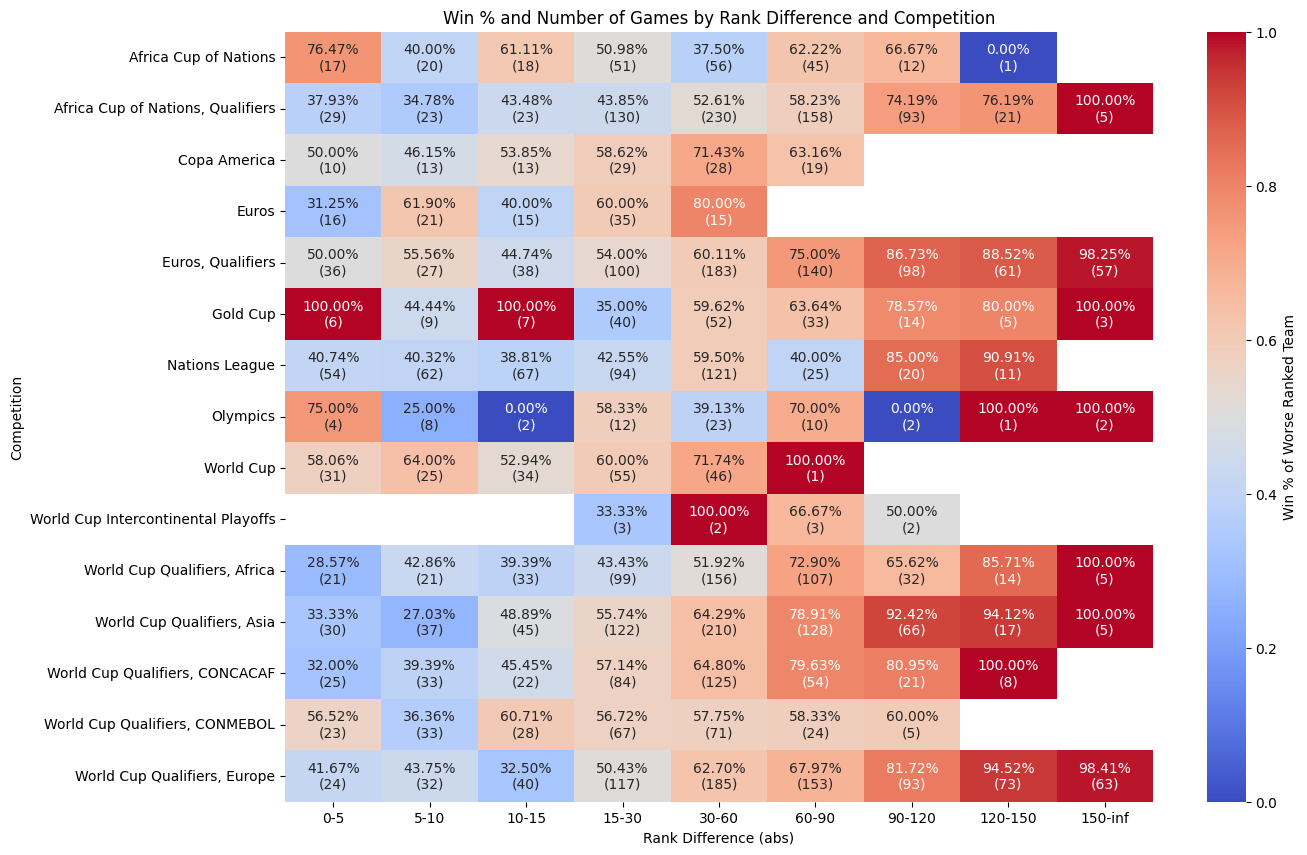

In [10]:
plot_type = 'better_ranked_team'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[i]
        rank_upper_bound = rank_difference_abs_intervals[i + 1]
        
        rank_filtered_data = competition_data[(competition_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (competition_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = rank_filtered_data['rank_prediction_correct'].sum()
        
        results.append({
            'competition': competition,
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count,
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for rank_prediction_correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Rank Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_competition_{plot_type}.png') 
plt.show()

#### Worse ranked team

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3370957699.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.88%
(17)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3370957699.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35.00%
(20)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3370957699.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise 

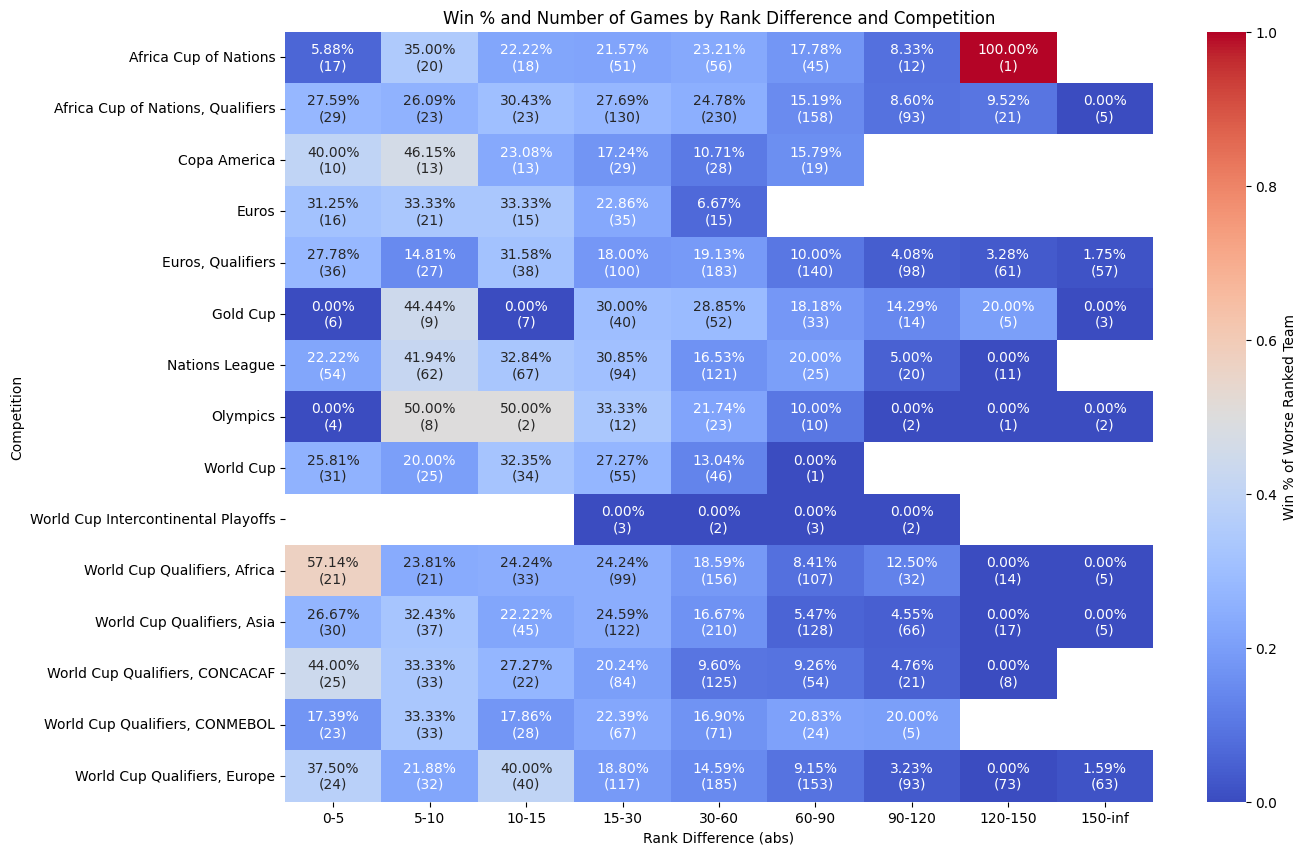

In [11]:
plot_type = 'worse_ranked_team'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[i]
        rank_upper_bound = rank_difference_abs_intervals[i + 1]
        
        rank_filtered_data = competition_data[(competition_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (competition_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = rank_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'competition': competition,
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count,
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for rank_prediction_correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Rank Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_competition_{plot_type}.png') 
plt.show()

### X = ∆MV interval, Y = competition (categorical variable)

#### Win% of more valuable team

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/166454534.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/166454534.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/166454534.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a fu

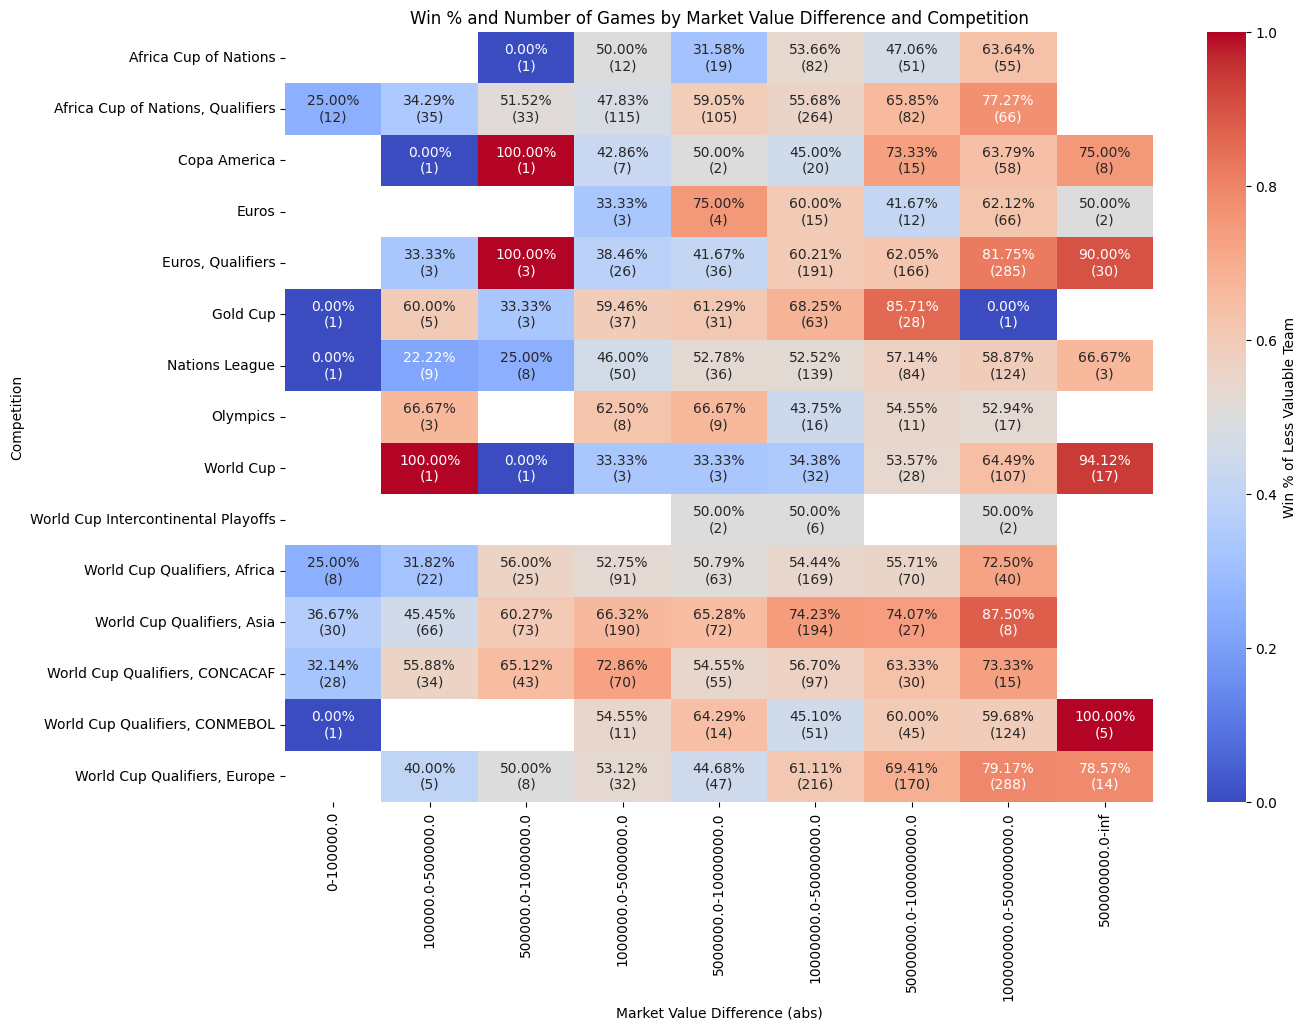

In [8]:
plot_type = 'more_valuable_team'
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(mv_difference_abs_intervals) - 1):
        mv_lower_bound = mv_difference_abs_intervals[i]
        mv_upper_bound = mv_difference_abs_intervals[i + 1]
        
        mv_filtered_data = competition_data[(competition_data['mv_difference_abs'] >= mv_lower_bound) &
                                            (competition_data['mv_difference_abs'] < mv_upper_bound)]
        
        # Count the number of rows
        row_count = len(mv_filtered_data)
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = mv_filtered_data['MV_Prediction_Correct'].sum()
        
        results.append({
            'competition': competition,
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'count': row_count,
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='mv_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for MV_Prediction_Correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Market Value Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/mv_diff_vs_competition_{plot_type}.png') 
plt.show()

#### Win% of less valuable team

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1662534543.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1662534543.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1662534543.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in

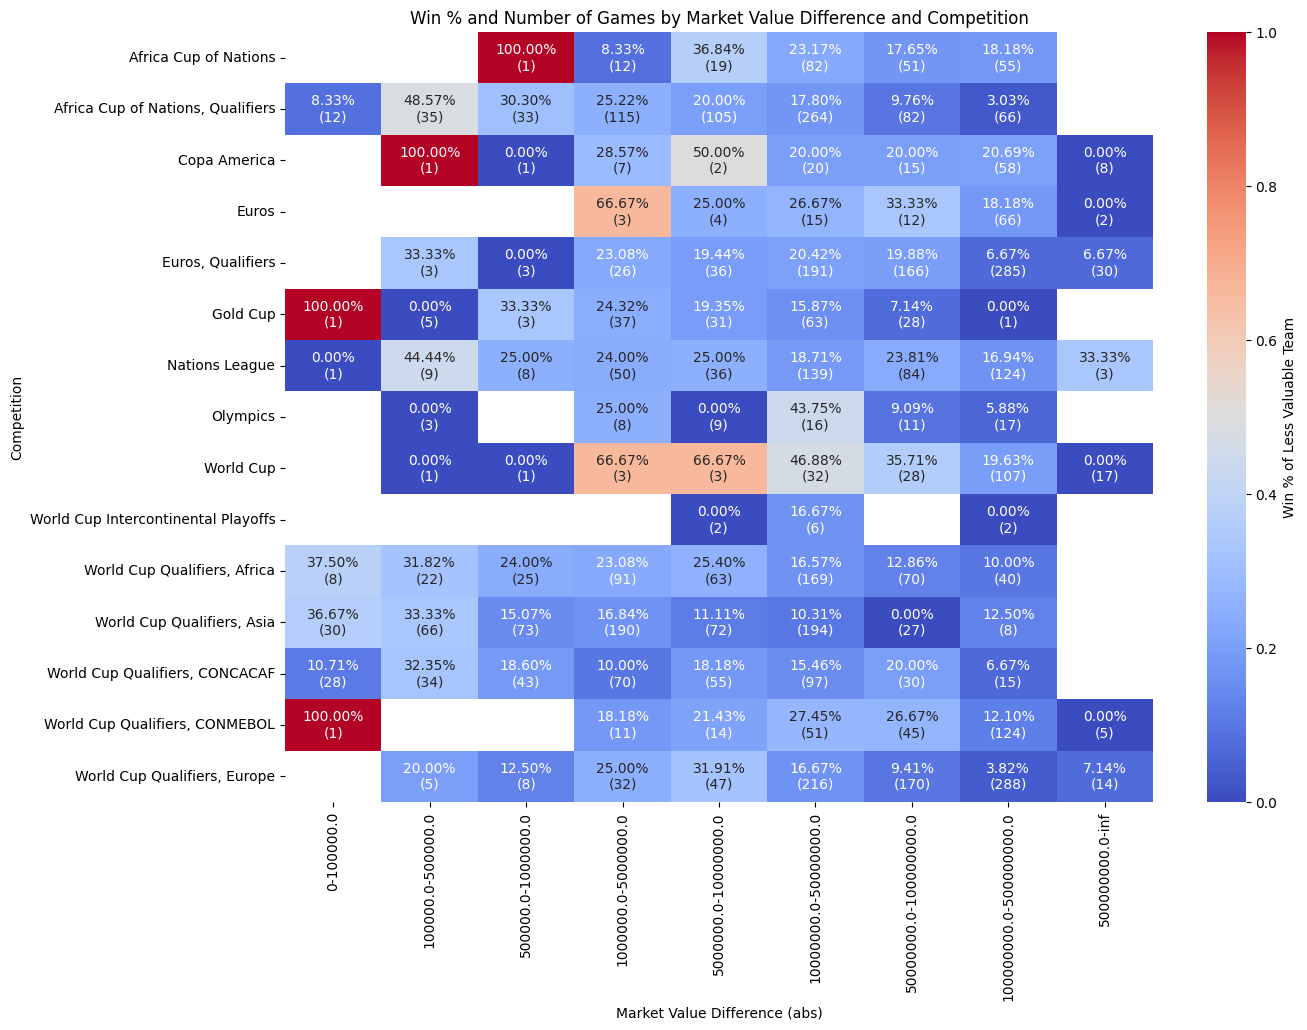

In [9]:
plot_type = 'less_valuable_team'
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(mv_difference_abs_intervals) - 1):
        mv_lower_bound = mv_difference_abs_intervals[i]
        mv_upper_bound = mv_difference_abs_intervals[i + 1]
        
        mv_filtered_data = competition_data[(competition_data['mv_difference_abs'] >= mv_lower_bound) &
                                            (competition_data['mv_difference_abs'] < mv_upper_bound)]
        
        # Count the number of rows
        row_count = len(mv_filtered_data)
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = mv_filtered_data['MV_Prediction_Correct_inverse'].sum()
        
        results.append({
            'competition': competition,
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'count': row_count,
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='mv_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for MV_Prediction_Correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Market Value Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/mv_diff_vs_competition_{plot_type}.png') 
plt.show()

### X = ∆Stars interval (11), Y = competition (categorical variable)

#### More stars

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/521815131.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '33.70%
(92)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/521815131.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '53.16%
(79)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/521815131.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in

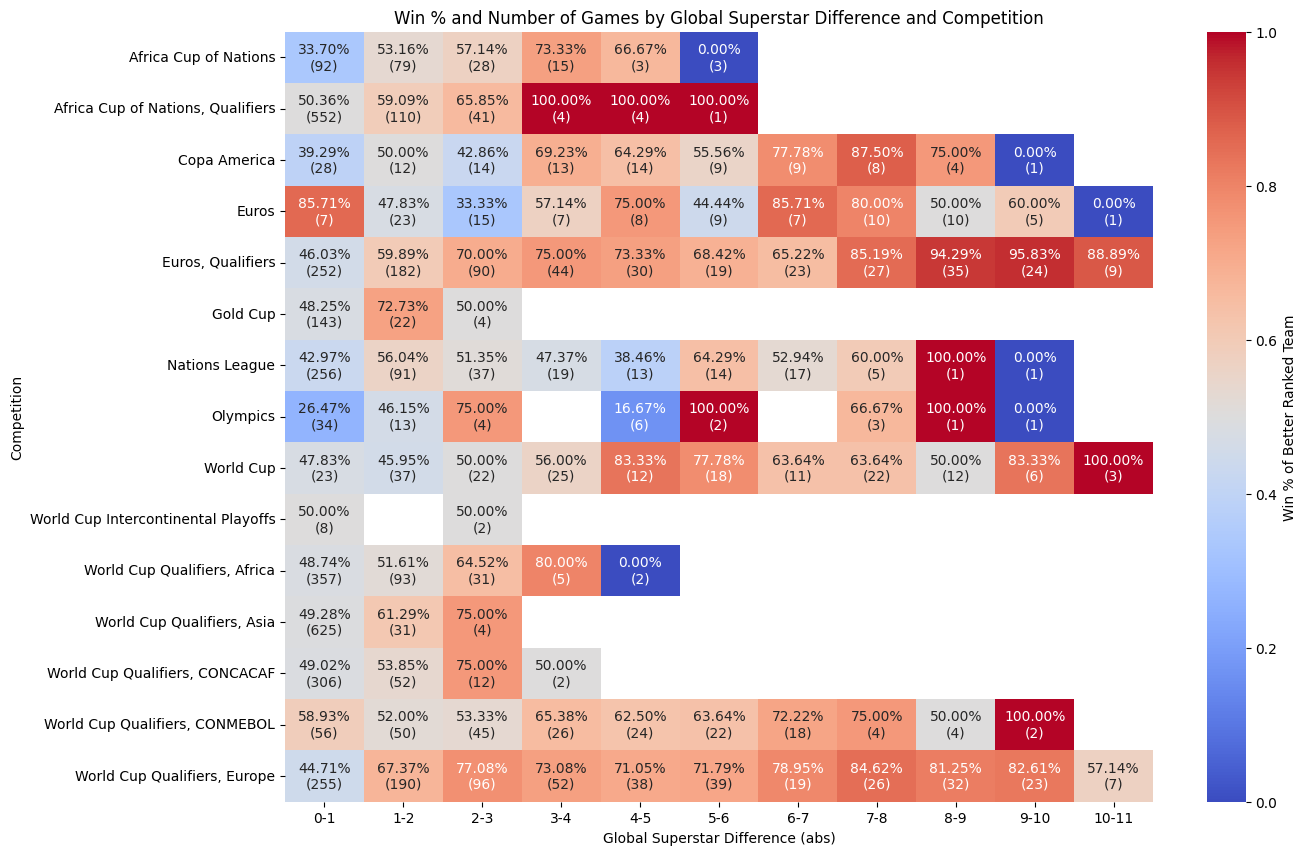

In [15]:
plot_type = 'more_stars_team'
# Define the intervals (bins)
global_superstar_difference_abs_intervals = list(range(12))  # From 0 to 11

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(global_superstar_difference_abs_intervals) - 1):
        gs_lower_bound = global_superstar_difference_abs_intervals[i]
        gs_upper_bound = global_superstar_difference_abs_intervals[i + 1]
        
        gs_filtered_data = competition_data[(competition_data['Global_Superstar_difference_abs'] >= gs_lower_bound) &
                                            (competition_data['Global_Superstar_difference_abs'] < gs_upper_bound)]
        
        # Count the number of rows
        row_count = len(gs_filtered_data)
        
        # Sum the appropriate values
        if gs_lower_bound == 0:
            gs_prediction_sum = gs_filtered_data['Team.1.Wins'].sum()
        else:
            gs_prediction_sum = gs_filtered_data['Global_Superstar_difference_prediction_correct'].sum()
        
        results.append({
            'competition': competition,
            'global_superstar_difference_abs_interval': f"{gs_lower_bound}-{gs_upper_bound}",
            'count': row_count,
            'sum_global_superstar_prediction_correct': gs_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='global_superstar_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for Global_Superstar_difference_prediction_correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='global_superstar_difference_abs_interval', values='sum_global_superstar_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [f"{i}-{i+1}" for i in range(11)]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Better Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Global Superstar Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Global Superstar Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/global_superstar_diff_vs_competition_{plot_type}.png') 
plt.show()

#### LEss stars

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3537728355.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '33.70%
(92)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3537728355.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '25.32%
(79)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3537728355.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

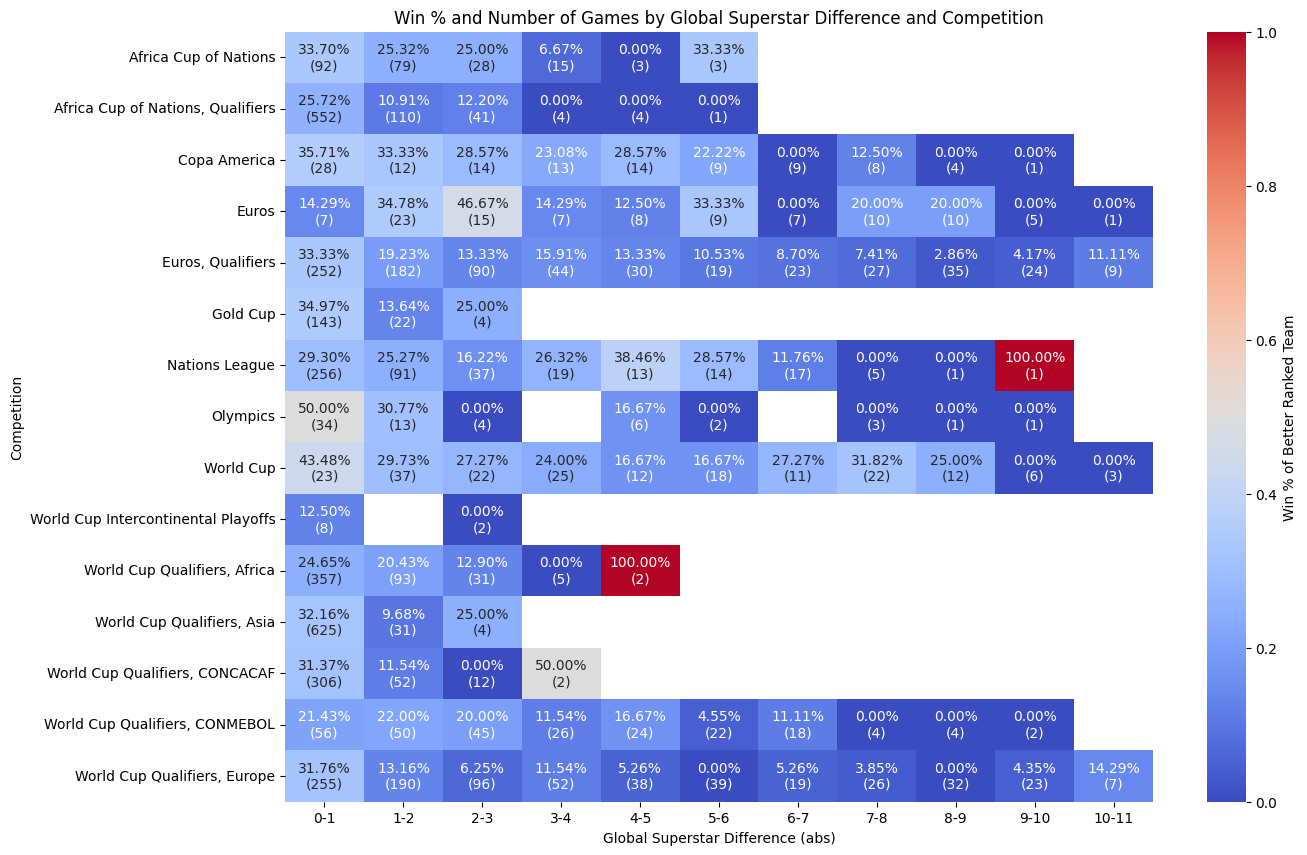

In [17]:
plot_type = 'less_stars_team'
# Define the intervals (bins)
global_superstar_difference_abs_intervals = list(range(12))  # From 0 to 11

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(global_superstar_difference_abs_intervals) - 1):
        gs_lower_bound = global_superstar_difference_abs_intervals[i]
        gs_upper_bound = global_superstar_difference_abs_intervals[i + 1]
        
        gs_filtered_data = competition_data[(competition_data['Global_Superstar_difference_abs'] >= gs_lower_bound) &
                                            (competition_data['Global_Superstar_difference_abs'] < gs_upper_bound)]
        
        # Count the number of rows
        row_count = len(gs_filtered_data)
        
        # Sum the appropriate values
        if gs_lower_bound == 0:
            gs_prediction_sum = gs_filtered_data['Team.2.Wins'].sum()
        else:
            gs_prediction_sum = gs_filtered_data['Global_Superstar_difference_prediction_correct_inverse'].sum()
        
        results.append({
            'competition': competition,
            'global_superstar_difference_abs_interval': f"{gs_lower_bound}-{gs_upper_bound}",
            'count': row_count,
            'sum_global_superstar_prediction_correct': gs_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='global_superstar_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for Global_Superstar_difference_prediction_correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='global_superstar_difference_abs_interval', values='sum_global_superstar_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [f"{i}-{i+1}" for i in range(11)]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Better Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Global Superstar Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Global Superstar Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/global_superstar_diff_vs_competition_{plot_type}.png') 
plt.show()

### TEAMS FROM different CONFEDs @ WORLD CUP - WIN% BY ∆RANK INTERVAL

#### BEtter ranked squad

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/4282813267.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '50.00%
(22)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/4282813267.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '62.50%
(16)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/4282813267.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

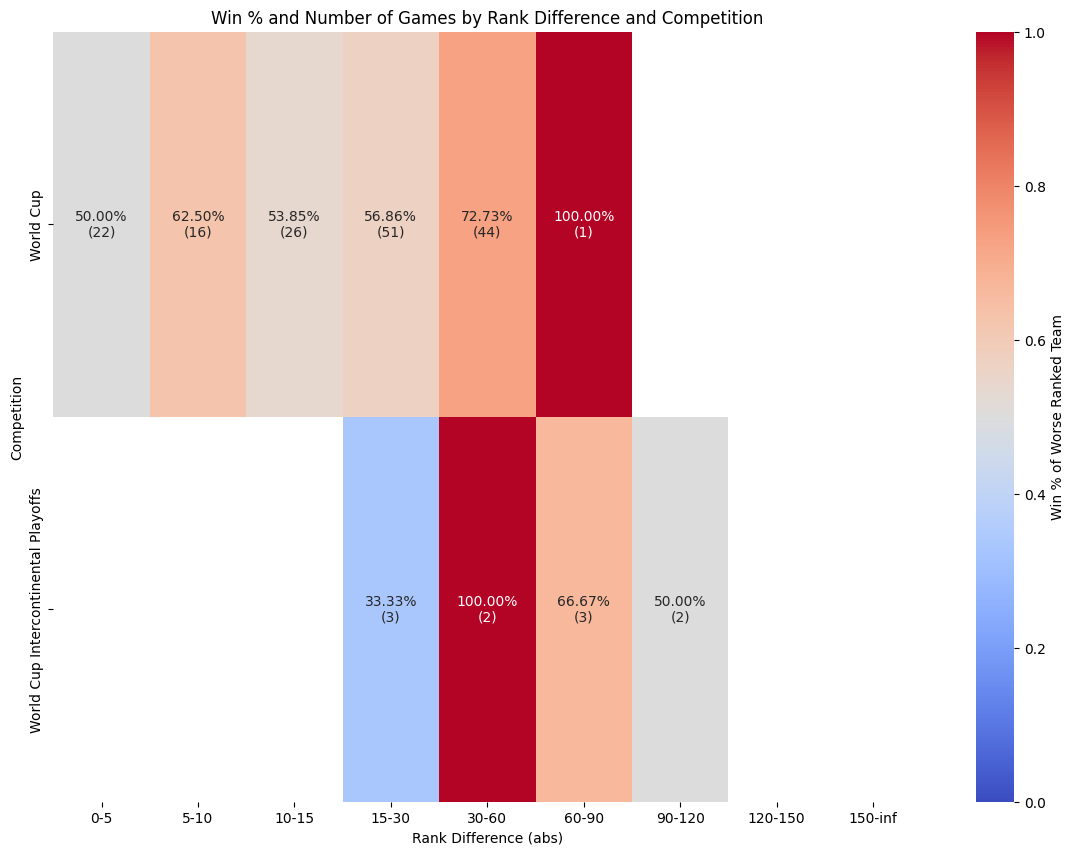

In [21]:
latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/inter_confederation_matches_August_11.csv')

plot_type = 'better_ranked_team_WC'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[i]
        rank_upper_bound = rank_difference_abs_intervals[i + 1]
        
        rank_filtered_data = competition_data[(competition_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (competition_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = rank_filtered_data['rank_prediction_correct'].sum()
        
        results.append({
            'competition': competition,
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count,
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for rank_prediction_correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Rank Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_competition_{plot_type}.png') 
plt.show()

#### Worse ranked squad

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/2890355551.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.82%
(22)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/2890355551.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '25.00%
(16)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/2890355551.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

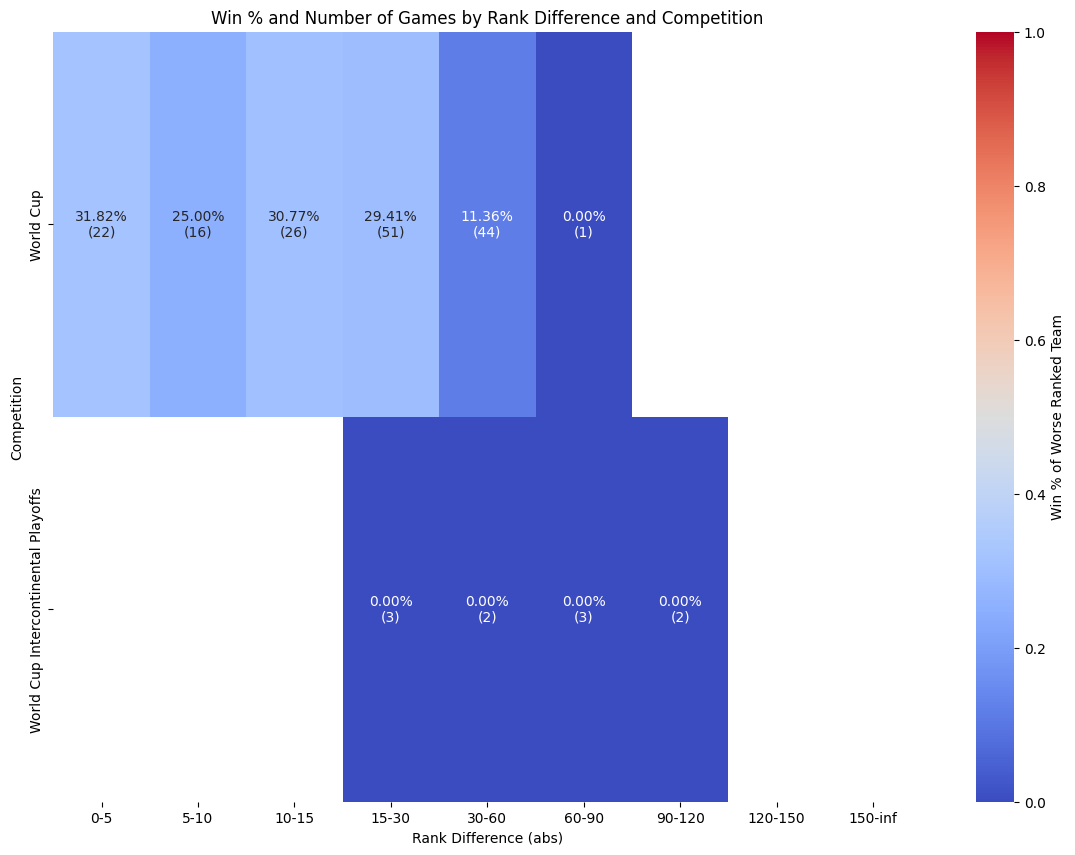

In [22]:

plot_type = 'worse_ranked_team_WC'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Create an empty list to store results
results = []

# Loop through each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    
    # Loop through the intervals and filter data
    for i in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[i]
        rank_upper_bound = rank_difference_abs_intervals[i + 1]
        
        rank_filtered_data = competition_data[(competition_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (competition_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = rank_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'competition': competition,
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count,
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for rank_prediction_correct sums
pivot_table_sums = results_df.pivot(index='competition', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Competition')
plt.title('Win % and Number of Games by Rank Difference and Competition')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_competition_{plot_type}.png') 
plt.show()

### Teams from the same confeds - win% by ∆rank interval (Y AXIS IS CONFED)

In [26]:
latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/intra_confederation_matches_ALL.csv')

#### better ranked team

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/882709018.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.00%
(25)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/882709018.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.03%
(37)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/882709018.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in

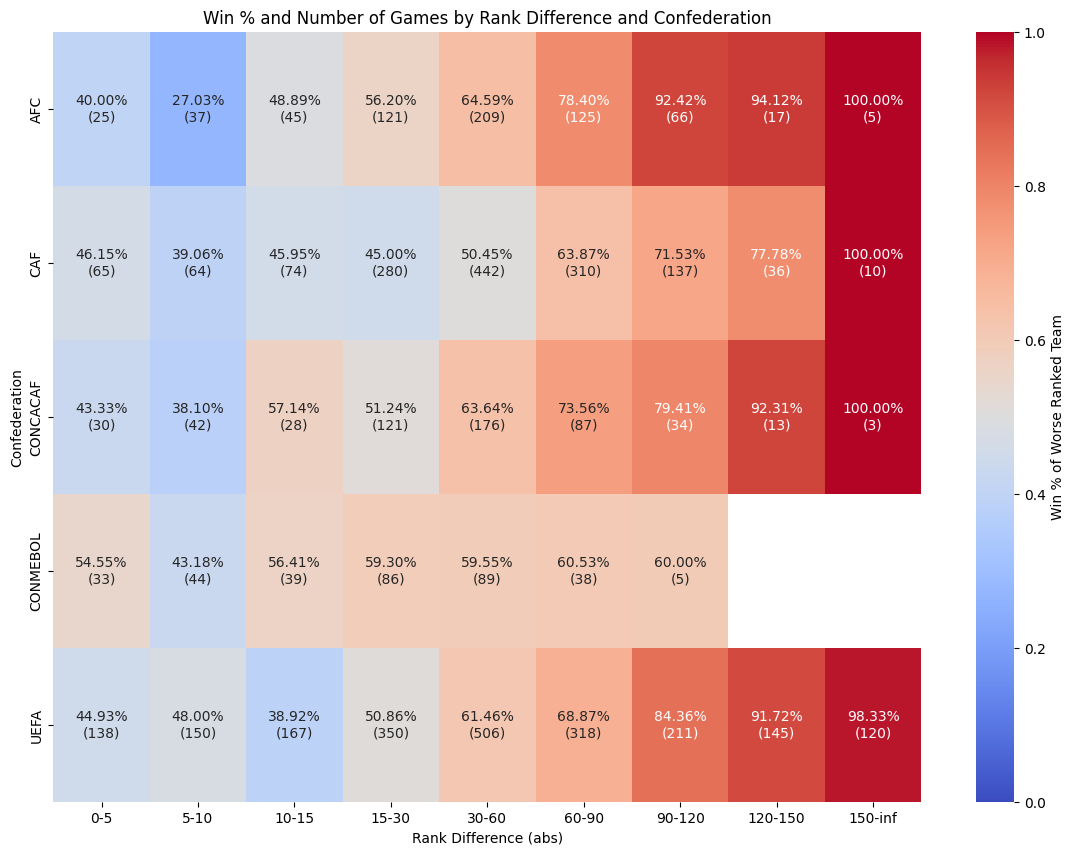

In [27]:
plot_type = 'better_ranked_team_INTRA_CONFED_GAMES'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Get unique confederations
confederations = latest_match_data['Team.1.Confederation'].unique()

# Create an empty list to store results
results = []

# Loop through each confederation
for confederation in confederations:
    confederation_data = latest_match_data[latest_match_data['Team.1.Confederation'] == confederation]
    
    # Loop through the intervals and filter data
    for i in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[i]
        rank_upper_bound = rank_difference_abs_intervals[i + 1]
        
        rank_filtered_data = confederation_data[(confederation_data['rank_difference_abs'] >= rank_lower_bound) &
                                                (confederation_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = rank_filtered_data['rank_prediction_correct'].sum()
        
        results.append({
            'confederation': confederation,
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count,
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='confederation', columns='rank_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for rank_prediction_correct sums
pivot_table_sums = results_df.pivot(index='confederation', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Confederation')
plt.title('Win % and Number of Games by Rank Difference and Confederation')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_confederation_{plot_type}.png') 
plt.show()

#### worse ranked team

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3653511813.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.00%
(25)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3653511813.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '32.43%
(37)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3653511813.py:69: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

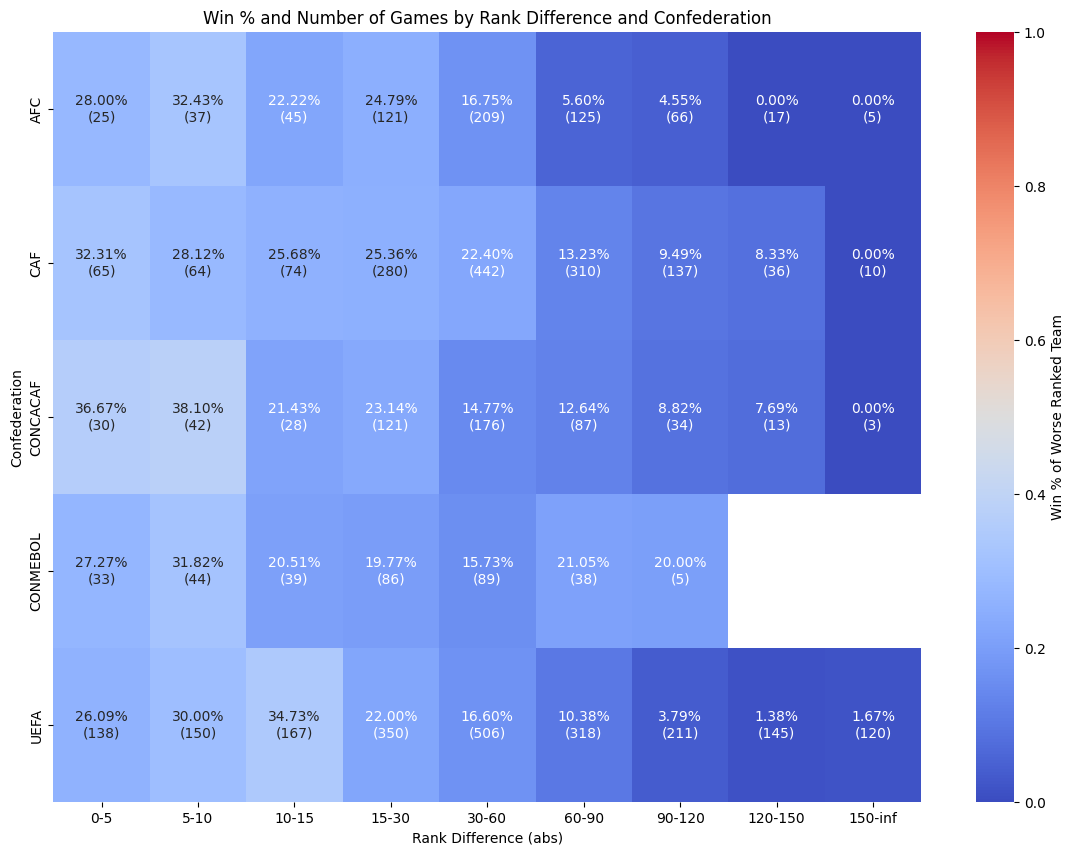

In [28]:
plot_type = 'worse_ranked_team_INTRA_CONFED_GAMES'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Get unique confederations
confederations = latest_match_data['Team.1.Confederation'].unique()

# Create an empty list to store results
results = []

# Loop through each confederation
for confederation in confederations:
    confederation_data = latest_match_data[latest_match_data['Team.1.Confederation'] == confederation]
    
    # Loop through the intervals and filter data
    for i in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[i]
        rank_upper_bound = rank_difference_abs_intervals[i + 1]
        
        rank_filtered_data = confederation_data[(confederation_data['rank_difference_abs'] >= rank_lower_bound) &
                                                (confederation_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = rank_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'confederation': confederation,
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count,
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame for counts
pivot_table_counts = results_df.pivot(index='confederation', columns='rank_difference_abs_interval', values='count').fillna(0)

# Pivot the results DataFrame for rank_prediction_correct sums
pivot_table_sums = results_df.pivot(index='confederation', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Calculate the percentage
pivot_table_percentage = pivot_table_sums / pivot_table_counts

# Define the new order for columns
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot tables
pivot_table_counts = pivot_table_counts.reindex(columns=new_col_order)
pivot_table_percentage = pivot_table_percentage.reindex(columns=new_col_order)

# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table_counts.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Confederation')
plt.title('Win % and Number of Games by Rank Difference and Confederation')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_confederation_{plot_type}.png') 
plt.show()

### X = ∆MV, Y = more valuabel team % of max squad value being deployed (split into 10 intervals)

In [7]:
plot_type = 'Win rate of team with lower MV'
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
more_valuable_team_value_score_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(more_valuable_team_value_score_intervals) - 1):
        vs_lower_bound = more_valuable_team_value_score_intervals[j]
        vs_upper_bound = more_valuable_team_value_score_intervals[j + 1]
        
        vs_filtered_data = mv_filtered_data[(mv_filtered_data['more_valuable_team_value_score'] >= vs_lower_bound) &
                                            (mv_filtered_data['more_valuable_team_value_score'] < vs_upper_bound)]
        
        # Count the number of rows
        row_count = len(vs_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'more_valuable_team_value_score_interval': f"{vs_lower_bound}-{vs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='more_valuable_team_value_score_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval               0-100000.0  100000.0-500000.0  \
more_valuable_team_value_score_interval                                  
0-1                                              12                  1   
1-2                                              21                 19   
2-3                                              10                 24   
3-4                                               5                 18   
4-5                                               3                 17   
5-6                                               5                 10   
6-7                                               5                 12   
7-8                                               4                 15   
8-9                                               3                 20   
9-10                                              2                 24   
10-11                                             2                 10   

mv_difference_abs_interval               500000.0-1000000.0  \
more_valuable_team_value_score_interval                       
0-1                                                       0   
1-2                                                       2   
2-3                                                       6   
3-4                                                      23   
4-5                                                      33   
5-6                                                      24   
6-7                                                      13   
7-8                                                      12   
8-9                                                      22   
9-10                                                     28   
10-11                                                    23   

mv_difference_abs_interval               1000000.0-5000000.0  \
more_valuable_team_value_score_interval                        
0-1                                                        0   
1-2                                                        2   
2-3                                                       14   
3-4                                                       31   
4-5                                                       39   
5-6                                                       60   
6-7                                                       75   
7-8                                                      102   
8-9                                                      129   
9-10                                                     115   
10-11                                                     50   

mv_difference_abs_interval               5000000.0-10000000.0  \
more_valuable_team_value_score_interval                         
0-1                                                         0   
1-2                                                         2   
2-3                                                         5   
3-4                                                        18   
4-5                                                        29   
5-6                                                        44   
6-7                                                        63   
7-8                                                        87   
8-9                                                       111   
9-10                                                       83   
10-11                                                      35   

mv_difference_abs_interval               10000000.0-50000000.0  \
more_valuable_team_value_score_interval                          
0-1                                                          0   
1-2                                                          0   
2-3                                                         15   
3-4                                                         29   
4-5                                                         85   
5-6                                                        174   
6-7       

In [8]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(more_valuable_team_value_score_intervals) - 1):
        vs_lower_bound = more_valuable_team_value_score_intervals[j]
        vs_upper_bound = more_valuable_team_value_score_intervals[j + 1]
        
        vs_filtered_data = mv_filtered_data[(mv_filtered_data['more_valuable_team_value_score'] >= vs_lower_bound) &
                                            (mv_filtered_data['more_valuable_team_value_score'] < vs_upper_bound)]
        
        # Use value_score_diff_prediction_correct for each cell
        prediction_sum = vs_filtered_data['MV_Prediction_Correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'more_valuable_team_value_score_interval': f"{vs_lower_bound}-{vs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='more_valuable_team_value_score_interval', columns='mv_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval               0-100000.0  100000.0-500000.0  \
more_valuable_team_value_score_interval                                  
0-1                                               0                  0   
1-2                                               6                  4   
2-3                                               2                  9   
3-4                                               2                  4   
4-5                                               1                  8   
5-6                                               3                  3   
6-7                                               1                  7   
7-8                                               2                  4   
8-9                                               0                  8   
9-10                                              1                  8   
10-11                                             1                  5   

mv_difference_abs_interval               500000.0-1000000.0  \
more_valuable_team_value_score_interval                       
0-1                                                       0   
1-2                                                       0   
2-3                                                       2   
3-4                                                       4   
4-5                                                       7   
5-6                                                       7   
6-7                                                       3   
7-8                                                       2   
8-9                                                       4   
9-10                                                      5   
10-11                                                     4   

mv_difference_abs_interval               1000000.0-5000000.0  \
more_valuable_team_value_score_interval                        
0-1                                                        0   
1-2                                                        0   
2-3                                                        4   
3-4                                                        8   
4-5                                                        8   
5-6                                                       12   
6-7                                                       12   
7-8                                                       21   
8-9                                                       32   
9-10                                                      25   
10-11                                                      5   

mv_difference_abs_interval               5000000.0-10000000.0  \
more_valuable_team_value_score_interval                         
0-1                                                         0   
1-2                                                         1   
2-3                                                         1   
3-4                                                         4   
4-5                                                         4   
5-6                                                         6   
6-7                                                        16   
7-8                                                        19   
8-9                                                        26   
9-10                                                       18   
10-11                                                       9   

mv_difference_abs_interval               10000000.0-50000000.0  \
more_valuable_team_value_score_interval                          
0-1                                                          0   
1-2                                                          0   
2-3                                                          3   
3-4                                                          5   
4-5                                                         13   
5-6                                                         29   
6-7       

In [9]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval               0-100000.0  100000.0-500000.0  \
more_valuable_team_value_score_interval                                  
0-1                                        0.000000           0.000000   
1-2                                        0.285714           0.210526   
2-3                                        0.200000           0.375000   
3-4                                        0.400000           0.222222   
4-5                                        0.333333           0.470588   
5-6                                        0.600000           0.300000   
6-7                                        0.200000           0.583333   
7-8                                        0.500000           0.266667   
8-9                                        0.000000           0.400000   
9-10                                       0.500000           0.333333   
10-11                                      0.500000           0.500000   

mv_difference_abs_interval               500000.0-1000000.0  \
more_valuable_team_value_score_interval                       
0-1                                                     NaN   
1-2                                                0.000000   
2-3                                                0.333333   
3-4                                                0.173913   
4-5                                                0.212121   
5-6                                                0.291667   
6-7                                                0.230769   
7-8                                                0.166667   
8-9                                                0.181818   
9-10                                               0.178571   
10-11                                              0.173913   

mv_difference_abs_interval               1000000.0-5000000.0  \
more_valuable_team_value_score_interval                        
0-1                                                      NaN   
1-2                                                 0.000000   
2-3                                                 0.285714   
3-4                                                 0.258065   
4-5                                                 0.205128   
5-6                                                 0.200000   
6-7                                                 0.160000   
7-8                                                 0.205882   
8-9                                                 0.248062   
9-10                                                0.217391   
10-11                                               0.100000   

mv_difference_abs_interval               5000000.0-10000000.0  \
more_valuable_team_value_score_interval                         
0-1                                                       NaN   
1-2                                                  0.500000   
2-3                                                  0.200000   
3-4                                                  0.222222   
4-5                                                  0.137931   
5-6                                                  0.136364   
6-7                                                  0.253968   
7-8                                                  0.218391   
8-9                                                  0.234234   
9-10                                                 0.216867   
10-11                                                0.257143   

mv_difference_abs_interval               10000000.0-50000000.0  \
more_valuable_team_value_score_interval                          
0-1                                                        NaN   
1-2                                                        NaN   
2-3                                                   0.200000   
3-4                                                   0.172414   
4-5                                                   0.152941   
5-6                                                   0.166667   
6-7       

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/3169528025.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(12)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/3169528025.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/3169528025.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

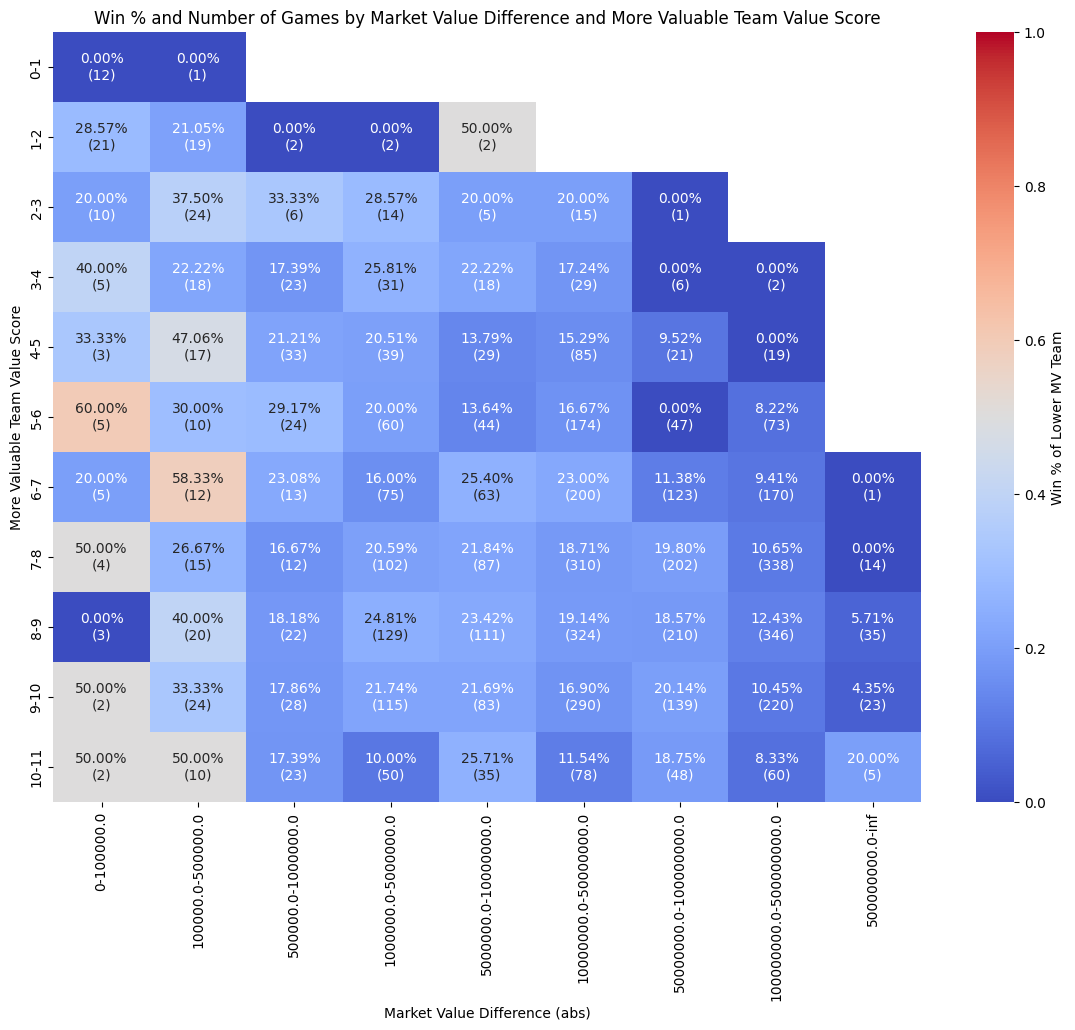

In [10]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Lower MV Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('More Valuable Team Value Score')
plt.title('Win % and Number of Games by Market Value Difference and More Valuable Team Value Score')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/mv_diff_vs_more_valuable_team_value_score_{plot_type}.png') 
plt.show()

### ∆Rank vs Value Score of Better Ranked team

In [495]:
plot_type = 'Win rate of team with worse rank'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
more_valuable_team_value_score_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(more_valuable_team_value_score_intervals) - 1):
        vs_lower_bound = more_valuable_team_value_score_intervals[j]
        vs_upper_bound = more_valuable_team_value_score_intervals[j + 1]
        
        vs_filtered_data = rank_filtered_data[(rank_filtered_data['more_valuable_team_value_score'] >= vs_lower_bound) &
                                              (rank_filtered_data['more_valuable_team_value_score'] < vs_upper_bound)]
        
        # Count the number of rows
        row_count = len(vs_filtered_data)
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'better_ranked_team_value_score_interval': f"{vs_lower_bound}-{vs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='better_ranked_team_value_score_interval', columns='rank_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

rank_difference_abs_interval             0-5  5-10  10-15  15-30  30-60  \
better_ranked_team_value_score_interval                                   
0-1                                        0     0      2      5      2   
1-2                                        4     7      3      8     17   
2-3                                        2     4      6     24     21   
3-4                                        5     4      6     29     48   
4-5                                       14    15     14     54     84   
5-6                                       23    35     22     82    118   
6-7                                       36    52     33    138    182   
7-8                                       56    78     88    200    316   
8-9                                       86    81    103    240    305   
9-10                                      59    57     71    153    267   
10-11                                     17    15     25     66     90   

rank_difference_abs_interval             60-90  90-120  120-150  150-inf  
better_ranked_team_value_score_interval                                   
0-1                                          4       0        0        0  
1-2                                          5       1        1        0  
2-3                                         11       7        0        0  
3-4                                         21      12        5        2  
4-5                                         35      19        7        4  
5-6                                         93      38       20        6  
6-7                                        119      50       25       27  
7-8                                        168      95       49       34  
8-9                                        201     103       47       34  
9-10                                       162      89       40       26  
10-11                                       54      28       11        5

In [498]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(more_valuable_team_value_score_intervals) - 1):
        vs_lower_bound = more_valuable_team_value_score_intervals[j]
        vs_upper_bound = more_valuable_team_value_score_intervals[j + 1]
        
        vs_filtered_data = rank_filtered_data[(rank_filtered_data['more_valuable_team_value_score'] >= vs_lower_bound) &
                                              (rank_filtered_data['more_valuable_team_value_score'] < vs_upper_bound)]
        
        # Use value_score_diff_prediction_correct for each cell
        prediction_sum = vs_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'more_valuable_team_value_score_interval': f"{vs_lower_bound}-{vs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='more_valuable_team_value_score_interval', columns='rank_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

rank_difference_abs_interval             0-5  5-10  10-15  15-30  30-60  \
more_valuable_team_value_score_interval                                   
0-1                                        0     0      2      0      0   
1-2                                        1     3      1      2      5   
2-3                                        0     2      1      7      4   
3-4                                        0     1      2      9      8   
4-5                                        6     4      4     10     16   
5-6                                        8     9      5     21     19   
6-7                                        6    20      8     32     37   
7-8                                       14    31     28     50     50   
8-9                                       29    15     31     53     59   
9-10                                      18    18     20     35     48   
10-11                                      4     6      6     18     12   

rank_difference_abs_interval             60-90  90-120  120-150  150-inf  
more_valuable_team_value_score_interval                                   
0-1                                          1       0        0        0  
1-2                                          2       0        0        0  
2-3                                          1       0        0        0  
3-4                                          2       2        0        0  
4-5                                          3       5        1        0  
5-6                                         11       2        0        0  
6-7                                         11       4        1        0  
7-8                                         22       2        2        2  
8-9                                         23       8        0        0  
9-10                                        15       5        1        0  
10-11                                        7       0        1        0

In [499]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

rank_difference_abs_interval                  0-5      5-10     10-15  \
more_valuable_team_value_score_interval                                 
0-1                                           NaN       NaN  1.000000   
1-2                                      0.250000  0.428571  0.333333   
2-3                                      0.000000  0.500000  0.166667   
3-4                                      0.000000  0.250000  0.333333   
4-5                                      0.428571  0.266667  0.285714   
5-6                                      0.347826  0.257143  0.227273   
6-7                                      0.166667  0.384615  0.242424   
7-8                                      0.250000  0.397436  0.318182   
8-9                                      0.337209  0.185185  0.300971   
9-10                                     0.305085  0.315789  0.281690   
10-11                                    0.235294  0.400000  0.240000   

rank_difference_abs_interval                15-30     30-60     60-90  \
more_valuable_team_value_score_interval                                 
0-1                                      0.000000  0.000000  0.250000   
1-2                                      0.250000  0.294118  0.400000   
2-3                                      0.291667  0.190476  0.090909   
3-4                                      0.310345  0.166667  0.095238   
4-5                                      0.185185  0.190476  0.085714   
5-6                                      0.256098  0.161017  0.118280   
6-7                                      0.231884  0.203297  0.092437   
7-8                                      0.250000  0.158228  0.130952   
8-9                                      0.220833  0.193443  0.114428   
9-10                                     0.228758  0.179775  0.092593   
10-11                                    0.272727  0.133333  0.129630   

rank_difference_abs_interval               90-120   120-150   150-inf  
more_valuable_team_value_score_interval                                
0-1                                           NaN       NaN       NaN  
1-2                                      0.000000  0.000000       NaN  
2-3                                      0.000000       NaN       NaN  
3-4                                      0.166667  0.000000  0.000000  
4-5                                      0.263158  0.142857  0.000000  
5-6                                      0.052632  0.000000  0.000000  
6-7                                      0.080000  0.040000  0.000000  
7-8                                      0.021053  0.040816  0.058824  
8-9                                      0.077670  0.000000  0.000000  
9-10                                     0.056180  0.025000  0.000000  
10-11                                    0.000000  0.090909  0.000000

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/92824020.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/92824020.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.00%
(2)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/92824020.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

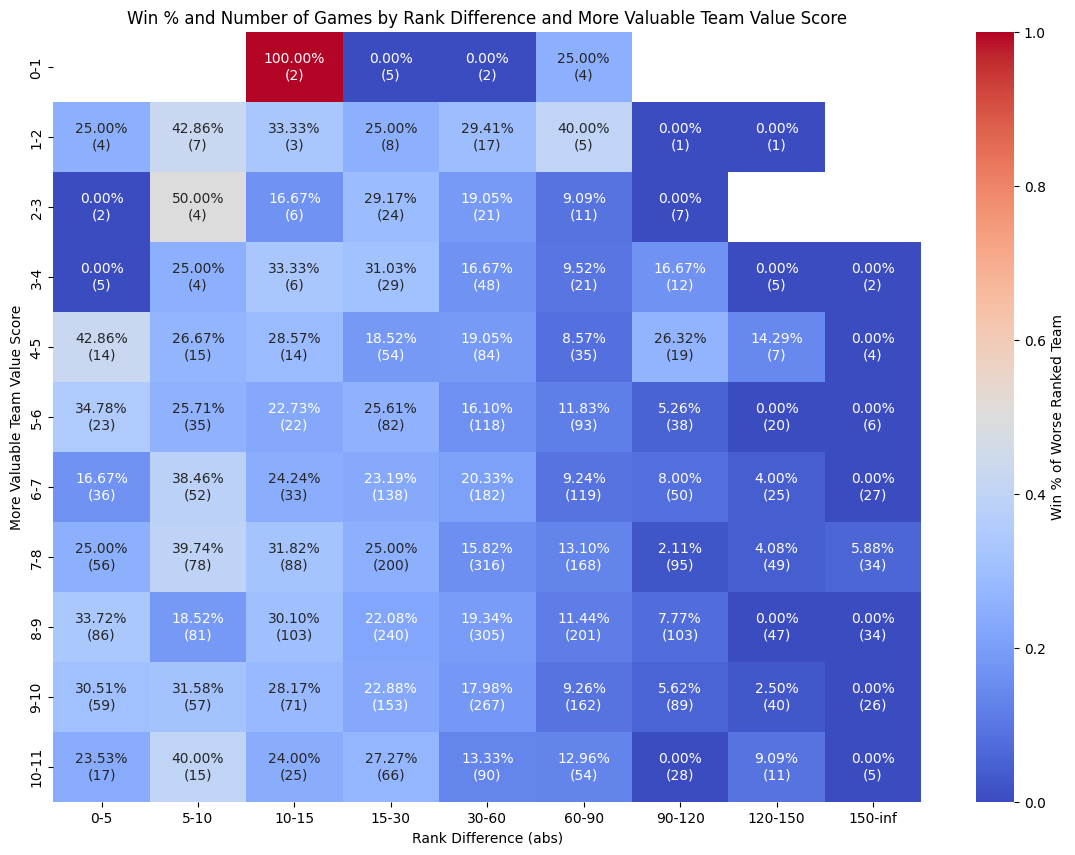

In [500]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse Ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('More Valuable Team Value Score')
plt.title('Win % and Number of Games by Rank Difference and More Valuable Team Value Score')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_more_valuable_team_value_score_{plot_type}.png') 
plt.show()

### X = ∆MV, Y = ∆ value score for squad value being deployed (split into 10 intervals)

In [378]:
plot_type = 'Win rate of team with lower value score'
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
value_score_difference_abs_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(value_score_difference_abs_intervals) - 1):
        vs_lower_bound = value_score_difference_abs_intervals[j]
        vs_upper_bound = value_score_difference_abs_intervals[j + 1]
        
        vs_filtered_data = mv_filtered_data[(mv_filtered_data['value_score_difference_abs'] >= vs_lower_bound) &
                                            (mv_filtered_data['value_score_difference_abs'] < vs_upper_bound)]
        
        # Count the number of rows
        row_count = len(vs_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'value_score_difference_abs_interval': f"{vs_lower_bound}-{vs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='value_score_difference_abs_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval           0-100000.0  100000.0-500000.0  \
value_score_difference_abs_interval                                  
0-1                                          28                 48   
1-2                                          29                 44   
2-3                                           8                 40   
3-4                                           7                 16   
4-5                                           0                 14   
5-6                                           0                  7   
6-7                                           0                  0   
7-8                                           0                  1   
8-9                                           0                  1   
9-10                                          0                  0   
10-11                                         0                  0   

mv_difference_abs_interval           500000.0-1000000.0  1000000.0-5000000.0  \
value_score_difference_abs_interval                                            
0-1                                                  43                  187   
1-2                                                  44                  119   
2-3                                                  31                  102   
3-4                                                  33                   64   
4-5                                                  15                   44   
5-6                                                  11                   31   
6-7                                                   4                   30   
7-8                                                   3                   20   
8-9                                                   3                   19   
9-10                                                  1                    5   
10-11                                                 0                    0   

mv_difference_abs_interval           5000000.0-10000000.0  \
value_score_difference_abs_interval                         
0-1                                                   140   
1-2                                                   111   
2-3                                                    81   
3-4                                                    48   
4-5                                                    33   
5-6                                                    29   
6-7                                                    13   
7-8                                                    10   
8-9                                                     7   
9-10                                                    4   
10-11                                                   1   

mv_difference_abs_interval           10000000.0-50000000.0  \
value_score_difference_abs_interval                          
0-1                                                    498   
1-2                                                    415   
2-3                                                    243   
3-4                                                    149   
4-5                                                     90   
5-6                                                     39   
6-7                                                     37   
7-8                                                     19   
8-9                                                     12   
9-10                                                     7   
10-11                                                    1   

mv_difference_abs_interval           50000000.0-100000000.0  \
value_score_difference_abs_interval                           
0-1                                                     280   
1-2                                                     220   
2-3                                                     148   
3-4                                                      70   
4-5                                                      34   
5-6   

In [379]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(value_score_difference_abs_intervals) - 1):
        vs_lower_bound = value_score_difference_abs_intervals[j]
        vs_upper_bound = value_score_difference_abs_intervals[j + 1]
        
        vs_filtered_data = mv_filtered_data[(mv_filtered_data['value_score_difference_abs'] >= vs_lower_bound) &
                                            (mv_filtered_data['value_score_difference_abs'] < vs_upper_bound)]
        
        # Use value_score_diff_prediction_correct for each cell
        prediction_sum = vs_filtered_data['value_score_diff_prediction_correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'value_score_difference_abs_interval': f"{vs_lower_bound}-{vs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='value_score_difference_abs_interval', columns='mv_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval           0-100000.0  100000.0-500000.0  \
value_score_difference_abs_interval                                  
0-1                                           3                 19   
1-2                                           9                 15   
2-3                                           3                 17   
3-4                                           5                  2   
4-5                                           0                  4   
5-6                                           0                  3   
6-7                                           0                  0   
7-8                                           0                  0   
8-9                                           0                  1   
9-10                                          0                  0   
10-11                                         0                  0   

mv_difference_abs_interval           500000.0-1000000.0  1000000.0-5000000.0  \
value_score_difference_abs_interval                                            
0-1                                                  11                   70   
1-2                                                  20                   35   
2-3                                                   9                   31   
3-4                                                   8                   16   
4-5                                                   1                    9   
5-6                                                   2                    5   
6-7                                                   1                    4   
7-8                                                   0                    1   
8-9                                                   0                    1   
9-10                                                  0                    1   
10-11                                                 0                    0   

mv_difference_abs_interval           5000000.0-10000000.0  \
value_score_difference_abs_interval                         
0-1                                                    57   
1-2                                                    45   
2-3                                                    29   
3-4                                                    10   
4-5                                                     4   
5-6                                                     4   
6-7                                                     1   
7-8                                                     0   
8-9                                                     0   
9-10                                                    0   
10-11                                                   0   

mv_difference_abs_interval           10000000.0-50000000.0  \
value_score_difference_abs_interval                          
0-1                                                    178   
1-2                                                    183   
2-3                                                     74   
3-4                                                     49   
4-5                                                     21   
5-6                                                      7   
6-7                                                      1   
7-8                                                      1   
8-9                                                      0   
9-10                                                     0   
10-11                                                    0   

mv_difference_abs_interval           50000000.0-100000000.0  \
value_score_difference_abs_interval                           
0-1                                                     121   
1-2                                                      92   
2-3                                                      52   
3-4                                                      29   
4-5                                                      10   
5-6   

In [380]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval           0-100000.0  100000.0-500000.0  \
value_score_difference_abs_interval                                  
0-1                                    0.107143           0.395833   
1-2                                    0.310345           0.340909   
2-3                                    0.375000           0.425000   
3-4                                    0.714286           0.125000   
4-5                                         NaN           0.285714   
5-6                                         NaN           0.428571   
6-7                                         NaN                NaN   
7-8                                         NaN           0.000000   
8-9                                         NaN           1.000000   
9-10                                        NaN                NaN   
10-11                                       NaN                NaN   

mv_difference_abs_interval           500000.0-1000000.0  1000000.0-5000000.0  \
value_score_difference_abs_interval                                            
0-1                                            0.255814             0.374332   
1-2                                            0.454545             0.294118   
2-3                                            0.290323             0.303922   
3-4                                            0.242424             0.250000   
4-5                                            0.066667             0.204545   
5-6                                            0.181818             0.161290   
6-7                                            0.250000             0.133333   
7-8                                            0.000000             0.050000   
8-9                                            0.000000             0.052632   
9-10                                           0.000000             0.200000   
10-11                                               NaN                  NaN   

mv_difference_abs_interval           5000000.0-10000000.0  \
value_score_difference_abs_interval                         
0-1                                              0.407143   
1-2                                              0.405405   
2-3                                              0.358025   
3-4                                              0.208333   
4-5                                              0.121212   
5-6                                              0.137931   
6-7                                              0.076923   
7-8                                              0.000000   
8-9                                              0.000000   
9-10                                             0.000000   
10-11                                            0.000000   

mv_difference_abs_interval           10000000.0-50000000.0  \
value_score_difference_abs_interval                          
0-1                                               0.357430   
1-2                                               0.440964   
2-3                                               0.304527   
3-4                                               0.328859   
4-5                                               0.233333   
5-6                                               0.179487   
6-7                                               0.027027   
7-8                                               0.052632   
8-9                                               0.000000   
9-10                                              0.000000   
10-11                                             0.000000   

mv_difference_abs_interval           50000000.0-100000000.0  \
value_score_difference_abs_interval                           
0-1                                                0.432143   
1-2                                                0.418182   
2-3                                                0.351351   
3-4                                                0.414286   
4-5                                                0.294118   
5-6   

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1754925329.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.71%
(28)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1754925329.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '39.58%
(48)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1754925329.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

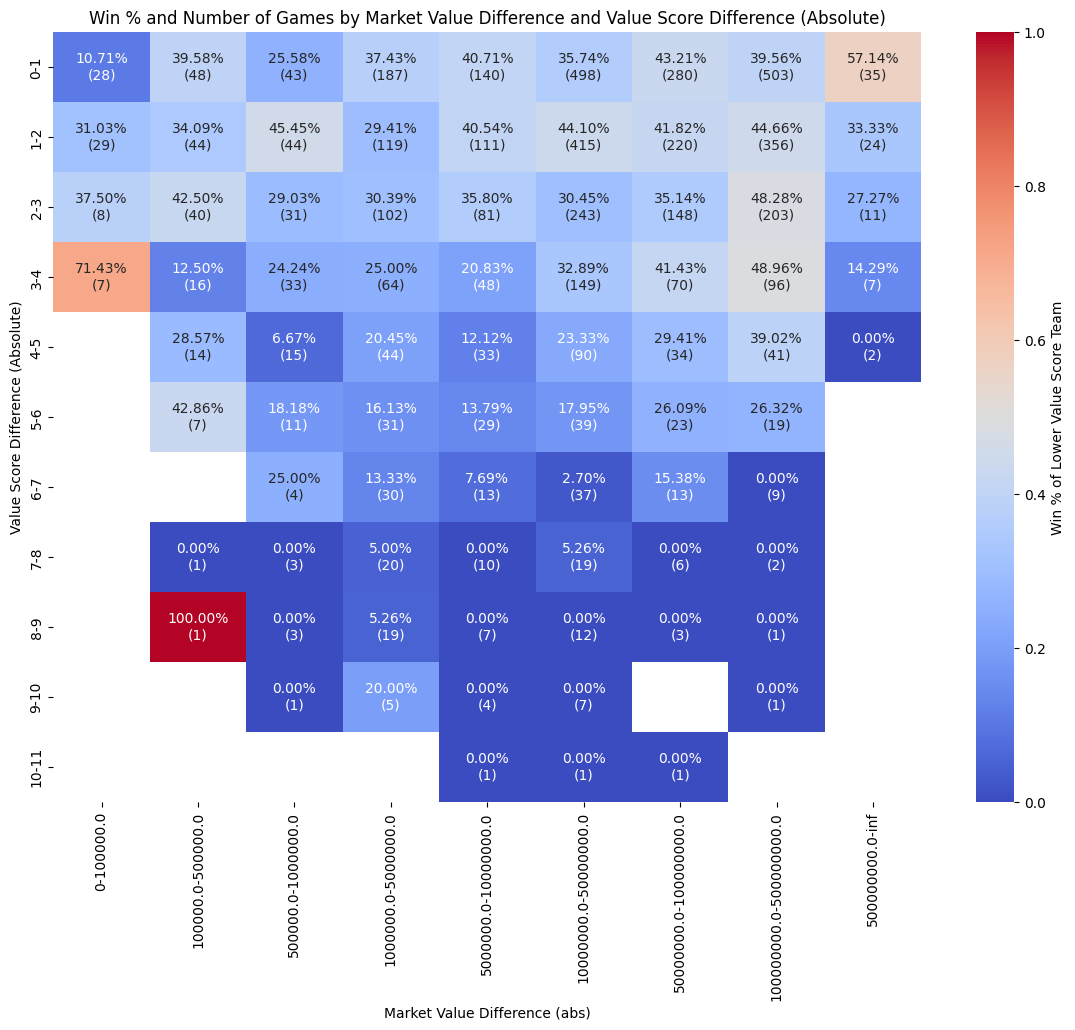

In [381]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Lower Value Score Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Value Score Difference (Absolute)')
plt.title('Win % and Number of Games by Market Value Difference and Value Score Difference (Absolute)')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/mv_diff_vs_value_score_diff_{plot_type}.png') 
plt.show()

### Team 1 Score vs Team 2 value score (home-away)

In [158]:
plot_type = '∆rank ≤15 - Value score chart - win rate of lower value score team'#'Win rate of team with lower value score'
#latest_match_data = latest_match_data[(latest_match_data['Competition'] != 'Euros') & (latest_match_data['Competition'] != 'World Cup') & (latest_match_data['Competition'] != 'Copa America') & (latest_match_data['Competition'] != 'Gold Cup') & (latest_match_data['Competition'] != 'Olympics') & (latest_match_data['Competition'] != 'World Cup Qualifiers, UEFA') & (latest_match_data['Competition'] != 'World Cup Intercontinental Playoffs') & (latest_match_data['Competition'] != 'Africa Cup of Nations')]

# Define the intervals (bins)
value_score_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(value_score_intervals) - 1):
    t1_lower_bound = value_score_intervals[i]
    t1_upper_bound = value_score_intervals[i + 1]
    
    t1_filtered_data = latest_match_data[(latest_match_data['team 1 total value score'] >= t1_lower_bound) &
                                         (latest_match_data['team 1 total value score'] < t1_upper_bound)]
    
    for j in range(len(value_score_intervals) - 1):
        t2_lower_bound = value_score_intervals[j]
        t2_upper_bound = value_score_intervals[j + 1]
        
        t2_filtered_data = t1_filtered_data[(t1_filtered_data['team 2 total value score'] >= t2_lower_bound) &
                                            (t1_filtered_data['team 2 total value score'] < t2_upper_bound)]
        
        # Count the number of rows
        row_count = len(t2_filtered_data)
        
        results.append({
            'team_1_total_value_score_interval': f"{t1_lower_bound}-{t1_upper_bound}",
            'team_2_total_value_score_interval': f"{t2_lower_bound}-{t2_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='team_2_total_value_score_interval', columns='team_1_total_value_score_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [f"{i}-{i+1}" for i in range(11)]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

team_1_total_value_score_interval  0-1  1-2  2-3  3-4  4-5  5-6  6-7  7-8  \
team_2_total_value_score_interval                                           
0-1                                  3    5    2    1    2    4    2    1   
1-2                                  3    4    3    1    3    3    0    0   
2-3                                  2    2    1    2    5    1    2    0   
3-4                                  1    1    3    2    3    4    3    1   
4-5                                  2    1    1    3    6    8    6    9   
5-6                                  2    4    1    2    7   12   11   25   
6-7                                  1    1    0    4    9   15   20   25   
7-8                                  2    2    1    1    8   17   28   63   
8-9                                  1    0    0    1    9   13   26   53   
9-10                                 0    0    3    1    4    7   24   34   
10-11                                0    0    1    0    2    3   10   15   

team_1_total_value_score_interval  8-9  9-10  10-11  
team_2_total_value_score_interval                    
0-1                                  1     0      0  
1-2                                  0     1      0  
2-3                                  1     2      0  
3-4                                  3     2      1  
4-5                                 10     2      5  
5-6                                 11     9      1  
6-7                                 32    17      7  
7-8                                 61    50      7  
8-9                                 70    54     17  
9-10                                59    37     18  
10-11                               13    14      6

In [159]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(value_score_intervals) - 1):
    t1_lower_bound = value_score_intervals[i]
    t1_upper_bound = value_score_intervals[i + 1]
    
    t1_filtered_data = latest_match_data[(latest_match_data['team 1 total value score'] >= t1_lower_bound) &
                                         (latest_match_data['team 1 total value score'] < t1_upper_bound)]
    
    for j in range(len(value_score_intervals) - 1):
        t2_lower_bound = value_score_intervals[j]
        t2_upper_bound = value_score_intervals[j + 1]
        
        t2_filtered_data = t1_filtered_data[(t1_filtered_data['team 2 total value score'] >= t2_lower_bound) &
                                            (t1_filtered_data['team 2 total value score'] < t2_upper_bound)]
        
        # Use value_score_diff_prediction_correct for each cell
        prediction_sum = t2_filtered_data['value_score_diff_prediction_correct_inverse'].sum()
        
        results.append({
            'team_1_total_value_score_interval': f"{t1_lower_bound}-{t1_upper_bound}",
            'team_2_total_value_score_interval': f"{t2_lower_bound}-{t2_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='team_2_total_value_score_interval', columns='team_1_total_value_score_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

team_1_total_value_score_interval  0-1  1-2  2-3  3-4  4-5  5-6  6-7  7-8  \
team_2_total_value_score_interval                                           
0-1                                  0    2    0    0    0    1    0    0   
1-2                                  3    1    0    0    0    0    0    0   
2-3                                  2    0    0    0    1    0    0    0   
3-4                                  0    1    1    0    0    0    2    0   
4-5                                  0    0    0    0    4    2    2    1   
5-6                                  1    0    0    2    4    5    5    6   
6-7                                  1    0    0    2    7    7    7    7   
7-8                                  0    1    0    1    3    6   15   28   
8-9                                  0    0    0    0    2    6    6   22   
9-10                                 0    0    1    0    2    1    7   15   
10-11                                0    0    1    0    2    1    7    4   

team_1_total_value_score_interval  8-9  9-10  10-11  
team_2_total_value_score_interval                    
0-1                                  0     0      0  
1-2                                  0     0      0  
2-3                                  0     0      0  
3-4                                  0     0      0  
4-5                                  5     0      1  
5-6                                  1     2      1  
6-7                                  6     3      1  
7-8                                 17    14      1  
8-9                                 25    19      4  
9-10                                26    14      7  
10-11                                8     5      2

In [160]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

team_1_total_value_score_interval  0-1   1-2       2-3  3-4       4-5  \
team_2_total_value_score_interval                                       
0-1                                0.0  0.40  0.000000  0.0  0.000000   
1-2                                1.0  0.25  0.000000  0.0  0.000000   
2-3                                1.0  0.00  0.000000  0.0  0.200000   
3-4                                0.0  1.00  0.333333  0.0  0.000000   
4-5                                0.0  0.00  0.000000  0.0  0.666667   
5-6                                0.5  0.00  0.000000  1.0  0.571429   
6-7                                1.0  0.00       NaN  0.5  0.777778   
7-8                                0.0  0.50  0.000000  1.0  0.375000   
8-9                                0.0   NaN       NaN  0.0  0.222222   
9-10                               NaN   NaN  0.333333  0.0  0.500000   
10-11                              NaN   NaN  1.000000  NaN  1.000000   

team_1_total_value_score_interval       5-6       6-7       7-8       8-9  \
team_2_total_value_score_interval                                           
0-1                                0.250000  0.000000  0.000000  0.000000   
1-2                                0.000000       NaN       NaN       NaN   
2-3                                0.000000  0.000000       NaN  0.000000   
3-4                                0.000000  0.666667  0.000000  0.000000   
4-5                                0.250000  0.333333  0.111111  0.500000   
5-6                                0.416667  0.454545  0.240000  0.090909   
6-7                                0.466667  0.350000  0.280000  0.187500   
7-8                                0.352941  0.535714  0.444444  0.278689   
8-9                                0.461538  0.230769  0.415094  0.357143   
9-10                               0.142857  0.291667  0.441176  0.440678   
10-11                              0.333333  0.700000  0.266667  0.615385   

team_1_total_value_score_interval      9-10     10-11  
team_2_total_value_score_interval                      
0-1                                     NaN       NaN  
1-2                                0.000000       NaN  
2-3                                0.000000       NaN  
3-4                                0.000000  0.000000  
4-5                                0.000000  0.200000  
5-6                                0.222222  1.000000  
6-7                                0.176471  0.142857  
7-8                                0.280000  0.142857  
8-9                                0.351852  0.235294  
9-10                               0.378378  0.388889  
10-11                              0.357143  0.333333

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/2701670056.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(3)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/2701670056.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.00%
(5)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/2701670056.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

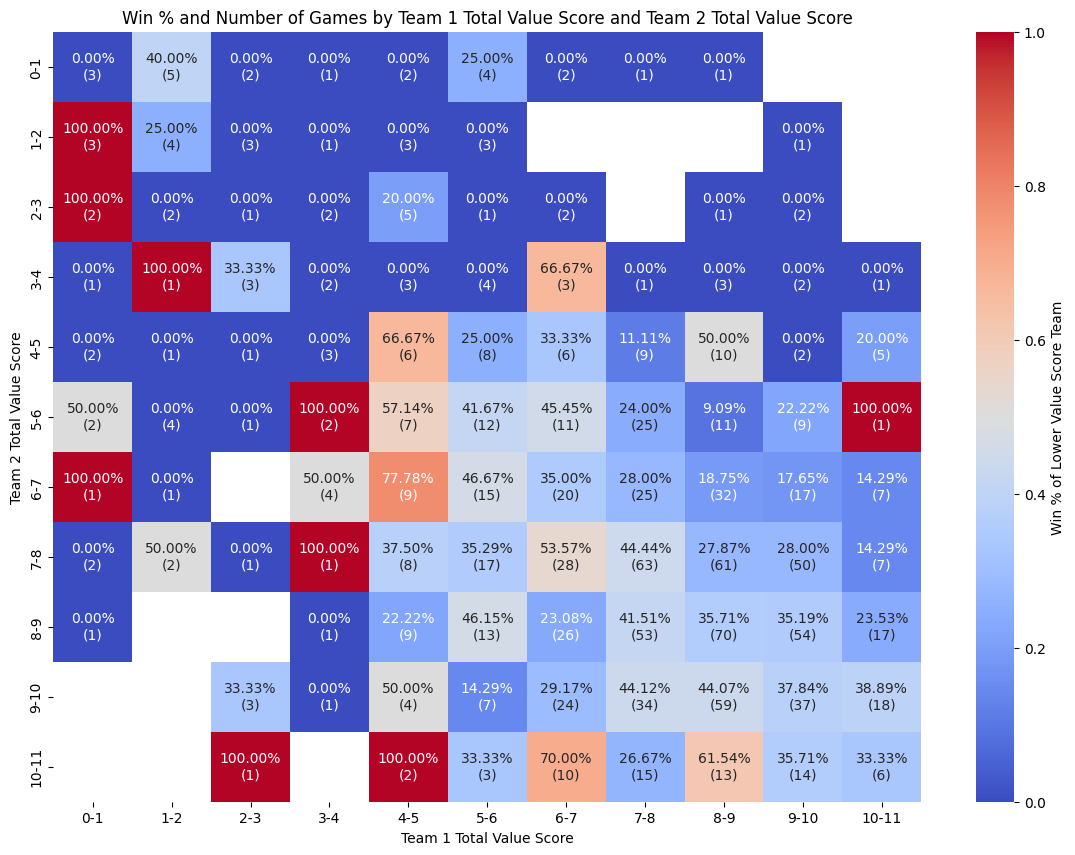

In [161]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Lower Value Score Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Team 1 Total Value Score')
plt.ylabel('Team 2 Total Value Score')
plt.title('Win % and Number of Games by Team 1 Total Value Score and Team 2 Total Value Score')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/team_value_score_vs_team_value_score_{plot_type}.png') 
plt.show()

### BASIC CHART - ∆Value score vs win%

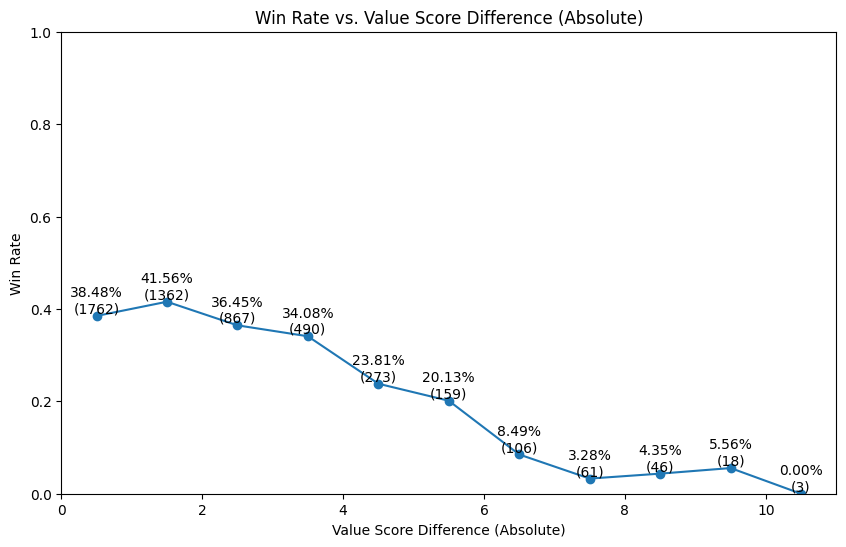

In [417]:
import matplotlib.pyplot as plt

# Define the intervals (bins)
value_score_difference_abs_intervals = list(range(12))  # From 0 to 11

# Create lists to store the interval midpoints, win rates, and number of games
interval_midpoints = []
win_rates = []
num_games = []

# Loop through the intervals and calculate win rates
for i in range(len(value_score_difference_abs_intervals) - 1):
    lower_bound = value_score_difference_abs_intervals[i]
    upper_bound = value_score_difference_abs_intervals[i + 1]
    
    # Filter data for the current interval
    filtered_data = latest_match_data[(latest_match_data['value_score_difference_abs'] >= lower_bound) &
                                      (latest_match_data['value_score_difference_abs'] < upper_bound)]
    
    # Calculate the win rate
    if len(filtered_data) > 0:
        win_rate = filtered_data['value_score_diff_prediction_correct'].sum() / len(filtered_data)
    else:
        win_rate = 0
    
    # Store the midpoint of the interval, the win rate, and the number of games
    interval_midpoints.append((lower_bound + upper_bound) / 2)
    win_rates.append(win_rate)
    num_games.append(len(filtered_data))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(interval_midpoints, win_rates, marker='o')

# Annotate each point with the win rate percentage and number of games
for i in range(len(interval_midpoints)):
    plt.text(interval_midpoints[i], win_rates[i], f'{win_rates[i]*100:.2f}%\n({num_games[i]})', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Value Score Difference (Absolute)')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Value Score Difference (Absolute)')
plt.ylim(0, 1)  # Set Y-axis range from 0 to 1
plt.savefig(f'/Users/finneganlaister-smith/Downloads/value_score_diff_vs_win_rate_lower_score_team.png') 
# Show the plot
plt.show()

### Basic chart - value score vs win%

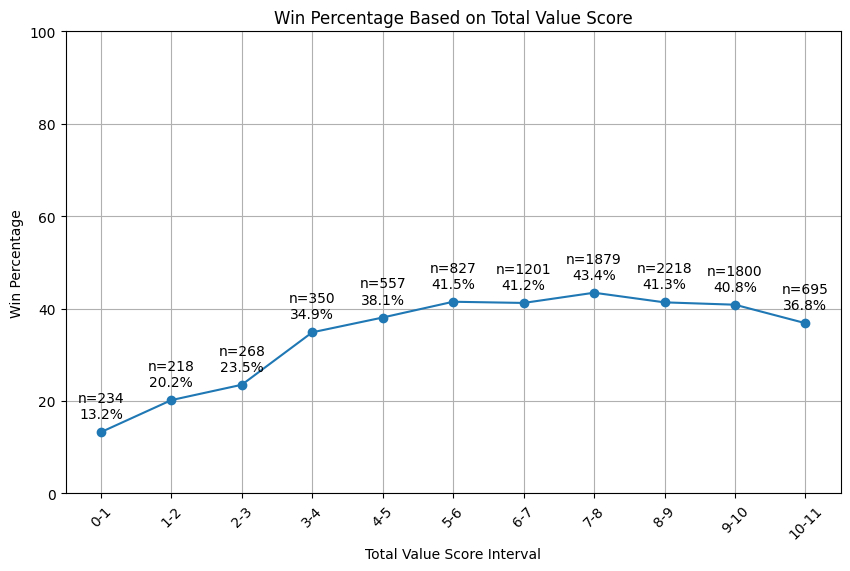

In [459]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store win percentages and sample sizes
win_percentages = {}
sample_sizes = {}

# Define the intervals (bins)
value_score_intervals = list(range(12))  # From 0 to 11

# Loop through the intervals
for i in range(len(value_score_intervals) - 1):
    lower_bound = value_score_intervals[i]
    upper_bound = value_score_intervals[i + 1]
    
    # Filter the data for Team 1 and Team 2 having the specified total value score
    team1_data = latest_match_data[(latest_match_data['team 1 total value score'] >= lower_bound) &
                                   (latest_match_data['team 1 total value score'] < upper_bound)]
    team2_data = latest_match_data[(latest_match_data['team 2 total value score'] >= lower_bound) &
                                   (latest_match_data['team 2 total value score'] < upper_bound)]
    
    # Calculate win percentage for Team 1
    team1_wins = team1_data[team1_data['Score.Difference'] > 0].shape[0]
    team1_total = team1_data.shape[0]
    team1_win_percentage = (team1_wins / team1_total) * 100 if team1_total > 0 else 0
    
    # Calculate win percentage for Team 2
    team2_wins = team2_data[team2_data['Score.Difference'] < 0].shape[0]
    team2_total = team2_data.shape[0]
    team2_win_percentage = (team2_wins / team2_total) * 100 if team2_total > 0 else 0
    
    # Combine the win percentages
    total_wins = team1_wins + team2_wins
    total_games = team1_total + team2_total
    combined_win_percentage = (total_wins / total_games) * 100 if total_games > 0 else 0
    
    # Store the combined win percentage and sample size
    win_percentages[f"{lower_bound}-{upper_bound}"] = combined_win_percentage
    sample_sizes[f"{lower_bound}-{upper_bound}"] = total_games
    #print(f"for {lower_bound}-{upper_bound} value score: team 1 had {team1_total} games and team 2 had {team2_total} games")
    #print(f'for {lower_bound}-{upper_bound} value score: {total_games} games')

# Plot the win percentages
plt.figure(figsize=(10, 6))
plt.plot(list(win_percentages.keys()), list(win_percentages.values()), marker='o')
plt.title('Win Percentage Based on Total Value Score')
plt.xlabel('Total Value Score Interval')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)  # Set Y-axis scale from 0 to 100
plt.xticks(rotation=45)
plt.grid(True)

# Annotate the sample sizes and win percentages
for interval, win_percentage in win_percentages.items():
    plt.annotate(f'n={sample_sizes[interval]}\n{win_percentage:.1f}%', 
                 (interval, win_percentage), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/value_score_vs_win_rate.png') 
plt.show()

## Adapting attempt 2

### ∆Rank vs # Confed superstars on worse ranked team

In [241]:
plot_type = 'Win rate of worse ranked team'
continent_name = 'Europe'
latest_match_data = latest_match_data[(latest_match_data['Competition'] == f'World Cup Qualifiers, {continent_name}') | (latest_match_data['Competition'] == f'Euros') | (latest_match_data['Competition'] == f'Nations League') | (latest_match_data['Competition'] == f'Euros, Qualifiers')]#| (latest_match_data['Competition'] == f'Africa Cup of Nations') | (latest_match_data['Competition'] == f'Africa Cup of Nations, Qualifiers') 

# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
less_valuable_team_num_confed_stars_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(less_valuable_team_num_confed_stars_intervals) - 1):
        stars_lower_bound = less_valuable_team_num_confed_stars_intervals[j]
        stars_upper_bound = less_valuable_team_num_confed_stars_intervals[j + 1]
        
        stars_filtered_data = rank_filtered_data[(rank_filtered_data['worse_rank_team_num_confed_stars'] >= stars_lower_bound) &
                                                 (rank_filtered_data['worse_rank_team_num_confed_stars'] < stars_upper_bound)]
        
        # Count the number of rows
        row_count = len(stars_filtered_data)
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'worse_rank_team_num_confed_stars_interval': f"{stars_lower_bound}-{stars_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='worse_rank_team_num_confed_stars_interval', columns='rank_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

rank_difference_abs_interval               0-5  5-10  10-15  15-30  30-60  \
worse_rank_team_num_confed_stars_interval                                   
0-1                                         77    96    119    286    447   
1-2                                         23    30     31     51     54   
2-3                                          7     6      3      8      2   
3-4                                          6     5      5      1      1   
4-5                                         13     5      0      0      0   
5-6                                          3     0      1      0      0   
6-7                                          1     0      1      0      0   
7-8                                          0     0      0      0      0   
8-9                                          0     0      0      0      0   
9-10                                         0     0      0      0      0   
10-11                                        0     0      0      0      0   

rank_difference_abs_interval               60-90  90-120  120-150  150-inf  
worse_rank_team_num_confed_stars_interval                                   
0-1                                          310     211      145      120  
1-2                                            8       0        0        0  
2-3                                            0       0        0        0  
3-4                                            0       0        0        0  
4-5                                            0       0        0        0  
5-6                                            0       0        0        0  
6-7                                            0       0        0        0  
7-8                                            0       0        0        0  
8-9                                            0       0        0        0  
9-10                                           0       0        0        0  
10-11                                          0       0        0        0

In [242]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(less_valuable_team_num_confed_stars_intervals) - 1):
        stars_lower_bound = less_valuable_team_num_confed_stars_intervals[j]
        stars_upper_bound = less_valuable_team_num_confed_stars_intervals[j + 1]
        
        stars_filtered_data = rank_filtered_data[(rank_filtered_data['less_valuable_team_num_confed_stars'] >= stars_lower_bound) &
                                                 (rank_filtered_data['less_valuable_team_num_confed_stars'] < stars_upper_bound)]
        
        # Sum the rank_prediction_correct values
        rank_prediction_sum = stars_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'less_valuable_team_num_confed_stars_interval': f"{stars_lower_bound}-{stars_upper_bound}",
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='less_valuable_team_num_confed_stars_interval', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

rank_difference_abs_interval                  0-5  5-10  10-15  15-30  30-60  \
less_valuable_team_num_confed_stars_interval                                   
0-1                                            24    36     47     64     73   
1-2                                             6     4      6     10     10   
2-3                                             0     1      1      3      0   
3-4                                             2     2      1      0      0   
4-5                                             4     1      0      0      0   
5-6                                             0     0      0      0      0   
6-7                                             0     0      0      0      0   
7-8                                             0     0      0      0      0   
8-9                                             0     0      0      0      0   
9-10                                            0     0      0      0      0   
10-11                                           0     0      0      0      0   

rank_difference_abs_interval                  60-90  90-120  120-150  150-inf  
less_valuable_team_num_confed_stars_interval                                   
0-1                                              31       8        2        2  
1-2                                               2       0        0        0  
2-3                                               0       0        0        0  
3-4                                               0       0        0        0  
4-5                                               0       0        0        0  
5-6                                               0       0        0        0  
6-7                                               0       0        0        0  
7-8                                               0       0        0        0  
8-9                                               0       0        0        0  
9-10                                              0       0        0        0  
10-11                                             0       0        0        0

In [243]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

rank_difference_abs_interval                       0-5      5-10     10-15  \
less_valuable_team_num_confed_stars_interval                                 
0-1                                           0.311688  0.375000  0.394958   
1-2                                           0.260870  0.133333  0.193548   
2-3                                           0.000000  0.166667  0.333333   
3-4                                           0.333333  0.400000  0.200000   
4-5                                           0.307692  0.200000       NaN   
5-6                                           0.000000       NaN  0.000000   
6-7                                           0.000000       NaN  0.000000   
7-8                                                NaN       NaN       NaN   
8-9                                                NaN       NaN       NaN   
9-10                                               NaN       NaN       NaN   
10-11                                              NaN       NaN       NaN   

rank_difference_abs_interval                     15-30     30-60  60-90  \
less_valuable_team_num_confed_stars_interval                              
0-1                                           0.223776  0.163311   0.10   
1-2                                           0.196078  0.185185   0.25   
2-3                                           0.375000  0.000000    NaN   
3-4                                           0.000000  0.000000    NaN   
4-5                                                NaN       NaN    NaN   
5-6                                                NaN       NaN    NaN   
6-7                                                NaN       NaN    NaN   
7-8                                                NaN       NaN    NaN   
8-9                                                NaN       NaN    NaN   
9-10                                               NaN       NaN    NaN   
10-11                                              NaN       NaN    NaN   

rank_difference_abs_interval                    90-120   120-150   150-inf  
less_valuable_team_num_confed_stars_interval                                
0-1                                           0.037915  0.013793  0.016667  
1-2                                                NaN       NaN       NaN  
2-3                                                NaN       NaN       NaN  
3-4                                                NaN       NaN       NaN  
4-5                                                NaN       NaN       NaN  
5-6                                                NaN       NaN       NaN  
6-7                                                NaN       NaN       NaN  
7-8                                                NaN       NaN       NaN  
8-9                                                NaN       NaN       NaN  
9-10                                               NaN       NaN       NaN  
10-11                                              NaN       NaN       NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/1189729770.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.17%
(77)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/1189729770.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '37.50%
(96)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/1189729770.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

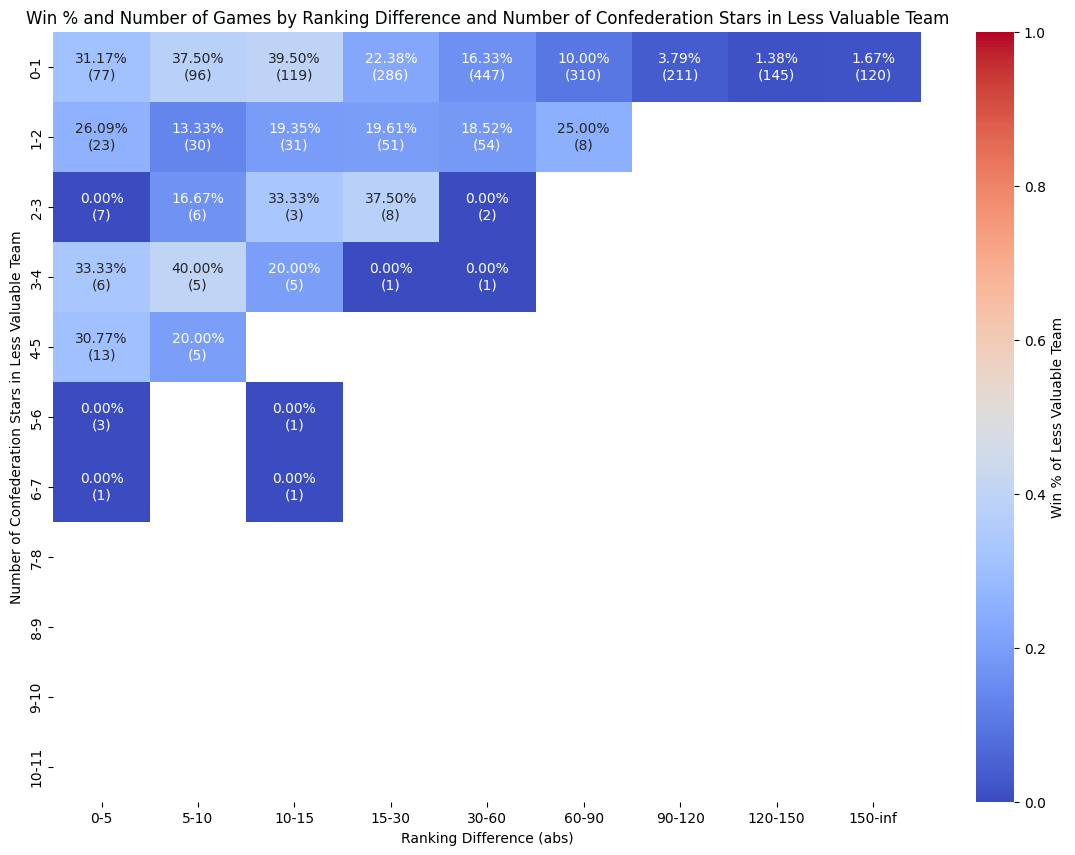

In [244]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Ranking Difference (abs)')
plt.ylabel('Number of Confederation Stars in Less Valuable Team')
plt.title('Win % and Number of Games by Ranking Difference and Number of Confederation Stars in Less Valuable Team')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/∆rank_#_confed_superstars_worse_ranked_team_{plot_type}_{continent_name}.png') 
plt.show()

### ∆MV vs # Confed superstars on lower value team

In [186]:
plot_type = 'Win rate of lower value team'
continent_name = 'Asia'
latest_match_data = latest_match_data[(latest_match_data['Competition'] == f'World Cup Qualifiers, {continent_name}')] #| (latest_match_data['Competition'] == f'Africa Cup of Nations') | (latest_match_data['Competition'] == f'Africa Cup of Nations, Qualifiers')

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
less_valuable_team_num_confed_stars_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(less_valuable_team_num_confed_stars_intervals) - 1):
        stars_lower_bound = less_valuable_team_num_confed_stars_intervals[j]
        stars_upper_bound = less_valuable_team_num_confed_stars_intervals[j + 1]
        
        stars_filtered_data = mv_filtered_data[(mv_filtered_data['less_valuable_team_num_confed_stars'] >= stars_lower_bound) &
                                               (mv_filtered_data['less_valuable_team_num_confed_stars'] < stars_upper_bound)]
        
        # Count the number of rows
        row_count = len(stars_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'less_valuable_team_num_confed_stars_interval': f"{stars_lower_bound}-{stars_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='less_valuable_team_num_confed_stars_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval                    0-100000.0  100000.0-500000.0  \
less_valuable_team_num_confed_stars_interval                                  
0-1                                                   26                 64   
1-2                                                    0                  1   
2-3                                                    0                  1   
3-4                                                    0                  0   
4-5                                                    0                  0   
5-6                                                    0                  0   
6-7                                                    0                  0   
7-8                                                    0                  0   
8-9                                                    0                  0   
9-10                                                   0                  0   
10-11                                                  0                  0   

mv_difference_abs_interval                    500000.0-1000000.0  \
less_valuable_team_num_confed_stars_interval                       
0-1                                                           69   
1-2                                                            2   
2-3                                                            1   
3-4                                                            1   
4-5                                                            0   
5-6                                                            0   
6-7                                                            0   
7-8                                                            0   
8-9                                                            0   
9-10                                                           0   
10-11                                                          0   

mv_difference_abs_interval                    1000000.0-5000000.0  \
less_valuable_team_num_confed_stars_interval                        
0-1                                                           183   
1-2                                                             6   
2-3                                                             1   
3-4                                                             0   
4-5                                                             0   
5-6                                                             0   
6-7                                                             0   
7-8                                                             0   
8-9                                                             0   
9-10                                                            0   
10-11                                                           0   

mv_difference_abs_interval                    5000000.0-10000000.0  \
less_valuable_team_num_confed_stars_interval                         
0-1                                                             49   
1-2                                                             14   
2-3                                                              7   
3-4                                                              2   
4-5                                                              0   
5-6                                                              0   
6-7                                                              0   
7-8                                                              0   
8-9                                                              0   
9-10                                                             0   
10-11                                                            0   

mv_difference_abs_interval                    10000000.0-50000000.0  \
less_valuable_team_num_confed_stars_interval                          
0-1                                                             160   
1-2                                                              

In [187]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(less_valuable_team_num_confed_stars_intervals) - 1):
        stars_lower_bound = less_valuable_team_num_confed_stars_intervals[j]
        stars_upper_bound = less_valuable_team_num_confed_stars_intervals[j + 1]
        
        stars_filtered_data = mv_filtered_data[(mv_filtered_data['less_valuable_team_num_confed_stars'] >= stars_lower_bound) &
                                               (mv_filtered_data['less_valuable_team_num_confed_stars'] < stars_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = stars_filtered_data['MV_Prediction_Correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'less_valuable_team_num_confed_stars_interval': f"{stars_lower_bound}-{stars_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='less_valuable_team_num_confed_stars_interval', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval                    0-100000.0  100000.0-500000.0  \
less_valuable_team_num_confed_stars_interval                                  
0-1                                                   11                 20   
1-2                                                    0                  1   
2-3                                                    0                  1   
3-4                                                    0                  0   
4-5                                                    0                  0   
5-6                                                    0                  0   
6-7                                                    0                  0   
7-8                                                    0                  0   
8-9                                                    0                  0   
9-10                                                   0                  0   
10-11                                                  0                  0   

mv_difference_abs_interval                    500000.0-1000000.0  \
less_valuable_team_num_confed_stars_interval                       
0-1                                                           10   
1-2                                                            0   
2-3                                                            1   
3-4                                                            0   
4-5                                                            0   
5-6                                                            0   
6-7                                                            0   
7-8                                                            0   
8-9                                                            0   
9-10                                                           0   
10-11                                                          0   

mv_difference_abs_interval                    1000000.0-5000000.0  \
less_valuable_team_num_confed_stars_interval                        
0-1                                                            31   
1-2                                                             1   
2-3                                                             0   
3-4                                                             0   
4-5                                                             0   
5-6                                                             0   
6-7                                                             0   
7-8                                                             0   
8-9                                                             0   
9-10                                                            0   
10-11                                                           0   

mv_difference_abs_interval                    5000000.0-10000000.0  \
less_valuable_team_num_confed_stars_interval                         
0-1                                                              1   
1-2                                                              5   
2-3                                                              1   
3-4                                                              1   
4-5                                                              0   
5-6                                                              0   
6-7                                                              0   
7-8                                                              0   
8-9                                                              0   
9-10                                                             0   
10-11                                                            0   

mv_difference_abs_interval                    10000000.0-50000000.0  \
less_valuable_team_num_confed_stars_interval                          
0-1                                                              15   
1-2                                                              

In [188]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval                    0-100000.0  100000.0-500000.0  \
less_valuable_team_num_confed_stars_interval                                  
0-1                                             0.423077             0.3125   
1-2                                                  NaN             1.0000   
2-3                                                  NaN             1.0000   
3-4                                                  NaN                NaN   
4-5                                                  NaN                NaN   
5-6                                                  NaN                NaN   
6-7                                                  NaN                NaN   
7-8                                                  NaN                NaN   
8-9                                                  NaN                NaN   
9-10                                                 NaN                NaN   
10-11                                                NaN                NaN   

mv_difference_abs_interval                    500000.0-1000000.0  \
less_valuable_team_num_confed_stars_interval                       
0-1                                                     0.144928   
1-2                                                     0.000000   
2-3                                                     1.000000   
3-4                                                     0.000000   
4-5                                                          NaN   
5-6                                                          NaN   
6-7                                                          NaN   
7-8                                                          NaN   
8-9                                                          NaN   
9-10                                                         NaN   
10-11                                                        NaN   

mv_difference_abs_interval                    1000000.0-5000000.0  \
less_valuable_team_num_confed_stars_interval                        
0-1                                                      0.169399   
1-2                                                      0.166667   
2-3                                                      0.000000   
3-4                                                           NaN   
4-5                                                           NaN   
5-6                                                           NaN   
6-7                                                           NaN   
7-8                                                           NaN   
8-9                                                           NaN   
9-10                                                          NaN   
10-11                                                         NaN   

mv_difference_abs_interval                    5000000.0-10000000.0  \
less_valuable_team_num_confed_stars_interval                         
0-1                                                       0.020408   
1-2                                                       0.357143   
2-3                                                       0.142857   
3-4                                                       0.500000   
4-5                                                            NaN   
5-6                                                            NaN   
6-7                                                            NaN   
7-8                                                            NaN   
8-9                                                            NaN   
9-10                                                           NaN   
10-11                                                          NaN   

mv_difference_abs_interval                    10000000.0-50000000.0  \
less_valuable_team_num_confed_stars_interval                          
0-1                                                        0.093750   
1-2                                                        0.1666

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/4079534127.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '42.31%
(26)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/4079534127.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.25%
(64)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/4079534127.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

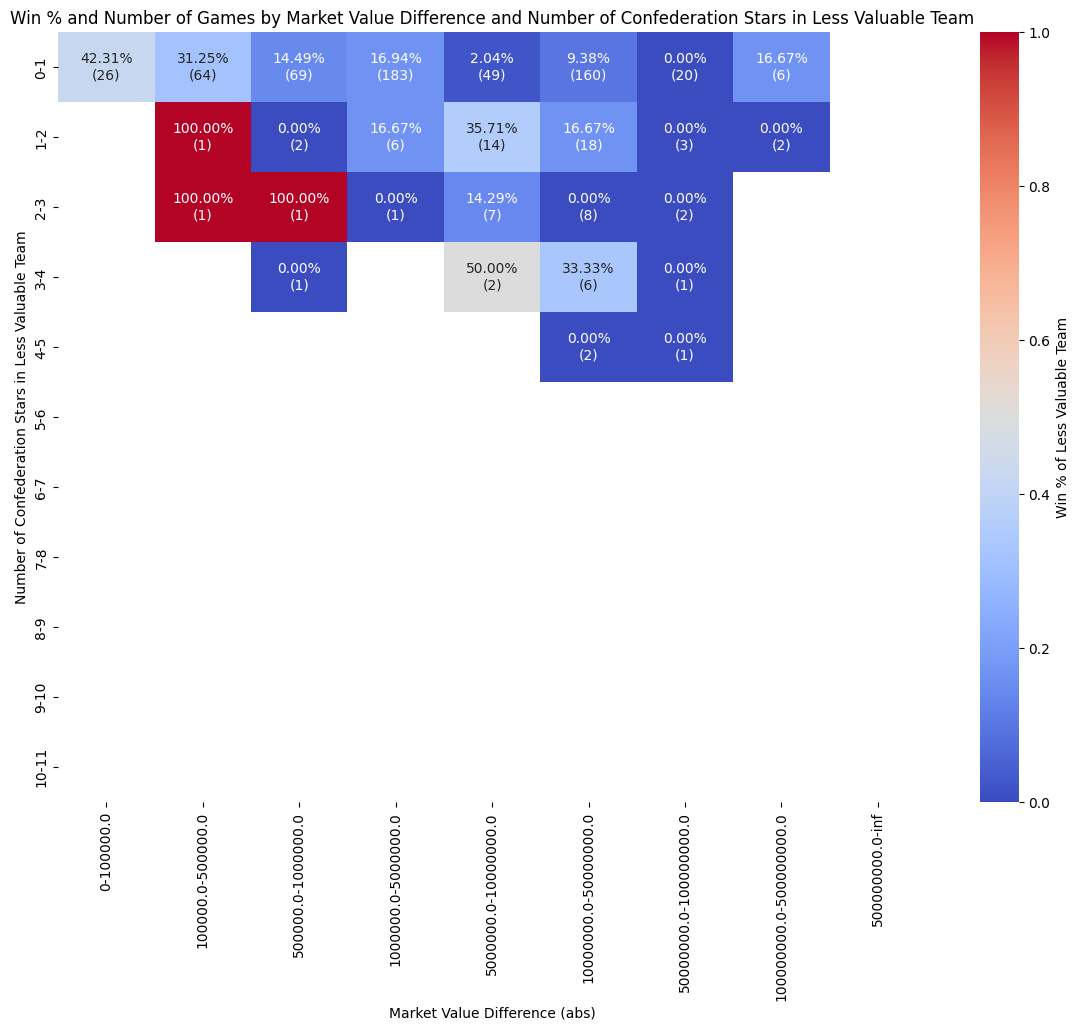

In [189]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Number of Confederation Stars in Less Valuable Team')
plt.title('Win % and Number of Games by Market Value Difference and Number of Confederation Stars in Less Valuable Team')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/∆mv_#_confed_superstars_less_valuable_team_{plot_type}_{continent_name}.png') 
plt.show()

### X = ∆MV, Y = ∆Confed Stars, heat = win% of higher / lower value team

In [133]:
plot_type = 'Win rate of lower value team'
continent_name = 'CONCACAF'
latest_match_data = latest_match_data[(latest_match_data['Competition'] == f'World Cup Qualifiers, {continent_name}') | (latest_match_data['Competition'] == f'Gold Cup')] #| (latest_match_data['Competition'] == f'Africa Cup of Nations') | (latest_match_data['Competition'] == f'Africa Cup of Nations, Qualifiers')

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
confederation_star_difference_intervals = list(range(-11, 12))  # From -11 to +11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(confederation_star_difference_intervals) - 1):
        cs_lower_bound = confederation_star_difference_intervals[j]
        cs_upper_bound = confederation_star_difference_intervals[j + 1]
        
        cs_filtered_data = mv_filtered_data[(mv_filtered_data['Confederation_star_difference'] >= cs_lower_bound) &
                                            (mv_filtered_data['Confederation_star_difference'] < cs_upper_bound)]
        
        # Count the number of rows
        row_count = len(cs_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'confederation_star_difference_interval': f"{cs_lower_bound}-{cs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='confederation_star_difference_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(10, -12, -1)]  # From 11 to -11
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval              0-100000.0  100000.0-500000.0  \
confederation_star_difference_interval                                  
10-11                                            0                  0   
9-10                                             0                  0   
8-9                                              0                  0   
7-8                                              0                  0   
6-7                                              0                  0   
5-6                                              0                  0   
4-5                                              0                  0   
3-4                                              0                  0   
2-3                                              0                  0   
1-2                                              0                  0   
0-1                                             29                 39   
-1-0                                             0                  0   
-2--1                                            0                  0   
-3--2                                            0                  0   
-4--3                                            0                  0   
-5--4                                            0                  0   
-6--5                                            0                  0   
-7--6                                            0                  0   
-8--7                                            0                  0   
-9--8                                            0                  0   
-10--9                                           0                  0   
-11--10                                          0                  0   

mv_difference_abs_interval              500000.0-1000000.0  \
confederation_star_difference_interval                       
10-11                                                    0   
9-10                                                     0   
8-9                                                      0   
7-8                                                      0   
6-7                                                      0   
5-6                                                      0   
4-5                                                      0   
3-4                                                      0   
2-3                                                      0   
1-2                                                      0   
0-1                                                     46   
-1-0                                                     0   
-2--1                                                    0   
-3--2                                                    0   
-4--3                                                    0   
-5--4                                                    0   
-6--5                                                    0   
-7--6                                                    0   
-8--7                                                    0   
-9--8                                                    0   
-10--9                                                   0   
-11--10                                                  0   

mv_difference_abs_interval              1000000.0-5000000.0  \
confederation_star_difference_interval                        
10-11                                                     0   
9-10                                                      0   
8-9                                                       0   
7-8                                                       0   
6-7                                                       0   
5-6                                                       0   
4-5                                                       0   
3-4                                                       0   
2-3                                                       2   
1-2                                                       5   
0-

In [134]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(confederation_star_difference_intervals) - 1):
        cs_lower_bound = confederation_star_difference_intervals[j]
        cs_upper_bound = confederation_star_difference_intervals[j + 1]
        
        cs_filtered_data = mv_filtered_data[(mv_filtered_data['Confederation_star_difference'] >= cs_lower_bound) &
                                            (mv_filtered_data['Confederation_star_difference'] < cs_upper_bound)]
        
        if cs_lower_bound == 0:
            # Use rank_prediction_correct values when Confederation_star_difference is 0
            prediction_sum = cs_filtered_data['MV_Prediction_Correct_inverse'].sum()
        elif cs_lower_bound > 0:
            # Use rank_prediction_correct values for positive differences
            prediction_sum = cs_filtered_data['MV_Prediction_Correct_inverse'].sum()
        else:
            # Use rank_prediction_correct_inverse values for negative differences
            prediction_sum = cs_filtered_data['MV_Prediction_Correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'confederation_star_difference_interval': f"{cs_lower_bound}-{cs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='confederation_star_difference_interval', columns='mv_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval              0-100000.0  100000.0-500000.0  \
confederation_star_difference_interval                                  
10-11                                            0                  0   
9-10                                             0                  0   
8-9                                              0                  0   
7-8                                              0                  0   
6-7                                              0                  0   
5-6                                              0                  0   
4-5                                              0                  0   
3-4                                              0                  0   
2-3                                              0                  0   
1-2                                              0                  0   
0-1                                              4                 11   
-1-0                                             0                  0   
-2--1                                            0                  0   
-3--2                                            0                  0   
-4--3                                            0                  0   
-5--4                                            0                  0   
-6--5                                            0                  0   
-7--6                                            0                  0   
-8--7                                            0                  0   
-9--8                                            0                  0   
-10--9                                           0                  0   
-11--10                                          0                  0   

mv_difference_abs_interval              500000.0-1000000.0  \
confederation_star_difference_interval                       
10-11                                                    0   
9-10                                                     0   
8-9                                                      0   
7-8                                                      0   
6-7                                                      0   
5-6                                                      0   
4-5                                                      0   
3-4                                                      0   
2-3                                                      0   
1-2                                                      0   
0-1                                                      9   
-1-0                                                     0   
-2--1                                                    0   
-3--2                                                    0   
-4--3                                                    0   
-5--4                                                    0   
-6--5                                                    0   
-7--6                                                    0   
-8--7                                                    0   
-9--8                                                    0   
-10--9                                                   0   
-11--10                                                  0   

mv_difference_abs_interval              1000000.0-5000000.0  \
confederation_star_difference_interval                        
10-11                                                     0   
9-10                                                      0   
8-9                                                       0   
7-8                                                       0   
6-7                                                       0   
5-6                                                       0   
4-5                                                       0   
3-4                                                       0   
2-3                                                       0   
1-2                                                       1   
0-

In [135]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval              0-100000.0  100000.0-500000.0  \
confederation_star_difference_interval                                  
10-11                                          NaN                NaN   
9-10                                           NaN                NaN   
8-9                                            NaN                NaN   
7-8                                            NaN                NaN   
6-7                                            NaN                NaN   
5-6                                            NaN                NaN   
4-5                                            NaN                NaN   
3-4                                            NaN                NaN   
2-3                                            NaN                NaN   
1-2                                            NaN                NaN   
0-1                                       0.137931           0.282051   
-1-0                                           NaN                NaN   
-2--1                                          NaN                NaN   
-3--2                                          NaN                NaN   
-4--3                                          NaN                NaN   
-5--4                                          NaN                NaN   
-6--5                                          NaN                NaN   
-7--6                                          NaN                NaN   
-8--7                                          NaN                NaN   
-9--8                                          NaN                NaN   
-10--9                                         NaN                NaN   
-11--10                                        NaN                NaN   

mv_difference_abs_interval              500000.0-1000000.0  \
confederation_star_difference_interval                       
10-11                                                  NaN   
9-10                                                   NaN   
8-9                                                    NaN   
7-8                                                    NaN   
6-7                                                    NaN   
5-6                                                    NaN   
4-5                                                    NaN   
3-4                                                    NaN   
2-3                                                    NaN   
1-2                                                    NaN   
0-1                                               0.195652   
-1-0                                                   NaN   
-2--1                                                  NaN   
-3--2                                                  NaN   
-4--3                                                  NaN   
-5--4                                                  NaN   
-6--5                                                  NaN   
-7--6                                                  NaN   
-8--7                                                  NaN   
-9--8                                                  NaN   
-10--9                                                 NaN   
-11--10                                                NaN   

mv_difference_abs_interval              1000000.0-5000000.0  \
confederation_star_difference_interval                        
10-11                                                   NaN   
9-10                                                    NaN   
8-9                                                     NaN   
7-8                                                     NaN   
6-7                                                     NaN   
5-6                                                     NaN   
4-5                                                     NaN   
3-4                                                     NaN   
2-3                                                0.000000   
1-2                                                0.200000   
0-

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/3272049226.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


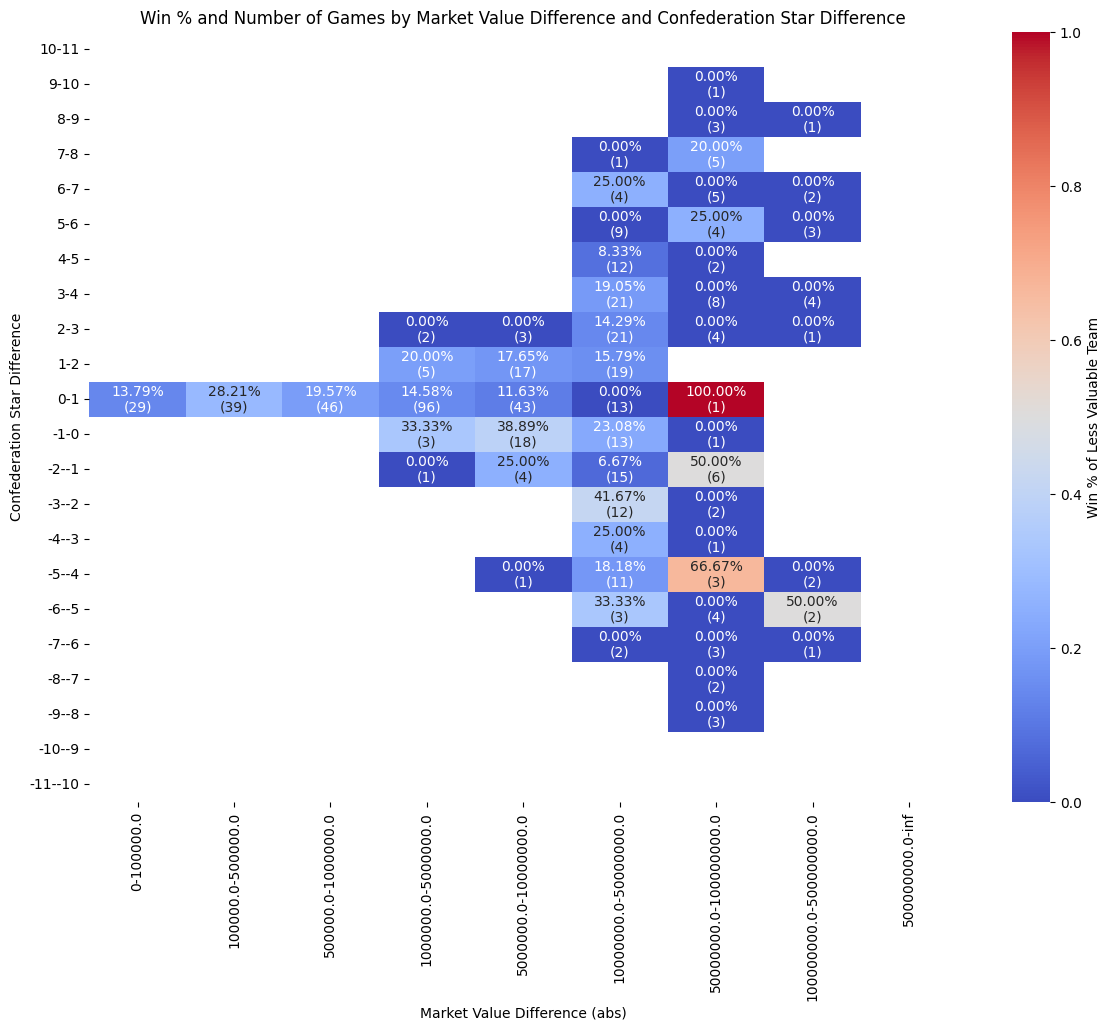

In [136]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Confederation Star Difference')
plt.title('Win % and Number of Games by Market Value Difference and Confederation Star Difference')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/∆mv_∆confed_superstars_{plot_type}_{continent_name}.png') 
plt.show()

### X = ∆Rank, Y = ∆Confed Stars, heat = win% of higher / lower ranked team

In [87]:
plot_type = 'Win rate of worse ranked team'
continent_name = 'Europe'
latest_match_data = latest_match_data[(latest_match_data['Competition'] == f'World Cup Qualifiers, {continent_name}') | (latest_match_data['Competition'] == f'Euros, Qualifiers') | (latest_match_data['Competition'] == f'Euros') | (latest_match_data['Competition'] == f'Nations League')] #| (latest_match_data['Competition'] == f'Africa Cup of Nations') | (latest_match_data['Competition'] == f'Africa Cup of Nations, Qualifiers')

# Define the intervals (bins)
ranking_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
confederation_star_difference_intervals = list(range(-11, 12))  # From -11 to +11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(ranking_difference_abs_intervals) - 1):
    rank_lower_bound = ranking_difference_abs_intervals[i]
    rank_upper_bound = ranking_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(confederation_star_difference_intervals) - 1):
        cs_lower_bound = confederation_star_difference_intervals[j]
        cs_upper_bound = confederation_star_difference_intervals[j + 1]
        
        cs_filtered_data = rank_filtered_data[(rank_filtered_data['Confederation_star_difference'] >= cs_lower_bound) &
                                              (rank_filtered_data['Confederation_star_difference'] < cs_upper_bound)]
        
        # Count the number of rows
        row_count = len(cs_filtered_data)
        
        results.append({
            'ranking_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'confederation_star_difference_interval': f"{cs_lower_bound}-{cs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='confederation_star_difference_interval', columns='ranking_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(10, -12, -1)]  # From 11 to -11
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

ranking_difference_abs_interval         0-5  5-10  10-15  15-30  30-60  60-90  \
confederation_star_difference_interval                                          
10-11                                     0     0      0      0      0      0   
9-10                                      0     0      0      0      0      0   
8-9                                       0     0      0      0      0      0   
7-8                                       0     0      2      4      4      3   
6-7                                       1     0      0      4      5      1   
5-6                                       4     2      3      3      7      2   
4-5                                       3     6      3      4     12      6   
3-4                                       1     5      6     17     11      8   
2-3                                       3     8      4     15     14      6   
1-2                                      19    15     31     39     53     44   
0-1                                      71    67     82    183    295    182   
-1-0                                     16    21     17     39     50     34   
-2--1                                     4     9      5     13     16     10   
-3--2                                     3     5      4      8     13     10   
-4--3                                     3     2      1      5     11      3   
-5--4                                     0     1      2      6      7      2   
-6--5                                     1     1      0      3      2      4   
-7--6                                     1     0      0      2      3      1   
-8--7                                     0     0      0      1      1      2   
-9--8                                     0     0      0      0      0      0   
-10--9                                    0     0      0      0      0      0   
-11--10                                   0     0      0      0      0      0   

ranking_difference_abs_interval         90-120  120-150  150-inf  
confederation_star_difference_interval                            
10-11                                        0        0        0  
9-10                                         0        0        0  
8-9                                          0        0        1  
7-8                                          3        1        1  
6-7                                          1        1        0  
5-6                                          1        1        1  
4-5                                          0        1        3  
3-4                                          7        1        8  
2-3                                          6        5        7  
1-2                                         22       19       15  
0-1                                        130       94       50  
-1-0                                        26       11       13  
-2--1                                        6        3        8  
-3--2                                        5        3        4  
-4--3                                        1        1        4  
-5--4                                        1        1        4  
-6--5                                        0        1        1  
-7--6                                        0        1        0  
-8--7                                        1        0        0  
-9--8                                        1        1        0  
-10--9                                       0        0        0  
-11--10                                      0        0        0

In [88]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(ranking_difference_abs_intervals) - 1):
    rank_lower_bound = ranking_difference_abs_intervals[i]
    rank_upper_bound = ranking_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(confederation_star_difference_intervals) - 1):
        cs_lower_bound = confederation_star_difference_intervals[j]
        cs_upper_bound = confederation_star_difference_intervals[j + 1]
        
        cs_filtered_data = rank_filtered_data[(rank_filtered_data['Confederation_star_difference'] >= cs_lower_bound) &
                                              (rank_filtered_data['Confederation_star_difference'] < cs_upper_bound)]
        
        if cs_lower_bound == 0:
            # Use rank_prediction_correct values when Confederation_star_difference is 0
            prediction_sum = cs_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        elif cs_lower_bound > 0:
            # Use rank_prediction_correct values for positive differences
            prediction_sum = cs_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        else:
            # Use Confederation_star_difference_prediction_correct_inverse values for negative differences
            prediction_sum = cs_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'ranking_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'confederation_star_difference_interval': f"{cs_lower_bound}-{cs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='confederation_star_difference_interval', columns='ranking_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

ranking_difference_abs_interval         0-5  5-10  10-15  15-30  30-60  60-90  \
confederation_star_difference_interval                                          
10-11                                     0     0      0      0      0      0   
9-10                                      0     0      0      0      0      0   
8-9                                       0     0      0      0      0      0   
7-8                                       0     0      0      0      0      0   
6-7                                       0     0      0      0      1      0   
5-6                                       1     1      2      0      0      0   
4-5                                       1     1      1      0      0      0   
3-4                                       0     0      2      2      1      0   
2-3                                       1     1      1      2      0      0   
1-2                                       9     6     13      5      4      6   
0-1                                      17    18     26     48     56     24   
-1-0                                      5    11      7     13     13      2   
-2--1                                     0     2      3      4      3      0   
-3--2                                     0     1      0      1      0      0   
-4--3                                     1     1      0      0      1      0   
-5--4                                     0     1      0      1      2      0   
-6--5                                     1     1      0      1      0      1   
-7--6                                     0     0      0      0      1      0   
-8--7                                     0     0      0      0      1      0   
-9--8                                     0     0      0      0      0      0   
-10--9                                    0     0      0      0      0      0   
-11--10                                   0     0      0      0      0      0   

ranking_difference_abs_interval         90-120  120-150  150-inf  
confederation_star_difference_interval                            
10-11                                        0        0        0  
9-10                                         0        0        0  
8-9                                          0        0        0  
7-8                                          0        0        0  
6-7                                          0        0        0  
5-6                                          0        0        0  
4-5                                          0        0        0  
3-4                                          0        0        0  
2-3                                          0        0        0  
1-2                                          1        1        0  
0-1                                          5        1        2  
-1-0                                         2        0        0  
-2--1                                        0        0        0  
-3--2                                        0        0        0  
-4--3                                        0        0        0  
-5--4                                        0        0        0  
-6--5                                        0        0        0  
-7--6                                        0        0        0  
-8--7                                        0        0        0  
-9--8                                        0        0        0  
-10--9                                       0        0        0  
-11--10                                      0        0        0

In [89]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

ranking_difference_abs_interval              0-5      5-10     10-15  \
confederation_star_difference_interval                                 
10-11                                        NaN       NaN       NaN   
9-10                                         NaN       NaN       NaN   
8-9                                          NaN       NaN       NaN   
7-8                                          NaN       NaN  0.000000   
6-7                                     0.000000       NaN       NaN   
5-6                                     0.250000  0.500000  0.666667   
4-5                                     0.333333  0.166667  0.333333   
3-4                                     0.000000  0.000000  0.333333   
2-3                                     0.333333  0.125000  0.250000   
1-2                                     0.473684  0.400000  0.419355   
0-1                                     0.239437  0.268657  0.317073   
-1-0                                    0.312500  0.523810  0.411765   
-2--1                                   0.000000  0.222222  0.600000   
-3--2                                   0.000000  0.200000  0.000000   
-4--3                                   0.333333  0.500000  0.000000   
-5--4                                        NaN  1.000000  0.000000   
-6--5                                   1.000000  1.000000       NaN   
-7--6                                   0.000000       NaN       NaN   
-8--7                                        NaN       NaN       NaN   
-9--8                                        NaN       NaN       NaN   
-10--9                                       NaN       NaN       NaN   
-11--10                                      NaN       NaN       NaN   

ranking_difference_abs_interval            15-30     30-60     60-90  \
confederation_star_difference_interval                                 
10-11                                        NaN       NaN       NaN   
9-10                                         NaN       NaN       NaN   
8-9                                          NaN       NaN       NaN   
7-8                                     0.000000  0.000000  0.000000   
6-7                                     0.000000  0.200000  0.000000   
5-6                                     0.000000  0.000000  0.000000   
4-5                                     0.000000  0.000000  0.000000   
3-4                                     0.117647  0.090909  0.000000   
2-3                                     0.133333  0.000000  0.000000   
1-2                                     0.128205  0.075472  0.136364   
0-1                                     0.262295  0.189831  0.131868   
-1-0                                    0.333333  0.260000  0.058824   
-2--1                                   0.307692  0.187500  0.000000   
-3--2                                   0.125000  0.000000  0.000000   
-4--3                                   0.000000  0.090909  0.000000   
-5--4                                   0.166667  0.285714  0.000000   
-6--5                                   0.333333  0.000000  0.250000   
-7--6                                   0.000000  0.333333  0.000000   
-8--7                                   0.000000  1.000000  0.000000   
-9--8                                        NaN       NaN       NaN   
-10--9                                       NaN       NaN       NaN   
-11--10                                      NaN       NaN       NaN   

ranking_difference_abs_interval           90-120   120-150  150-inf  
confederation_star_difference_interval                               
10-11                                        NaN       NaN      NaN  
9-10                                         NaN       NaN      NaN  
8-9                                          NaN       NaN     0.00  
7-8                                     0.000000  0.000000     0.00  
6-7                                     0.000000  0.000000      NaN  
5-6                                     0.000000  0.

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_32438/367100337.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


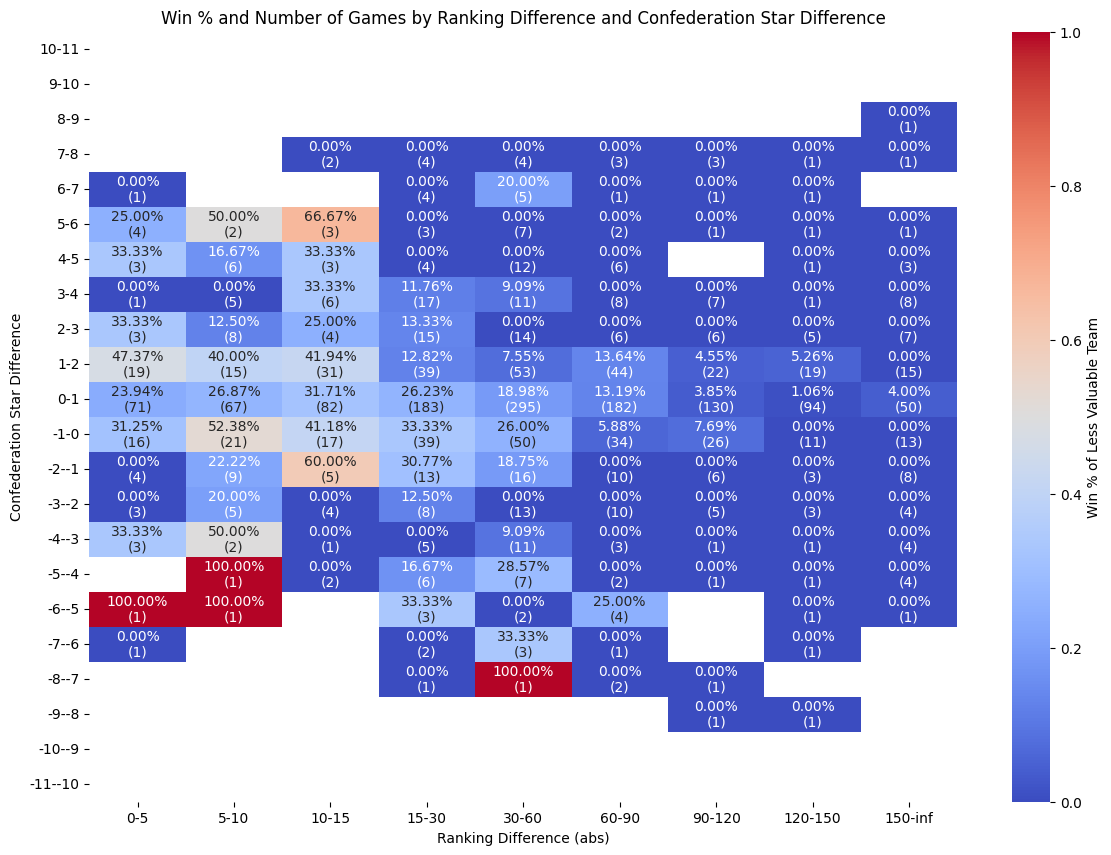

In [90]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Ranking Difference (abs)')
plt.ylabel('Confederation Star Difference')
plt.title('Win % and Number of Games by Ranking Difference and Confederation Star Difference')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/∆rank_∆confed_superstars_{plot_type}_{continent_name}.png') 
plt.show()

### X = team with super star MV, Y = team without super star MV

In [203]:
continent_name = 'Asia'
plot_type = 'Win rate of team without confederation star'
latest_match_data = latest_match_data[(latest_match_data['Competition'] == 'World Cup Qualifiers, Asia')]

# Define the intervals (bins)
team_with_superstar_mv_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
team_without_superstar_mv_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(team_with_superstar_mv_intervals) - 1):
    mv_lower_bound = team_with_superstar_mv_intervals[i]
    mv_upper_bound = team_with_superstar_mv_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['Team with Superstar MV'] >= mv_lower_bound) &
                                         (latest_match_data['Team with Superstar MV'] < mv_upper_bound)]
    
    for j in range(len(team_without_superstar_mv_intervals) - 1):
        rank_lower_bound = team_without_superstar_mv_intervals[j]
        rank_upper_bound = team_without_superstar_mv_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['Team without Superstar MV'] >= rank_lower_bound) &
                                              (mv_filtered_data['Team without Superstar MV'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        results.append({
            'team_with_superstar_mv_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'team_without_superstar_mv_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='team_without_superstar_mv_interval', columns='team_with_superstar_mv_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '5000000.0-10000000.0',
    '1000000.0-5000000.0',
    '500000.0-1000000.0',
    '100000.0-500000.0',
    '0-100000.0'
]

new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

team_with_superstar_mv_interval     0-100000.0  100000.0-500000.0  \
team_without_superstar_mv_interval                                  
500000000.0-inf                              0                  0   
100000000.0-500000000.0                      0                  0   
50000000.0-100000000.0                       0                  0   
10000000.0-50000000.0                        0                  0   
5000000.0-10000000.0                         0                  0   
1000000.0-5000000.0                          0                  0   
500000.0-1000000.0                           0                  0   
100000.0-500000.0                            0                  0   
0-100000.0                                   0                  0   

team_with_superstar_mv_interval     500000.0-1000000.0  1000000.0-5000000.0  \
team_without_superstar_mv_interval                                            
500000000.0-inf                                      0                    0   
100000000.0-500000000.0                              0                    0   
50000000.0-100000000.0                               0                    0   
10000000.0-50000000.0                                0                    0   
5000000.0-10000000.0                                 0                    0   
1000000.0-5000000.0                                  0                    7   
500000.0-1000000.0                                   0                    2   
100000.0-500000.0                                    0                    3   
0-100000.0                                           0                    3   

team_with_superstar_mv_interval     5000000.0-10000000.0  \
team_without_superstar_mv_interval                         
500000000.0-inf                                        0   
100000000.0-500000000.0                                0   
50000000.0-100000000.0                                 0   
10000000.0-50000000.0                                  0   
5000000.0-10000000.0                                   4   
1000000.0-5000000.0                                   23   
500000.0-1000000.0                                     6   
100000.0-500000.0                                      4   
0-100000.0                                             1   

team_with_superstar_mv_interval     10000000.0-50000000.0  \
team_without_superstar_mv_interval                          
500000000.0-inf                                         0   
100000000.0-500000000.0                                 0   
50000000.0-100000000.0                                  0   
10000000.0-50000000.0                                   0   
5000000.0-10000000.0                                    1   
1000000.0-5000000.0                                    18   
500000.0-1000000.0                                      6   
100000.0-500000.0                                       4   
0-100000.0                                              0   

team_with_superstar_mv_interval     50000000.0-100000000.0  \
team_without_superstar_mv_interval                           
500000000.0-inf                                          0   
100000000.0-500000000.0                                  0   
50000000.0-100000000.0                                   0   
10000000.0-50000000.0                                    0   
5000000.0-10000000.0                                     0   
1000000.0-5000000.0                                      0   
500000.0-1000000.0                                       0   
100000.0-500000.0                                        0   
0-100000.0                                               0   

team_with_superstar_mv_interval     100000000.0-500000000.0  500000000.0-inf  
team_without_superstar_mv_interval                                            
500000000.0-inf                                           0                0  
100000000.0-500000000.0                                   0                0  
50000000.0-100000000.0                

In [204]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(team_with_superstar_mv_intervals) - 1):
    mv_lower_bound = team_with_superstar_mv_intervals[i]
    mv_upper_bound = team_with_superstar_mv_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['Team with Superstar MV'] >= mv_lower_bound) &
                                         (latest_match_data['Team with Superstar MV'] < mv_upper_bound)]
    
    for j in range(len(team_without_superstar_mv_intervals) - 1):
        rank_lower_bound = team_without_superstar_mv_intervals[j]
        rank_upper_bound = team_without_superstar_mv_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['Team without Superstar MV'] >= rank_lower_bound) &
                                              (mv_filtered_data['Team without Superstar MV'] < rank_upper_bound)]
        
        # Sum the Confederation_star_prediction_correct values
        mv_prediction_sum = rank_filtered_data['Confederation_star_prediction_correct_inverse'].sum()
        
        results.append({
            'team_with_superstar_mv_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'team_without_superstar_mv_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='team_without_superstar_mv_interval', columns='team_with_superstar_mv_interval', values='sum_mv_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

team_with_superstar_mv_interval     0-100000.0  100000.0-500000.0  \
team_without_superstar_mv_interval                                  
500000000.0-inf                              0                  0   
100000000.0-500000000.0                      0                  0   
50000000.0-100000000.0                       0                  0   
10000000.0-50000000.0                        0                  0   
5000000.0-10000000.0                         0                  0   
1000000.0-5000000.0                          0                  0   
500000.0-1000000.0                           0                  0   
100000.0-500000.0                            0                  0   
0-100000.0                                   0                  0   

team_with_superstar_mv_interval     500000.0-1000000.0  1000000.0-5000000.0  \
team_without_superstar_mv_interval                                            
500000000.0-inf                                      0                    0   
100000000.0-500000000.0                              0                    0   
50000000.0-100000000.0                               0                    0   
10000000.0-50000000.0                                0                    0   
5000000.0-10000000.0                                 0                    0   
1000000.0-5000000.0                                  0                    2   
500000.0-1000000.0                                   0                    0   
100000.0-500000.0                                    0                    1   
0-100000.0                                           0                    0   

team_with_superstar_mv_interval     5000000.0-10000000.0  \
team_without_superstar_mv_interval                         
500000000.0-inf                                        0   
100000000.0-500000000.0                                0   
50000000.0-100000000.0                                 0   
10000000.0-50000000.0                                  0   
5000000.0-10000000.0                                   3   
1000000.0-5000000.0                                    3   
500000.0-1000000.0                                     0   
100000.0-500000.0                                      0   
0-100000.0                                             0   

team_with_superstar_mv_interval     10000000.0-50000000.0  \
team_without_superstar_mv_interval                          
500000000.0-inf                                         0   
100000000.0-500000000.0                                 0   
50000000.0-100000000.0                                  0   
10000000.0-50000000.0                                   0   
5000000.0-10000000.0                                    0   
1000000.0-5000000.0                                     2   
500000.0-1000000.0                                      0   
100000.0-500000.0                                       0   
0-100000.0                                              0   

team_with_superstar_mv_interval     50000000.0-100000000.0  \
team_without_superstar_mv_interval                           
500000000.0-inf                                          0   
100000000.0-500000000.0                                  0   
50000000.0-100000000.0                                   0   
10000000.0-50000000.0                                    0   
5000000.0-10000000.0                                     0   
1000000.0-5000000.0                                      0   
500000.0-1000000.0                                       0   
100000.0-500000.0                                        0   
0-100000.0                                               0   

team_with_superstar_mv_interval     100000000.0-500000000.0  500000000.0-inf  
team_without_superstar_mv_interval                                            
500000000.0-inf                                           0                0  
100000000.0-500000000.0                                   0                0  
50000000.0-100000000.0                

In [205]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

team_with_superstar_mv_interval     0-100000.0  100000.0-500000.0  \
team_without_superstar_mv_interval                                  
500000000.0-inf                            NaN                NaN   
100000000.0-500000000.0                    NaN                NaN   
50000000.0-100000000.0                     NaN                NaN   
10000000.0-50000000.0                      NaN                NaN   
5000000.0-10000000.0                       NaN                NaN   
1000000.0-5000000.0                        NaN                NaN   
500000.0-1000000.0                         NaN                NaN   
100000.0-500000.0                          NaN                NaN   
0-100000.0                                 NaN                NaN   

team_with_superstar_mv_interval     500000.0-1000000.0  1000000.0-5000000.0  \
team_without_superstar_mv_interval                                            
500000000.0-inf                                    NaN                  NaN   
100000000.0-500000000.0                            NaN                  NaN   
50000000.0-100000000.0                             NaN                  NaN   
10000000.0-50000000.0                              NaN                  NaN   
5000000.0-10000000.0                               NaN                  NaN   
1000000.0-5000000.0                                NaN             0.285714   
500000.0-1000000.0                                 NaN             0.000000   
100000.0-500000.0                                  NaN             0.333333   
0-100000.0                                         NaN             0.000000   

team_with_superstar_mv_interval     5000000.0-10000000.0  \
team_without_superstar_mv_interval                         
500000000.0-inf                                      NaN   
100000000.0-500000000.0                              NaN   
50000000.0-100000000.0                               NaN   
10000000.0-50000000.0                                NaN   
5000000.0-10000000.0                            0.750000   
1000000.0-5000000.0                             0.130435   
500000.0-1000000.0                              0.000000   
100000.0-500000.0                               0.000000   
0-100000.0                                      0.000000   

team_with_superstar_mv_interval     10000000.0-50000000.0  \
team_without_superstar_mv_interval                          
500000000.0-inf                                       NaN   
100000000.0-500000000.0                               NaN   
50000000.0-100000000.0                                NaN   
10000000.0-50000000.0                                 NaN   
5000000.0-10000000.0                             0.000000   
1000000.0-5000000.0                              0.111111   
500000.0-1000000.0                               0.000000   
100000.0-500000.0                                0.000000   
0-100000.0                                            NaN   

team_with_superstar_mv_interval     50000000.0-100000000.0  \
team_without_superstar_mv_interval                           
500000000.0-inf                                        NaN   
100000000.0-500000000.0                                NaN   
50000000.0-100000000.0                                 NaN   
10000000.0-50000000.0                                  NaN   
5000000.0-10000000.0                                   NaN   
1000000.0-5000000.0                                    NaN   
500000.0-1000000.0                                     NaN   
100000.0-500000.0                                      NaN   
0-100000.0                                             NaN   

team_with_superstar_mv_interval     100000000.0-500000000.0  500000000.0-inf  
team_without_superstar_mv_interval                                            
500000000.0-inf                                         NaN              NaN  
100000000.0-500000000.0                                 NaN              NaN  
50000000.0-100000000.0                

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_82981/3448466093.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


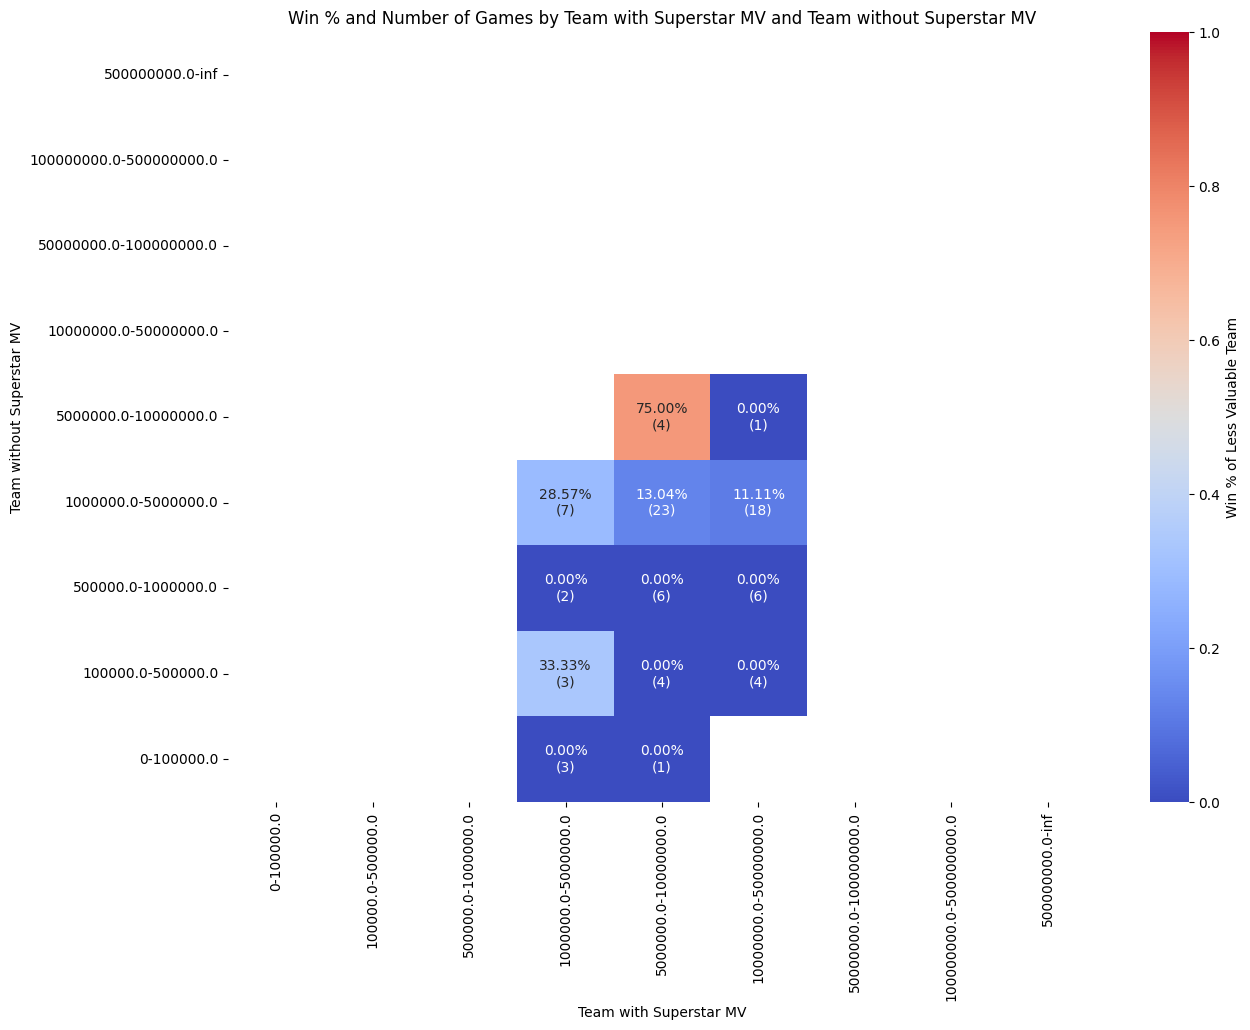

In [206]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Team with Superstar MV')
plt.ylabel('Team without Superstar MV')
plt.title('Win % and Number of Games by Team with Superstar MV and Team without Superstar MV')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/1_confed_superstar_on_1_team_teams_MV_{plot_type}_{continent_name}.png') 
plt.show()

### NEW JULY 20 - ∆MV vs ∆Rank

In [31]:
#continent_name = 'World Cup'
plot_type = 'Win rate of worse ranked team'
#latest_match_data = latest_match_data[(latest_match_data['Competition'] == 'World Cup')]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[j]
        rank_upper_bound = rank_difference_abs_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (mv_filtered_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='rank_difference_abs_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '10-15',
    '5-10',
    '0-5'
]

new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval    0-100000.0  100000.0-500000.0  \
rank_difference_abs_interval                                  
150-inf                                0                  0   
120-150                                0                  0   
90-120                                 2                  5   
60-90                                 12                 17   
30-60                                 22                 75   
15-30                                 20                 41   
10-15                                  5                 23   
5-10                                   7                 14   
0-5                                   13                  9   

mv_difference_abs_interval    500000.0-1000000.0  1000000.0-5000000.0  \
rank_difference_abs_interval                                            
150-inf                                        0                    1   
120-150                                        0                    9   
90-120                                         5                   43   
60-90                                         28                   96   
30-60                                         66                  207   
15-30                                         62                  166   
10-15                                         10                   50   
5-10                                          15                   44   
0-5                                           13                   39   

mv_difference_abs_interval    5000000.0-10000000.0  10000000.0-50000000.0  \
rank_difference_abs_interval                                                
150-inf                                          1                     28   
120-150                                         10                     79   
90-120                                          40                    148   
60-90                                           79                    280   
30-60                                          140                    458   
15-30                                          114                    286   
10-15                                           38                    101   
5-10                                            40                     92   
0-5                                             36                     83   

mv_difference_abs_interval    50000000.0-100000000.0  100000000.0-500000000.0  \
rank_difference_abs_interval                                                    
150-inf                                           27                       76   
120-150                                           51                       61   
90-120                                            81                      131   
60-90                                            158                      221   
30-60                                            196                      303   
15-30                                            135                      202   
10-15                                             65                       86   
5-10                                              48                      103   
0-5                                               58                       73   

mv_difference_abs_interval    500000000.0-inf  
rank_difference_abs_interval                   
150-inf                                     7  
120-150                                     2  
90-120                                      3  
60-90                                       9  
30-60                                      36  
15-30                                      12  
10-15                                       7  
5-10                                        1  
0-5                                         2

In [32]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[j]
        rank_upper_bound = rank_difference_abs_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (mv_filtered_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = rank_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='rank_difference_abs_interval', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval    0-100000.0  100000.0-500000.0  \
rank_difference_abs_interval                                  
150-inf                                0                  0   
120-150                                0                  0   
90-120                                 0                  1   
60-90                                  2                  5   
30-60                                  4                 15   
15-30                                  6                  8   
10-15                                  3                  5   
5-10                                   1                  8   
0-5                                    1                  4   

mv_difference_abs_interval    500000.0-1000000.0  1000000.0-5000000.0  \
rank_difference_abs_interval                                            
150-inf                                        0                    0   
120-150                                        0                    1   
90-120                                         0                    5   
60-90                                          1                   11   
30-60                                         12                   51   
15-30                                         18                   49   
10-15                                          2                   17   
5-10                                           2                   19   
0-5                                            8                   11   

mv_difference_abs_interval    5000000.0-10000000.0  10000000.0-50000000.0  \
rank_difference_abs_interval                                                
150-inf                                          0                      2   
120-150                                          1                      2   
90-120                                           3                     11   
60-90                                           12                     41   
30-60                                           31                     86   
15-30                                           34                     69   
10-15                                           10                     26   
5-10                                            12                     26   
0-5                                             13                     18   

mv_difference_abs_interval    50000000.0-100000000.0  100000000.0-500000000.0  \
rank_difference_abs_interval                                                    
150-inf                                            0                        0   
120-150                                            1                        1   
90-120                                             3                        5   
60-90                                             18                       11   
30-60                                             30                       37   
15-30                                             32                       30   
10-15                                             23                       24   
5-10                                              22                       25   
0-5                                               17                       19   

mv_difference_abs_interval    500000000.0-inf  
rank_difference_abs_interval                   
150-inf                                     0  
120-150                                     0  
90-120                                      0  
60-90                                       0  
30-60                                       4  
15-30                                       0  
10-15                                       0  
5-10                                        0  
0-5                                         1

In [33]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval    0-100000.0  100000.0-500000.0  \
rank_difference_abs_interval                                  
150-inf                              NaN                NaN   
120-150                              NaN                NaN   
90-120                          0.000000           0.200000   
60-90                           0.166667           0.294118   
30-60                           0.181818           0.200000   
15-30                           0.300000           0.195122   
10-15                           0.600000           0.217391   
5-10                            0.142857           0.571429   
0-5                             0.076923           0.444444   

mv_difference_abs_interval    500000.0-1000000.0  1000000.0-5000000.0  \
rank_difference_abs_interval                                            
150-inf                                      NaN             0.000000   
120-150                                      NaN             0.111111   
90-120                                  0.000000             0.116279   
60-90                                   0.035714             0.114583   
30-60                                   0.181818             0.246377   
15-30                                   0.290323             0.295181   
10-15                                   0.200000             0.340000   
5-10                                    0.133333             0.431818   
0-5                                     0.615385             0.282051   

mv_difference_abs_interval    5000000.0-10000000.0  10000000.0-50000000.0  \
rank_difference_abs_interval                                                
150-inf                                   0.000000               0.071429   
120-150                                   0.100000               0.025316   
90-120                                    0.075000               0.074324   
60-90                                     0.151899               0.146429   
30-60                                     0.221429               0.187773   
15-30                                     0.298246               0.241259   
10-15                                     0.263158               0.257426   
5-10                                      0.300000               0.282609   
0-5                                       0.361111               0.216867   

mv_difference_abs_interval    50000000.0-100000000.0  100000000.0-500000000.0  \
rank_difference_abs_interval                                                    
150-inf                                     0.000000                 0.000000   
120-150                                     0.019608                 0.016393   
90-120                                      0.037037                 0.038168   
60-90                                       0.113924                 0.049774   
30-60                                       0.153061                 0.122112   
15-30                                       0.237037                 0.148515   
10-15                                       0.353846                 0.279070   
5-10                                        0.458333                 0.242718   
0-5                                         0.293103                 0.260274   

mv_difference_abs_interval    500000000.0-inf  
rank_difference_abs_interval                   
150-inf                              0.000000  
120-150                              0.000000  
90-120                               0.000000  
60-90                                0.000000  
30-60                                0.111111  
15-30                                0.000000  
10-15                                0.000000  
5-10                                 0.000000  
0-5                                  0.500000

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3667397118.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3667397118.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/3667397118.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of 

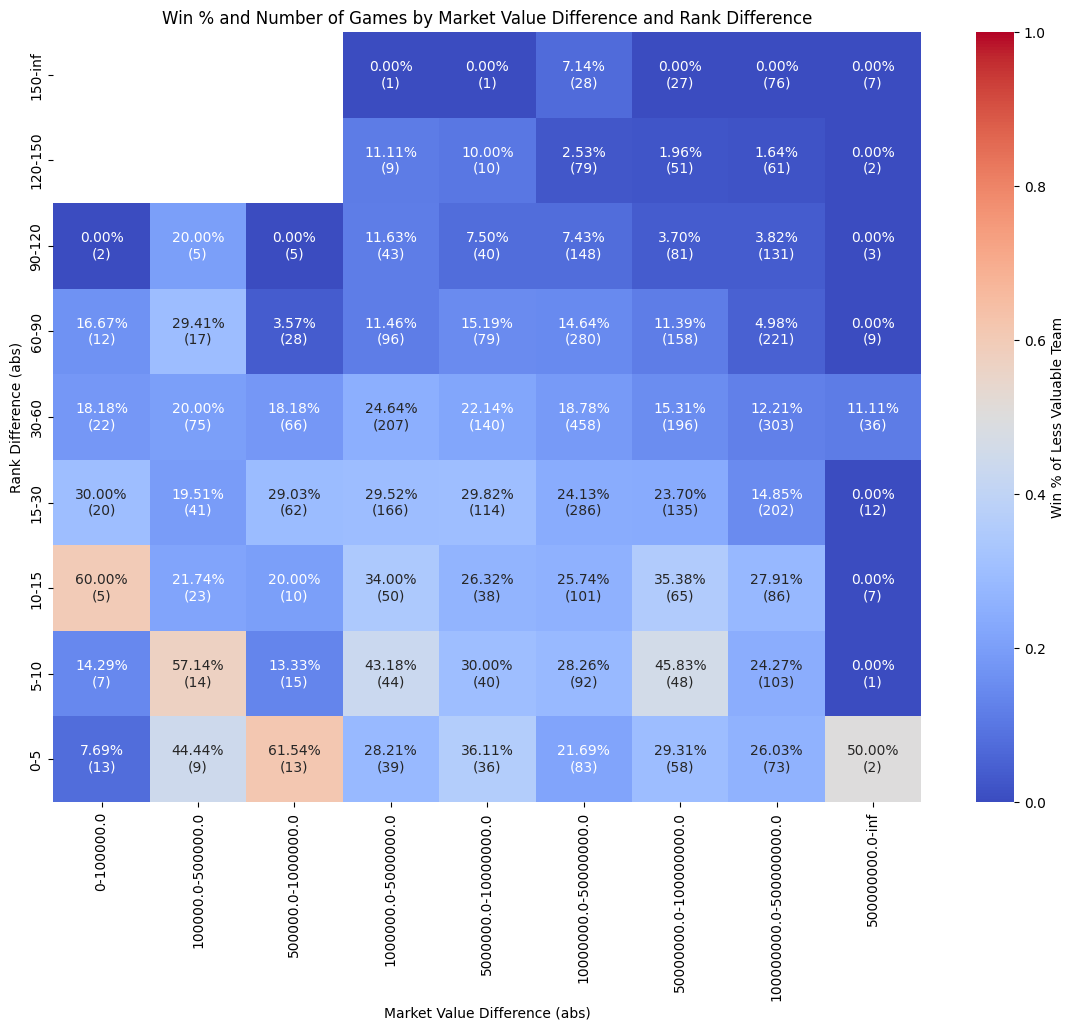

In [34]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Rank Difference (abs)')
plt.title('Win % and Number of Games by Market Value Difference and Rank Difference')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/0_confed_superstars_∆MV_∆Rank_{plot_type}_all_data.png') 
plt.show()

### ∆Rank vs ∆0-value players

In [170]:
plot_type = 'Win rate of team with more 0-value players'
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
valuable_players_difference_abs_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(valuable_players_difference_abs_intervals) - 1):
        vp_lower_bound = valuable_players_difference_abs_intervals[j]
        vp_upper_bound = valuable_players_difference_abs_intervals[j + 1]
        
        vp_filtered_data = rank_filtered_data[(rank_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] >= vp_lower_bound) &
                                              (rank_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] < vp_upper_bound)]
        
        # Count the number of rows
        row_count = len(vp_filtered_data)
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'valuable_players_difference_abs_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='valuable_players_difference_abs_interval', columns='rank_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

rank_difference_abs_interval              0-5  5-10  10-15  15-30  30-60  \
valuable_players_difference_abs_interval                                   
0-1                                       232   258    274    641    823   
1-2                                        33    51     42    119    194   
2-3                                        15    17     20     85    112   
3-4                                        14     8     15     55     85   
4-5                                         5     7      7     43     79   
5-6                                         9     7     11     33     66   
6-7                                         1     5      7     18     48   
7-8                                         5     4      0     14     37   
8-9                                         2     6      5     11     23   
9-10                                        3     0      1      5     23   
10-11                                       1     1      0     10     11   

rank_difference_abs_interval              60-90  90-120  120-150  150-inf  
valuable_players_difference_abs_interval                                   
0-1                                         433     212       91       46  
1-2                                         110      42       22       13  
2-3                                          55      27       13        6  
3-4                                          65      16       14        6  
4-5                                          40      24        9        9  
5-6                                          45      23        7       10  
6-7                                          45      23       12        5  
7-8                                          37      24        8        6  
8-9                                          32      20       14       17  
9-10                                         13      20        7       12  
10-11                                        16      16        5        7

In [172]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(valuable_players_difference_abs_intervals) - 1):
        vp_lower_bound = valuable_players_difference_abs_intervals[j]
        vp_upper_bound = valuable_players_difference_abs_intervals[j + 1]
        
        vp_filtered_data = rank_filtered_data[(rank_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] >= vp_lower_bound) &
                                              (rank_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] < vp_upper_bound)]
        
        if vp_lower_bound == 0:
            # Use rank_prediction_correct values when Number.of.Valuable.Players.Difference.Absolute is 0
            prediction_sum = vp_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        else:
            # Use Number_of_valuable_players_prediction_correct values for negative differences
            prediction_sum = vp_filtered_data['Number_of_valuable_players_prediction_correct_inverse'].sum()
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'valuable_players_difference_abs_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='valuable_players_difference_abs_interval', columns='rank_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

rank_difference_abs_interval              0-5  5-10  10-15  15-30  30-60  \
valuable_players_difference_abs_interval                                   
0-1                                        62    81     87    144    147   
1-2                                        10    12     13     31     47   
2-3                                         6     4      5     26     24   
3-4                                         3     3      5     11     19   
4-5                                         1     1      3      7     14   
5-6                                         2     0      2      4     14   
6-7                                         1     1      1      3      6   
7-8                                         0     0      0      2      5   
8-9                                         0     1      1      1      2   
9-10                                        0     0      0      0      1   
10-11                                       0     0      0      1      1   

rank_difference_abs_interval              60-90  90-120  120-150  150-inf  
valuable_players_difference_abs_interval                                   
0-1                                          50       9        2        0  
1-2                                          19       8        2        1  
2-3                                          11       1        1        0  
3-4                                          11       1        1        0  
4-5                                           4       4        0        1  
5-6                                           4       5        1        0  
6-7                                           5       1        0        0  
7-8                                           4       0        0        0  
8-9                                           0       2        0        0  
9-10                                          0       0        0        0  
10-11                                         0       2        0        0

In [173]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

rank_difference_abs_interval                   0-5      5-10     10-15  \
valuable_players_difference_abs_interval                                 
0-1                                       0.267241  0.313953  0.317518   
1-2                                       0.303030  0.235294  0.309524   
2-3                                       0.400000  0.235294  0.250000   
3-4                                       0.214286  0.375000  0.333333   
4-5                                       0.200000  0.142857  0.428571   
5-6                                       0.222222  0.000000  0.181818   
6-7                                       1.000000  0.200000  0.142857   
7-8                                       0.000000  0.000000       NaN   
8-9                                       0.000000  0.166667  0.200000   
9-10                                      0.000000       NaN  0.000000   
10-11                                     0.000000  0.000000       NaN   

rank_difference_abs_interval                 15-30     30-60     60-90  \
valuable_players_difference_abs_interval                                 
0-1                                       0.224649  0.178615  0.115473   
1-2                                       0.260504  0.242268  0.172727   
2-3                                       0.305882  0.214286  0.200000   
3-4                                       0.200000  0.223529  0.169231   
4-5                                       0.162791  0.177215  0.100000   
5-6                                       0.121212  0.212121  0.088889   
6-7                                       0.166667  0.125000  0.111111   
7-8                                       0.142857  0.135135  0.108108   
8-9                                       0.090909  0.086957  0.000000   
9-10                                      0.000000  0.043478  0.000000   
10-11                                     0.100000  0.090909  0.000000   

rank_difference_abs_interval                90-120   120-150   150-inf  
valuable_players_difference_abs_interval                                
0-1                                       0.042453  0.021978  0.000000  
1-2                                       0.190476  0.090909  0.076923  
2-3                                       0.037037  0.076923  0.000000  
3-4                                       0.062500  0.071429  0.000000  
4-5                                       0.166667  0.000000  0.111111  
5-6                                       0.217391  0.142857  0.000000  
6-7                                       0.043478  0.000000  0.000000  
7-8                                       0.000000  0.000000  0.000000  
8-9                                       0.100000  0.000000  0.000000  
9-10                                      0.000000  0.000000  0.000000  
10-11                                     0.125000  0.000000  0.000000

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1014623469.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26.72%
(232)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1014623469.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.40%
(258)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1014623469.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future er

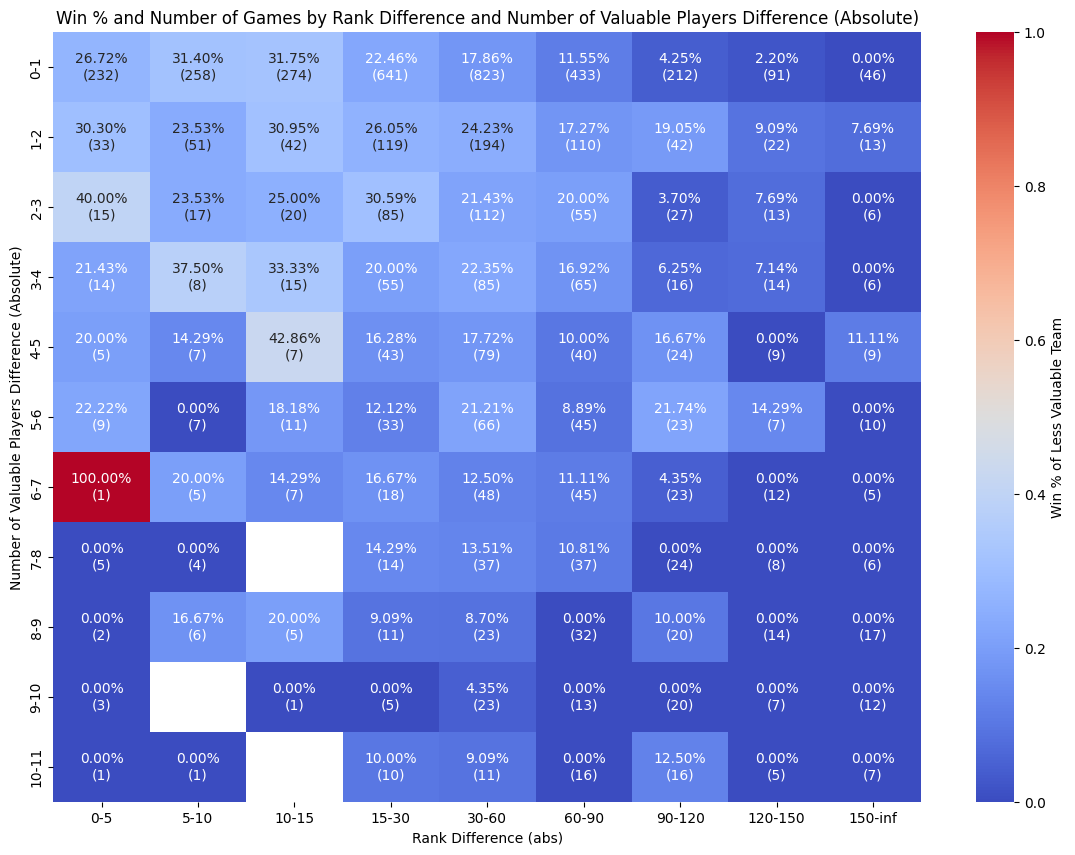

In [174]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Number of Valuable Players Difference (Absolute)')
plt.title('Win % and Number of Games by Rank Difference and Number of Valuable Players Difference (Absolute)')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/rank_diff_vs_valuable_players_diff_{plot_type}.png') 
plt.show()

### ∆MV vs ∆0-value players

In [157]:
plot_type = 'Win rate of team with more 0-value players'
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
valuable_players_difference_abs_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(valuable_players_difference_abs_intervals) - 1):
        vp_lower_bound = valuable_players_difference_abs_intervals[j]
        vp_upper_bound = valuable_players_difference_abs_intervals[j + 1]
        
        vp_filtered_data = mv_filtered_data[(mv_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] >= vp_lower_bound) &
                                            (mv_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] < vp_upper_bound)]
        
        # Count the number of rows
        row_count = len(vp_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'valuable_players_difference_abs_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='valuable_players_difference_abs_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval                0-100000.0  100000.0-500000.0  \
valuable_players_difference_abs_interval                                  
0-1                                               25                 47   
1-2                                               31                 50   
2-3                                                8                 26   
3-4                                                3                 24   
4-5                                                2                 12   
5-6                                                2                 13   
6-7                                                2                  7   
7-8                                                1                  3   
8-9                                                0                  2   
9-10                                               0                  0   
10-11                                              0                  0   

mv_difference_abs_interval                500000.0-1000000.0  \
valuable_players_difference_abs_interval                       
0-1                                                       47   
1-2                                                       41   
2-3                                                       26   
3-4                                                       21   
4-5                                                       27   
5-6                                                       15   
6-7                                                        9   
7-8                                                        5   
8-9                                                        4   
9-10                                                       3   
10-11                                                      0   

mv_difference_abs_interval                1000000.0-5000000.0  \
valuable_players_difference_abs_interval                        
0-1                                                       205   
1-2                                                        91   
2-3                                                        83   
3-4                                                        56   
4-5                                                        44   
5-6                                                        38   
6-7                                                        35   
7-8                                                        26   
8-9                                                        37   
9-10                                                       18   
10-11                                                      16   

mv_difference_abs_interval                5000000.0-10000000.0  \
valuable_players_difference_abs_interval                         
0-1                                                        179   
1-2                                                         77   
2-3                                                         38   
3-4                                                         45   
4-5                                                         31   
5-6                                                         27   
6-7                                                         18   
7-8                                                         20   
8-9                                                         24   
9-10                                                        18   
10-11                                                       12   

mv_difference_abs_interval                10000000.0-50000000.0  \
valuable_players_difference_abs_interval                          
0-1                                                         825   
1-2                                                         189   
2-3                                                         109   
3-4                                                          69   
4-5                                                          69   
5-6              

In [163]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(valuable_players_difference_abs_intervals) - 1):
        vp_lower_bound = valuable_players_difference_abs_intervals[j]
        vp_upper_bound = valuable_players_difference_abs_intervals[j + 1]
        
        vp_filtered_data = mv_filtered_data[(mv_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] >= vp_lower_bound) &
                                            (mv_filtered_data['Number.of.Valuable.Players.Difference.Absolute'] < vp_upper_bound)]
        
        if vp_lower_bound == 0:
            # Use MV_Prediction_Correct values when Number.of.Valuable.Players.Difference.Absolute is 0
            prediction_sum = vp_filtered_data['MV_Prediction_Correct_inverse'].sum()
        else:
            # Use Number_of_valuable_players_prediction_correct values for negative differences
            prediction_sum = vp_filtered_data['Number_of_valuable_players_prediction_correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'valuable_players_difference_abs_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='valuable_players_difference_abs_interval', columns='mv_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval                0-100000.0  100000.0-500000.0  \
valuable_players_difference_abs_interval                                  
0-1                                                3                 16   
1-2                                               11                 18   
2-3                                                4                 11   
3-4                                                3                  7   
4-5                                                0                  3   
5-6                                                0                  6   
6-7                                                1                  3   
7-8                                                1                  1   
8-9                                                0                  2   
9-10                                               0                  0   
10-11                                              0                  0   

mv_difference_abs_interval                500000.0-1000000.0  \
valuable_players_difference_abs_interval                       
0-1                                                       11   
1-2                                                       15   
2-3                                                        8   
3-4                                                        3   
4-5                                                        3   
5-6                                                        2   
6-7                                                        2   
7-8                                                        0   
8-9                                                        0   
9-10                                                       0   
10-11                                                      0   

mv_difference_abs_interval                1000000.0-5000000.0  \
valuable_players_difference_abs_interval                        
0-1                                                        51   
1-2                                                        21   
2-3                                                        24   
3-4                                                        17   
4-5                                                        10   
5-6                                                         4   
6-7                                                         6   
7-8                                                         3   
8-9                                                         3   
9-10                                                        0   
10-11                                                       2   

mv_difference_abs_interval                5000000.0-10000000.0  \
valuable_players_difference_abs_interval                         
0-1                                                         53   
1-2                                                         20   
2-3                                                          8   
3-4                                                         11   
4-5                                                          7   
5-6                                                          8   
6-7                                                          1   
7-8                                                          1   
8-9                                                          0   
9-10                                                         0   
10-11                                                        0   

mv_difference_abs_interval                10000000.0-50000000.0  \
valuable_players_difference_abs_interval                          
0-1                                                         191   
1-2                                                          33   
2-3                                                          21   
3-4                                                          10   
4-5                                                           8   
5-6              

In [164]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval                0-100000.0  100000.0-500000.0  \
valuable_players_difference_abs_interval                                  
0-1                                         0.120000           0.340426   
1-2                                         0.354839           0.360000   
2-3                                         0.500000           0.423077   
3-4                                         1.000000           0.291667   
4-5                                         0.000000           0.250000   
5-6                                         0.000000           0.461538   
6-7                                         0.500000           0.428571   
7-8                                         1.000000           0.333333   
8-9                                              NaN           1.000000   
9-10                                             NaN                NaN   
10-11                                            NaN                NaN   

mv_difference_abs_interval                500000.0-1000000.0  \
valuable_players_difference_abs_interval                       
0-1                                                 0.234043   
1-2                                                 0.365854   
2-3                                                 0.307692   
3-4                                                 0.142857   
4-5                                                 0.111111   
5-6                                                 0.133333   
6-7                                                 0.222222   
7-8                                                 0.000000   
8-9                                                 0.000000   
9-10                                                0.000000   
10-11                                                    NaN   

mv_difference_abs_interval                1000000.0-5000000.0  \
valuable_players_difference_abs_interval                        
0-1                                                  0.248780   
1-2                                                  0.230769   
2-3                                                  0.289157   
3-4                                                  0.303571   
4-5                                                  0.227273   
5-6                                                  0.105263   
6-7                                                  0.171429   
7-8                                                  0.115385   
8-9                                                  0.081081   
9-10                                                 0.000000   
10-11                                                0.125000   

mv_difference_abs_interval                5000000.0-10000000.0  \
valuable_players_difference_abs_interval                         
0-1                                                   0.296089   
1-2                                                   0.259740   
2-3                                                   0.210526   
3-4                                                   0.244444   
4-5                                                   0.225806   
5-6                                                   0.296296   
6-7                                                   0.055556   
7-8                                                   0.050000   
8-9                                                   0.000000   
9-10                                                  0.000000   
10-11                                                 0.000000   

mv_difference_abs_interval                10000000.0-50000000.0  \
valuable_players_difference_abs_interval                          
0-1                                                    0.231515   
1-2                                                    0.174603   
2-3                                                    0.192661   
3-4                                                    0.144928   
4-5                                                    0.115942   
5-6              

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1938518059.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.00%
(25)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1938518059.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '34.04%
(47)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1938518059.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

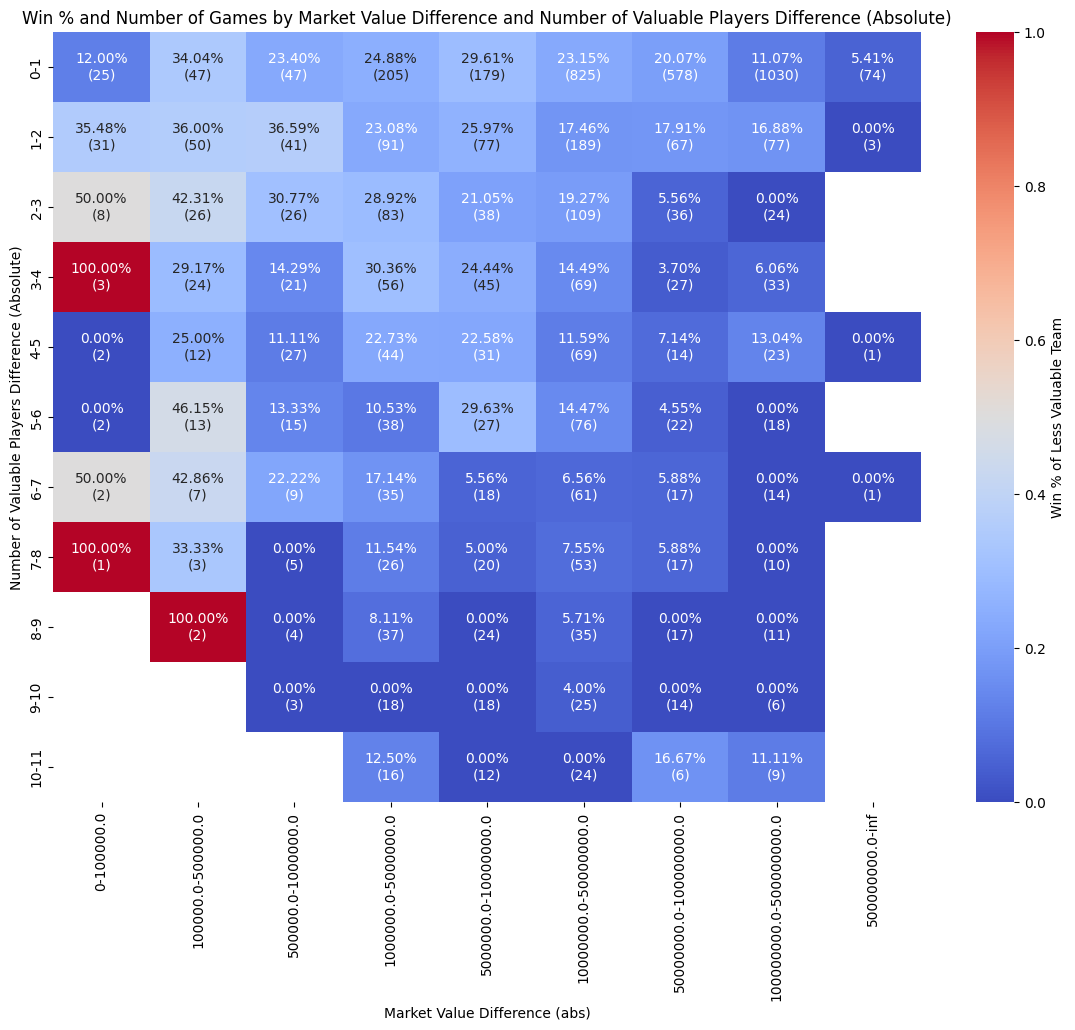

In [165]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Number of Valuable Players Difference (Absolute)')
plt.title('Win % and Number of Games by Market Value Difference and Number of Valuable Players Difference (Absolute)')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/mv_diff_vs_valuable_players_diff_{plot_type}.png') 
plt.show()

### ∆0 Value players vs larger number of 0-value players

In [142]:
plot_type = 'Win rate of team with fewer 0-value players'
# Define the intervals (bins)
valuable_players_difference_abs_intervals = list(range(12))  # From 0 to 11
zero_value_players_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(valuable_players_difference_abs_intervals) - 1):
    valuable_players_lower_bound = valuable_players_difference_abs_intervals[i]
    valuable_players_upper_bound = valuable_players_difference_abs_intervals[i + 1]
    
    valuable_players_filtered_data = latest_match_data[(latest_match_data['Number.of.Valuable.Players.Difference.Absolute'] >= valuable_players_lower_bound) &
                                                       (latest_match_data['Number.of.Valuable.Players.Difference.Absolute'] < valuable_players_upper_bound)]
    
    for j in range(len(zero_value_players_intervals) - 1):
        zero_value_lower_bound = zero_value_players_intervals[j]
        zero_value_upper_bound = zero_value_players_intervals[j + 1]
        
        zero_value_filtered_data = valuable_players_filtered_data[(valuable_players_filtered_data['Smaller Number of 0 Value Players'] >= zero_value_lower_bound) &
                                                                  (valuable_players_filtered_data['Smaller Number of 0 Value Players'] < zero_value_upper_bound)]
        
        # Count the number of rows
        row_count = len(zero_value_filtered_data)
        
        results.append({
            'valuable_players_difference_abs_interval': f"{valuable_players_lower_bound}-{valuable_players_upper_bound}",
            'zero_value_players_interval': f"{zero_value_lower_bound}-{zero_value_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='zero_value_players_interval', columns='valuable_players_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [f"{i}-{i+1}" for i in range(11)]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

valuable_players_difference_abs_interval   0-1  1-2  2-3  3-4  4-5  5-6  6-7  \
zero_value_players_interval                                                    
0-1                                       2889  446  214  162  120  121   96   
1-2                                         42   62   45   42   26   28   24   
2-3                                         13   18   19   22   15   19   13   
3-4                                          8   12    8    9   10    5   10   
4-5                                          5   13   11    9    9   12   10   
5-6                                          6    4   11    7   14   11   11   
6-7                                         11   16    7    7   10   15    0   
7-8                                          7    5   11   10   19    0    0   
8-9                                          2    9    7   10    0    0    0   
9-10                                         5   14   17    0    0    0    0   
10-11                                       10   27    0    0    0    0    0   

valuable_players_difference_abs_interval  7-8  8-9  9-10  10-11  
zero_value_players_interval                                      
0-1                                        80   71    65     50  
1-2                                        21   21     7     17  
2-3                                        10   22    12      0  
3-4                                        12   16     0      0  
4-5                                        12    0     0      0  
5-6                                         0    0     0      0  
6-7                                         0    0     0      0  
7-8                                         0    0     0      0  
8-9                                         0    0     0      0  
9-10                                        0    0     0      0  
10-11                                       0    0     0      0

In [143]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(valuable_players_difference_abs_intervals) - 1):
    valuable_players_lower_bound = valuable_players_difference_abs_intervals[i]
    valuable_players_upper_bound = valuable_players_difference_abs_intervals[i + 1]
    
    valuable_players_filtered_data = latest_match_data[(latest_match_data['Number.of.Valuable.Players.Difference.Absolute'] >= valuable_players_lower_bound) &
                                                       (latest_match_data['Number.of.Valuable.Players.Difference.Absolute'] < valuable_players_upper_bound)]
    
    for j in range(len(zero_value_players_intervals) - 1):
        zero_value_lower_bound = zero_value_players_intervals[j]
        zero_value_upper_bound = zero_value_players_intervals[j + 1]
        
        zero_value_filtered_data = valuable_players_filtered_data[(valuable_players_filtered_data['Smaller Number of 0 Value Players'] >= zero_value_lower_bound) &
                                                                  (valuable_players_filtered_data['Smaller Number of 0 Value Players'] < zero_value_upper_bound)]
        
        if i == j:
            # Use Number_of_valuable_players_prediction_correct values along the diagonal
            prediction_sum = zero_value_filtered_data['Team.1.Wins'].sum()
        else:
            # Use Number_of_valuable_players_prediction_correct values for other cells
            prediction_sum = zero_value_filtered_data['Number_of_valuable_players_prediction_correct'].sum()
        
        results.append({
            'valuable_players_difference_abs_interval': f"{valuable_players_lower_bound}-{valuable_players_upper_bound}",
            'zero_value_players_interval': f"{zero_value_lower_bound}-{zero_value_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='zero_value_players_interval', columns='valuable_players_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

valuable_players_difference_abs_interval   0-1  1-2  2-3  3-4  4-5  5-6  6-7  \
zero_value_players_interval                                                    
0-1                                       1312  248  124  110   85   87   73   
1-2                                          0   27   18   21   12   12   16   
2-3                                          0    5   10   11    5   10    8   
3-4                                          0    6    2    5    6    2    5   
4-5                                          0    3    3    4    4    6    9   
5-6                                          0    2    9    4   10    4   10   
6-7                                          0    4    6    3    8   11    0   
7-8                                          0    2    4    6   16    0    0   
8-9                                          0    3    4    9    0    0    0   
9-10                                         0    8    8    0    0    0    0   
10-11                                        0   13    0    0    0    0    0   

valuable_players_difference_abs_interval  7-8  8-9  9-10  10-11  
zero_value_players_interval                                      
0-1                                        61   60    58     40  
1-2                                        14   17     6     14  
2-3                                         7   11     9      0  
3-4                                         4   14     0      0  
4-5                                        11    0     0      0  
5-6                                         0    0     0      0  
6-7                                         0    0     0      0  
7-8                                         0    0     0      0  
8-9                                         0    0     0      0  
9-10                                        0    0     0      0  
10-11                                       0    0     0      0

In [144]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

valuable_players_difference_abs_interval       0-1       1-2       2-3  \
zero_value_players_interval                                              
0-1                                       0.454136  0.556054  0.579439   
1-2                                       0.000000  0.435484  0.400000   
2-3                                       0.000000  0.277778  0.526316   
3-4                                       0.000000  0.500000  0.250000   
4-5                                       0.000000  0.230769  0.272727   
5-6                                       0.000000  0.500000  0.818182   
6-7                                       0.000000  0.250000  0.857143   
7-8                                       0.000000  0.400000  0.363636   
8-9                                       0.000000  0.333333  0.571429   
9-10                                      0.000000  0.571429  0.470588   
10-11                                     0.000000  0.481481       NaN   

valuable_players_difference_abs_interval       3-4       4-5       5-6  \
zero_value_players_interval                                              
0-1                                       0.679012  0.708333  0.719008   
1-2                                       0.500000  0.461538  0.428571   
2-3                                       0.500000  0.333333  0.526316   
3-4                                       0.555556  0.600000  0.400000   
4-5                                       0.444444  0.444444  0.500000   
5-6                                       0.571429  0.714286  0.363636   
6-7                                       0.428571  0.800000  0.733333   
7-8                                       0.600000  0.842105       NaN   
8-9                                       0.900000       NaN       NaN   
9-10                                           NaN       NaN       NaN   
10-11                                          NaN       NaN       NaN   

valuable_players_difference_abs_interval       6-7       7-8       8-9  \
zero_value_players_interval                                              
0-1                                       0.760417  0.762500  0.845070   
1-2                                       0.666667  0.666667  0.809524   
2-3                                       0.615385  0.700000  0.500000   
3-4                                       0.500000  0.333333  0.875000   
4-5                                       0.900000  0.916667       NaN   
5-6                                       0.909091       NaN       NaN   
6-7                                            NaN       NaN       NaN   
7-8                                            NaN       NaN       NaN   
8-9                                            NaN       NaN       NaN   
9-10                                           NaN       NaN       NaN   
10-11                                          NaN       NaN       NaN   

valuable_players_difference_abs_interval      9-10     10-11  
zero_value_players_interval                                   
0-1                                       0.892308  0.800000  
1-2                                       0.857143  0.823529  
2-3                                       0.750000       NaN  
3-4                                            NaN       NaN  
4-5                                            NaN       NaN  
5-6                                            NaN       NaN  
6-7                                            NaN       NaN  
7-8                                            NaN       NaN  
8-9                                            NaN       NaN  
9-10                                           NaN       NaN  
10-11                                          NaN       NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1890292689.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '45.41%
(2889)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1890292689.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '55.61%
(446)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_85532/1890292689.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future e

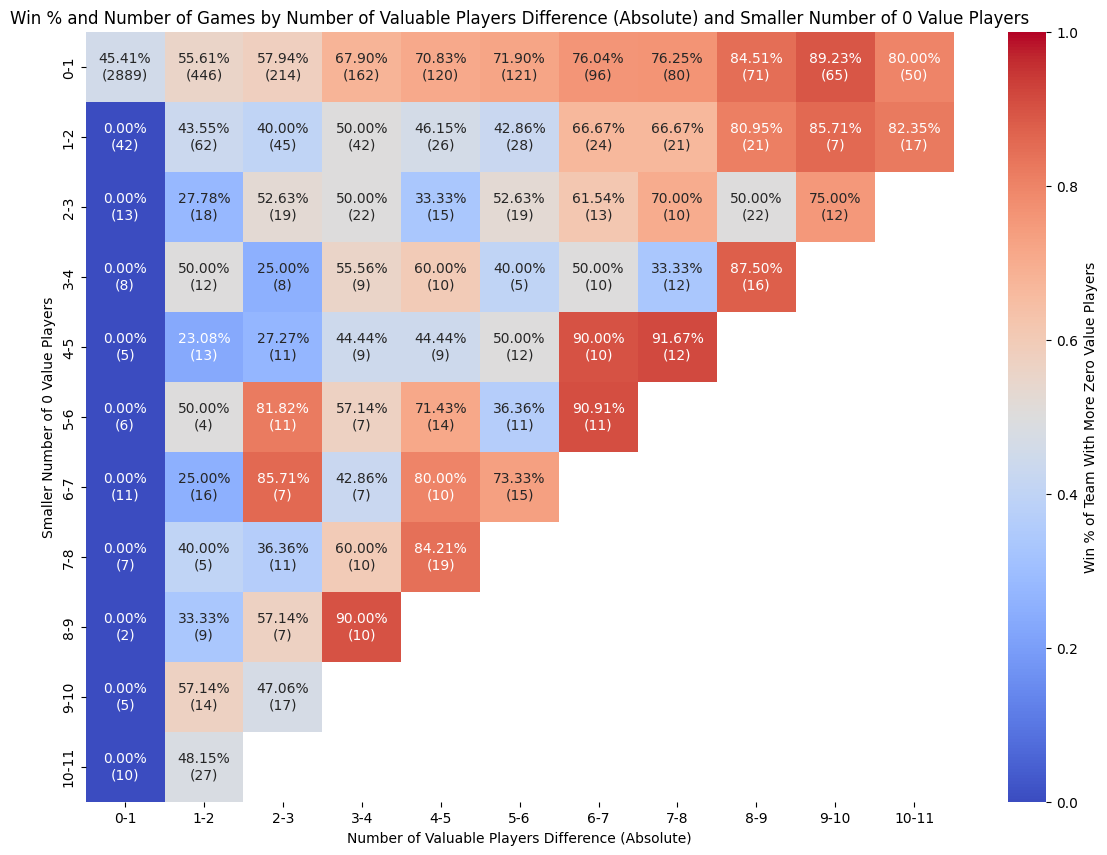

In [145]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Team With More Zero Value Players'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Number of Valuable Players Difference (Absolute)')
plt.ylabel('Smaller Number of 0 Value Players')
plt.title('Win % and Number of Games by Number of Valuable Players Difference (Absolute) and Smaller Number of 0 Value Players')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/zero_value_players_diff_vs_smaller_number_0_value_players_{plot_type}.png') 
plt.show()

### Team 1 0-value players vs Team 2 0-value players (DONE)

In [143]:
plot_type = 'Rank ≤15, Win rate of team with more 0-value players' #'0-value players chart, away wins'
#latest_match_data = latest_match_data[(latest_match_data['Competition'] != 'Euros') & (latest_match_data['Competition'] != 'World Cup') & (latest_match_data['Competition'] != 'Copa America') & (latest_match_data['Competition'] != 'Gold Cup') & (latest_match_data['Competition'] != 'Olympics') & (latest_match_data['Competition'] != 'World Cup Qualifiers, UEFA') & (latest_match_data['Competition'] != 'World Cup Intercontinental Playoffs') & (latest_match_data['Competition'] != 'Africa Cup of Nations')]
#latest_match_data = latest_match_data[(latest_match_data['Competition'] == 'Euros') | (latest_match_data['Competition'] == 'World Cup') | (latest_match_data['Competition'] == 'Copa America') | (latest_match_data['Competition'] == 'Gold Cup') | (latest_match_data['Competition'] == 'Olympics') | (latest_match_data['Competition'] == 'World Cup Qualifiers, UEFA') | (latest_match_data['Competition'] == 'World Cup Intercontinental Playoffs') | (latest_match_data['Competition'] == 'Africa Cup of Nations')]


# Define the intervals (bins)
zero_value_players_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(zero_value_players_intervals) - 1):
    team1_lower_bound = zero_value_players_intervals[i]
    team1_upper_bound = zero_value_players_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team.1.Num.of.0.Value.Players'] >= team1_lower_bound) &
                                            (latest_match_data['Team.1.Num.of.0.Value.Players'] < team1_upper_bound)]
    
    for j in range(len(zero_value_players_intervals) - 1):
        team2_lower_bound = zero_value_players_intervals[j]
        team2_upper_bound = zero_value_players_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team.2.Num.of.0.Value.Players'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team.2.Num.of.0.Value.Players'] < team2_upper_bound)]
        
        # Count the number of rows
        row_count = len(team2_filtered_data)
        
        results.append({
            'team1_zero_value_players_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_zero_value_players_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='team2_zero_value_players_interval', columns='team1_zero_value_players_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [f"{i}-{i+1}" for i in range(11)]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

team1_zero_value_players_interval  0-1  1-2  2-3  3-4  4-5  5-6  6-7  7-8  \
team2_zero_value_players_interval                                           
0-1                                771   40   12    9    2    4    3    1   
1-2                                 41    9    7    3    3    3    4    3   
2-3                                 13    7    3    3    1    1    2    1   
3-4                                  8    7    4    2    1    1    0    1   
4-5                                  4    5    3    0    0    2    0    2   
5-6                                  5    1    7    3    2    1    0    2   
6-7                                  3    2    0    1    0    1    2    2   
7-8                                  3    3    3    2    0    2    3    2   
8-9                                  1    1    0    0    1    2    1    0   
9-10                                 0    2    0    0    1    1    1    2   
10-11                                1    0    2    1    0    1    0    0   

team1_zero_value_players_interval  8-9  9-10  10-11  
team2_zero_value_players_interval                    
0-1                                  0     1      1  
1-2                                  0     4      0  
2-3                                  0     2      3  
3-4                                  0     0      0  
4-5                                  2     0      0  
5-6                                  0     0      1  
6-7                                  2     0      0  
7-8                                  0     1      0  
8-9                                  0     2      1  
9-10                                 1     1      2  
10-11                                0     4      3

In [144]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(zero_value_players_intervals) - 1):
    team1_lower_bound = zero_value_players_intervals[i]
    team1_upper_bound = zero_value_players_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team.1.Num.of.0.Value.Players'] >= team1_lower_bound) &
                                            (latest_match_data['Team.1.Num.of.0.Value.Players'] < team1_upper_bound)]
    
    for j in range(len(zero_value_players_intervals) - 1):
        team2_lower_bound = zero_value_players_intervals[j]
        team2_upper_bound = zero_value_players_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team.2.Num.of.0.Value.Players'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team.2.Num.of.0.Value.Players'] < team2_upper_bound)]
        
        if i == j:
            # Use Number_of_valuable_players_prediction_correct values along the diagonal
            prediction_sum = team2_filtered_data['Number_of_valuable_players_prediction_correct_inverse'].sum()
        else:
            # Use Number_of_valuable_players_prediction_correct values for other cells
            prediction_sum = team2_filtered_data['Number_of_valuable_players_prediction_correct_inverse'].sum()
        
        results.append({
            'team1_zero_value_players_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_zero_value_players_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='team2_zero_value_players_interval', columns='team1_zero_value_players_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

team1_zero_value_players_interval  0-1  1-2  2-3  3-4  4-5  5-6  6-7  7-8  \
team2_zero_value_players_interval                                           
0-1                                  0   12    3    5    0    1    1    0   
1-2                                  6    0    1    1    0    1    1    1   
2-3                                  3    2    0    1    0    0    1    1   
3-4                                  0    2    0    0    0    0    0    0   
4-5                                  0    1    0    0    0    1    0    1   
5-6                                  0    0    2    1    1    0    0    0   
6-7                                  0    0    0    0    0    0    0    2   
7-8                                  0    0    0    1    0    0    2    0   
8-9                                  0    0    0    0    0    0    0    0   
9-10                                 0    0    0    0    0    0    0    1   
10-11                                0    0    0    1    0    0    0    0   

team1_zero_value_players_interval  8-9  9-10  10-11  
team2_zero_value_players_interval                    
0-1                                  0     0      0  
1-2                                  0     2      0  
2-3                                  0     0      0  
3-4                                  0     0      0  
4-5                                  1     0      0  
5-6                                  0     0      0  
6-7                                  0     0      0  
7-8                                  0     1      0  
8-9                                  0     1      1  
9-10                                 0     0      0  
10-11                                0     1      0

In [145]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

team1_zero_value_players_interval       0-1       1-2       2-3       3-4  \
team2_zero_value_players_interval                                           
0-1                                0.000000  0.300000  0.250000  0.555556   
1-2                                0.146341  0.000000  0.142857  0.333333   
2-3                                0.230769  0.285714  0.000000  0.333333   
3-4                                0.000000  0.285714  0.000000  0.000000   
4-5                                0.000000  0.200000  0.000000       NaN   
5-6                                0.000000  0.000000  0.285714  0.333333   
6-7                                0.000000  0.000000       NaN  0.000000   
7-8                                0.000000  0.000000  0.000000  0.500000   
8-9                                0.000000  0.000000       NaN       NaN   
9-10                                    NaN  0.000000       NaN       NaN   
10-11                              0.000000       NaN  0.000000  1.000000   

team1_zero_value_players_interval  4-5       5-6       6-7       7-8  8-9  \
team2_zero_value_players_interval                                           
0-1                                0.0  0.250000  0.333333  0.000000  NaN   
1-2                                0.0  0.333333  0.250000  0.333333  NaN   
2-3                                0.0  0.000000  0.500000  1.000000  NaN   
3-4                                0.0  0.000000       NaN  0.000000  NaN   
4-5                                NaN  0.500000       NaN  0.500000  0.5   
5-6                                0.5  0.000000       NaN  0.000000  NaN   
6-7                                NaN  0.000000  0.000000  1.000000  0.0   
7-8                                NaN  0.000000  0.666667  0.000000  NaN   
8-9                                0.0  0.000000  0.000000       NaN  NaN   
9-10                               0.0  0.000000  0.000000  0.500000  0.0   
10-11                              NaN  0.000000       NaN       NaN  NaN   

team1_zero_value_players_interval  9-10  10-11  
team2_zero_value_players_interval               
0-1                                0.00    0.0  
1-2                                0.50    NaN  
2-3                                0.00    0.0  
3-4                                 NaN    NaN  
4-5                                 NaN    NaN  
5-6                                 NaN    0.0  
6-7                                 NaN    NaN  
7-8                                1.00    NaN  
8-9                                0.50    1.0  
9-10                               0.00    0.0  
10-11                              0.25    0.0

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/4099590877.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(771)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/4099590877.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.00%
(40)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/4099590877.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

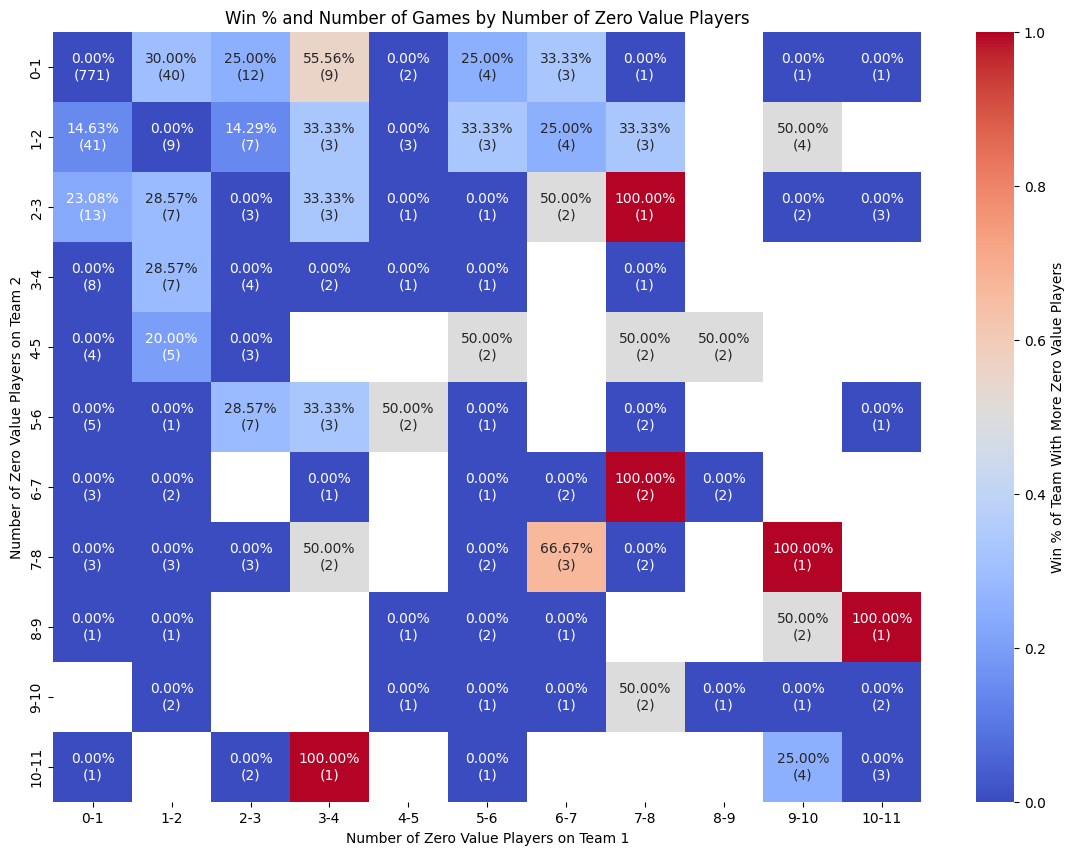

In [146]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Team With More Zero Value Players'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Number of Zero Value Players on Team 1')
plt.ylabel('Number of Zero Value Players on Team 2')
plt.title('Win % and Number of Games by Number of Zero Value Players')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/num_zero_value_players_each_team_{plot_type}.png') 
plt.show()

### Double sided MV differencs vs number of bums

In [370]:
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
valuable_players_difference_intervals = list(range(-11, 12))  # From -11 to +11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(valuable_players_difference_intervals) - 1):
        vp_lower_bound = valuable_players_difference_intervals[j]
        vp_upper_bound = valuable_players_difference_intervals[j + 1]
        
        vp_filtered_data = mv_filtered_data[(mv_filtered_data['Number.of.Valuable.Players.Difference'] >= vp_lower_bound) &
                                            (mv_filtered_data['Number.of.Valuable.Players.Difference'] < vp_upper_bound)]
        
        # Count the number of rows
        row_count = len(vp_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'valuable_players_difference_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='valuable_players_difference_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(10, -12, -1)]  # From 11 to -11
new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval            0-100000.0  100000.0-500000.0  \
valuable_players_difference_interval                                  
10-11                                          0                  0   
9-10                                           0                  0   
8-9                                            0                  0   
7-8                                            0                  2   
6-7                                            1                  5   
5-6                                            1                  6   
4-5                                            2                  4   
3-4                                            0                 12   
2-3                                            2                 12   
1-2                                           12                 23   
0-1                                           25                 47   
-1-0                                          19                 27   
-2--1                                          6                 14   
-3--2                                          3                 12   
-4--3                                          0                  8   
-5--4                                          1                  7   
-6--5                                          1                  2   
-7--6                                          1                  1   
-8--7                                          0                  2   
-9--8                                          0                  0   
-10--9                                         0                  0   
-11--10                                        0                  0   

mv_difference_abs_interval            500000.0-1000000.0  1000000.0-5000000.0  \
valuable_players_difference_interval                                            
10-11                                                  0                    8   
9-10                                                   1                   10   
8-9                                                    2                   18   
7-8                                                    3                   12   
6-7                                                    4                   18   
5-6                                                    8                   20   
4-5                                                   14                   21   
3-4                                                   12                   32   
2-3                                                   10                   45   
1-2                                                   25                   45   
0-1                                                   47                  205   
-1-0                                                  16                   46   
-2--1                                                 16                   38   
-3--2                                                  9                   24   
-4--3                                                 13                   23   
-5--4                                                  7                   18   
-6--5                                                  5                   17   
-7--6                                                  2                   14   
-8--7                                                  2                   19   
-9--8                                                  2                    8   
-10--9                                                 0                    8   
-11--10                                                0                    3   

mv_difference_abs_interval            5000000.0-10000000.0  \
valuable_players_difference_interval                         
10-11                                                    7   
9-10                                                     8   
8-9                                                     13   
7-8                                     

In [374]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(valuable_players_difference_intervals) - 1):
        vp_lower_bound = valuable_players_difference_intervals[j]
        vp_upper_bound = valuable_players_difference_intervals[j + 1]
        
        vp_filtered_data = mv_filtered_data[(mv_filtered_data['Number.of.Valuable.Players.Difference'] >= vp_lower_bound) &
                                            (mv_filtered_data['Number.of.Valuable.Players.Difference'] < vp_upper_bound)]
        
        if vp_lower_bound == 0:
            # Use MV_Prediction_Correct values when Number.of.Valuable.Players.Difference is 0
            prediction_sum = vp_filtered_data['MV_Prediction_Correct'].sum()
        elif vp_lower_bound > 0:
            # Use Number_of_valuable_players_prediction_correct values for positive differences
            prediction_sum = vp_filtered_data['Number_of_valuable_players_prediction_correct'].sum()
        else:
            # Use Number_of_valuable_players_prediction_correct_inverse values for negative differences
            prediction_sum = vp_filtered_data['Number_of_valuable_players_prediction_correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'valuable_players_difference_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='valuable_players_difference_interval', columns='mv_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval            0-100000.0  100000.0-500000.0  \
valuable_players_difference_interval                                  
10-11                                          0                  0   
9-10                                           0                  0   
8-9                                            0                  0   
7-8                                            0                  1   
6-7                                            1                  4   
5-6                                            1                  3   
4-5                                            2                  2   
3-4                                            0                  7   
2-3                                            2                  8   
1-2                                            8                  9   
0-1                                            4                 19   
-1-0                                           8                 10   
-2--1                                          4                  9   
-3--2                                          3                  5   
-4--3                                          0                  3   
-5--4                                          0                  5   
-6--5                                          1                  2   
-7--6                                          1                  0   
-8--7                                          0                  2   
-9--8                                          0                  0   
-10--9                                         0                  0   
-11--10                                        0                  0   

mv_difference_abs_interval            500000.0-1000000.0  1000000.0-5000000.0  \
valuable_players_difference_interval                                            
10-11                                                  0                    7   
9-10                                                   1                    8   
8-9                                                    2                   13   
7-8                                                    2                   11   
6-7                                                    4                   14   
5-6                                                    7                   14   
4-5                                                    9                   16   
3-4                                                    8                   22   
2-3                                                    4                   31   
1-2                                                   12                   26   
0-1                                                   25                  102   
-1-0                                                   9                   15   
-2--1                                                  5                   16   
-3--2                                                  2                   12   
-4--3                                                  1                    7   
-5--4                                                  1                    4   
-6--5                                                  2                    5   
-7--6                                                  0                    3   
-8--7                                                  0                    2   
-9--8                                                  0                    0   
-10--9                                                 0                    1   
-11--10                                                0                    1   

mv_difference_abs_interval            5000000.0-10000000.0  \
valuable_players_difference_interval                         
10-11                                                    7   
9-10                                                     8   
8-9                                                     12   
7-8                                     

In [375]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval            0-100000.0  100000.0-500000.0  \
valuable_players_difference_interval                                  
10-11                                        NaN                NaN   
9-10                                         NaN                NaN   
8-9                                          NaN                NaN   
7-8                                          NaN           0.500000   
6-7                                     1.000000           0.800000   
5-6                                     1.000000           0.500000   
4-5                                     1.000000           0.500000   
3-4                                          NaN           0.583333   
2-3                                     1.000000           0.666667   
1-2                                     0.666667           0.391304   
0-1                                     0.160000           0.404255   
-1-0                                    0.421053           0.370370   
-2--1                                   0.666667           0.642857   
-3--2                                   1.000000           0.416667   
-4--3                                        NaN           0.375000   
-5--4                                   0.000000           0.714286   
-6--5                                   1.000000           1.000000   
-7--6                                   1.000000           0.000000   
-8--7                                        NaN           1.000000   
-9--8                                        NaN                NaN   
-10--9                                       NaN                NaN   
-11--10                                      NaN                NaN   

mv_difference_abs_interval            500000.0-1000000.0  1000000.0-5000000.0  \
valuable_players_difference_interval                                            
10-11                                                NaN             0.875000   
9-10                                            1.000000             0.800000   
8-9                                             1.000000             0.722222   
7-8                                             0.666667             0.916667   
6-7                                             1.000000             0.777778   
5-6                                             0.875000             0.700000   
4-5                                             0.642857             0.761905   
3-4                                             0.666667             0.687500   
2-3                                             0.400000             0.688889   
1-2                                             0.480000             0.577778   
0-1                                             0.531915             0.497561   
-1-0                                            0.562500             0.326087   
-2--1                                           0.312500             0.421053   
-3--2                                           0.222222             0.500000   
-4--3                                           0.076923             0.304348   
-5--4                                           0.142857             0.222222   
-6--5                                           0.400000             0.294118   
-7--6                                           0.000000             0.214286   
-8--7                                           0.000000             0.105263   
-9--8                                           0.000000             0.000000   
-10--9                                               NaN             0.125000   
-11--10                                              NaN             0.333333   

mv_difference_abs_interval            5000000.0-10000000.0  \
valuable_players_difference_interval                         
10-11                                             1.000000   
9-10                                              1.000000   
8-9                                               0.923077   
7-8                                     

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3407960855.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3407960855.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '87.50%
(8)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3407960855.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

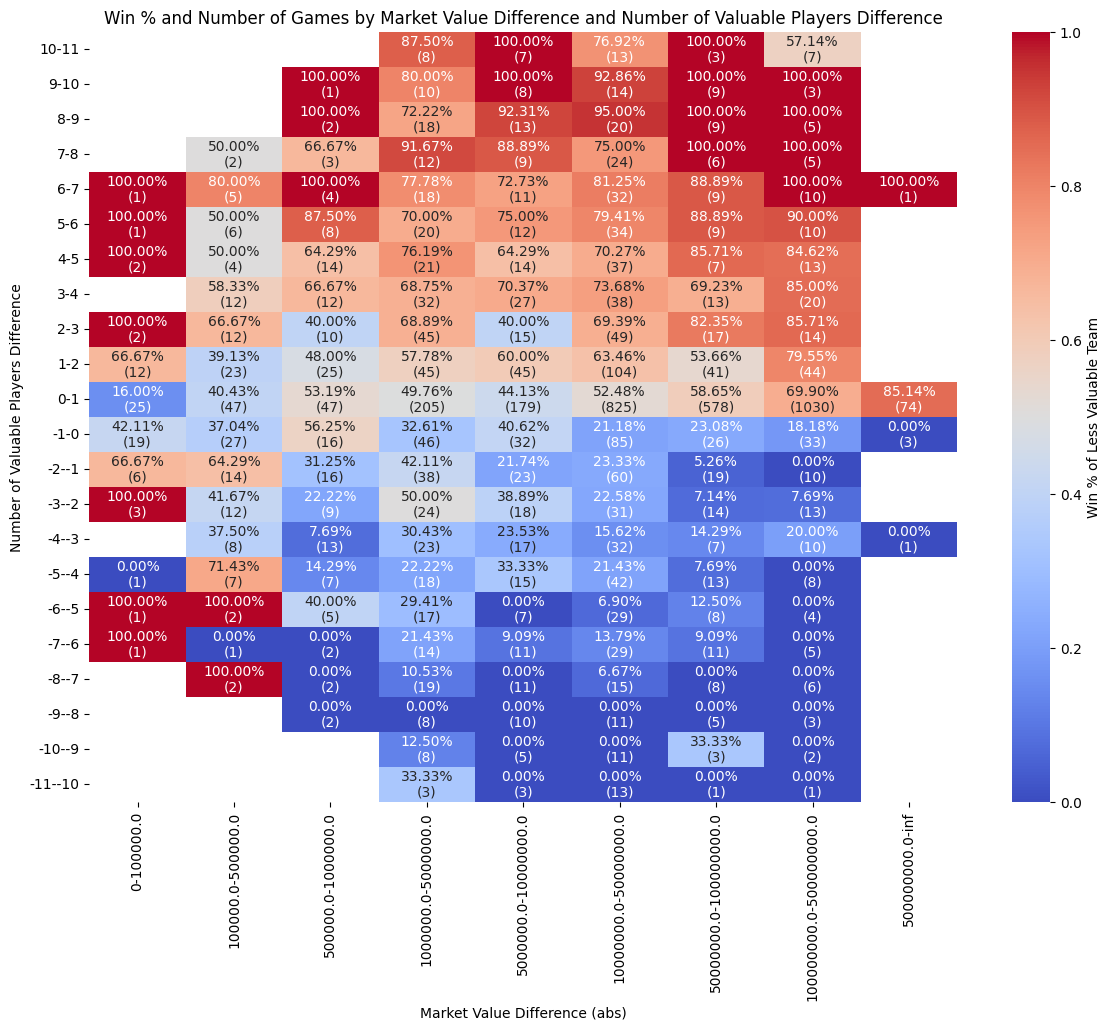

In [376]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Number of Valuable Players Difference')
plt.title('Win % and Number of Games by Market Value Difference and Number of Valuable Players Difference')
plt.show()

### Double sided rank difference vs number of bums


In [366]:
# Define the intervals (bins)
ranking_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
valuable_players_difference_intervals = list(range(-11, 12))  # From -11 to +11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(ranking_difference_abs_intervals) - 1):
    rank_lower_bound = ranking_difference_abs_intervals[i]
    rank_upper_bound = ranking_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(valuable_players_difference_intervals) - 1):
        vp_lower_bound = valuable_players_difference_intervals[j]
        vp_upper_bound = valuable_players_difference_intervals[j + 1]
        
        vp_filtered_data = rank_filtered_data[(rank_filtered_data['Number.of.Valuable.Players.Difference'] >= vp_lower_bound) &
                                              (rank_filtered_data['Number.of.Valuable.Players.Difference'] < vp_upper_bound)]
        
        # Count the number of rows
        row_count = len(vp_filtered_data)
        
        results.append({
            'ranking_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'valuable_players_difference_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='valuable_players_difference_interval', columns='ranking_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(10, -12, -1)]  # From 11 to -11
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

ranking_difference_abs_interval       0-5  5-10  10-15  15-30  30-60  60-90  \
valuable_players_difference_interval                                          
10-11                                   0     1      0      5      6      9   
9-10                                    2     0      0      2     15      6   
8-9                                     1     3      1      9     10     18   
7-8                                     2     2      0      7     18     16   
6-7                                     0     3      3      9     26     25   
5-6                                     5     5      5     23     25     18   
4-5                                     3     4      3     21     42     25   
3-4                                     8     6      6     32     47     34   
2-3                                     9     7     13     34     57     24   
1-2                                    19    23     24     61    111     61   
0-1                                   232   258    274    641    823    433   
-1-0                                   14    28     18     58     83     49   
-2--1                                   6    10      7     51     55     31   
-3--2                                   6     2      9     23     38     31   
-4--3                                   2     3      4     22     37     15   
-5--4                                   4     2      6     10     41     27   
-6--5                                   1     2      4      9     22     20   
-7--6                                   3     2      0      7     19     21   
-8--7                                   1     3      4      2     13     14   
-9--8                                   1     0      1      3      8      7   
-10--9                                  1     0      0      5      5      7   
-11--10                                 0     0      1      1      2      4   

ranking_difference_abs_interval       90-120  120-150  150-inf  
valuable_players_difference_interval                            
10-11                                     11        2        4  
9-10                                       9        3        8  
8-9                                       11        6        8  
7-8                                       11        3        2  
6-7                                       14        7        4  
5-6                                       10        5        4  
4-5                                        6        4        4  
3-4                                        9        8        4  
2-3                                       14        4        2  
1-2                                       21       11        8  
0-1                                      212       91       46  
-1-0                                      21       11        5  
-2--1                                     13        9        4  
-3--2                                      7        6        2  
-4--3                                     18        5        5  
-5--4                                     13        2        6  
-6--5                                      9        5        1  
-7--6                                     13        5        4  
-8--7                                      9        8        9  
-9--8                                     11        4        4  
-10--9                                     5        3        3  
-11--10                                    7        5        1

In [367]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(ranking_difference_abs_intervals) - 1):
    rank_lower_bound = ranking_difference_abs_intervals[i]
    rank_upper_bound = ranking_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(valuable_players_difference_intervals) - 1):
        vp_lower_bound = valuable_players_difference_intervals[j]
        vp_upper_bound = valuable_players_difference_intervals[j + 1]
        
        vp_filtered_data = rank_filtered_data[(rank_filtered_data['Number.of.Valuable.Players.Difference'] >= vp_lower_bound) &
                                              (rank_filtered_data['Number.of.Valuable.Players.Difference'] < vp_upper_bound)]
        
        if vp_lower_bound == 0:
            # Use MV_Prediction_Correct values when Number.of.Valuable.Players.Difference is 0
            prediction_sum = vp_filtered_data['rank_prediction_correct'].sum()
        elif vp_lower_bound > 0:
            # Use Global_Superstar_difference_prediction_correct values for positive differences
            prediction_sum = vp_filtered_data['Number_of_valuable_players_prediction_correct'].sum()
        else:
            # Use Global_Superstar_difference_prediction_correct_inverse values for negative differences
            prediction_sum = vp_filtered_data['Number_of_valuable_players_prediction_correct_inverse'].sum()
        
        results.append({
            'ranking_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'valuable_players_difference_interval': f"{vp_lower_bound}-{vp_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='valuable_players_difference_interval', columns='ranking_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

ranking_difference_abs_interval       0-5  5-10  10-15  15-30  30-60  60-90  \
valuable_players_difference_interval                                          
10-11                                   0     1      0      4      5      8   
9-10                                    1     0      0      2     13      6   
8-9                                     1     2      1      6     10     16   
7-8                                     1     1      0      6     14     13   
6-7                                     0     2      1      7     22     21   
5-6                                     5     5      3     17     15     16   
4-5                                     2     3      1     17     28     18   
3-4                                     5     2      4     19     36     26   
2-3                                     3     6      4     21     39     21   
1-2                                     7    14     11     36     67     36   
0-1                                   115   120    125    330    486    294   
-1-0                                    6     9      8     20     27      9   
-2--1                                   4     4      0     18     17     10   
-3--2                                   1     2      5      5     13     10   
-4--3                                   0     1      2      6      7      3   
-5--4                                   2     0      1      3     10      3   
-6--5                                   1     1      1      3      4      3   
-7--6                                   0     0      0      2      4      4   
-8--7                                   0     1      1      0      2      0   
-9--8                                   0     0      0      0      0      0   
-10--9                                  0     0      0      1      0      0   
-11--10                                 0     0      1      0      0      0   

ranking_difference_abs_interval       90-120  120-150  150-inf  
valuable_players_difference_interval                            
10-11                                      8        1        4  
9-10                                       9        3        8  
8-9                                       10        6        8  
7-8                                       11        3        2  
6-7                                       12        7        4  
5-6                                        8        5        4  
4-5                                        4        4        4  
3-4                                        7        7        4  
2-3                                       11        4        2  
1-2                                       17       10        7  
0-1                                      172       81       46  
-1-0                                       5        1        0  
-2--1                                      0        1        0  
-3--2                                      1        1        0  
-4--3                                      3        0        1  
-5--4                                      5        1        0  
-6--5                                      0        0        0  
-7--6                                      0        0        0  
-8--7                                      1        0        0  
-9--8                                      0        0        0  
-10--9                                     1        0        0  
-11--10                                    0        0        0

In [368]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

ranking_difference_abs_interval            0-5      5-10     10-15     15-30  \
valuable_players_difference_interval                                           
10-11                                      NaN  1.000000       NaN  0.800000   
9-10                                  0.500000       NaN       NaN  1.000000   
8-9                                   1.000000  0.666667  1.000000  0.666667   
7-8                                   0.500000  0.500000       NaN  0.857143   
6-7                                        NaN  0.666667  0.333333  0.777778   
5-6                                   1.000000  1.000000  0.600000  0.739130   
4-5                                   0.666667  0.750000  0.333333  0.809524   
3-4                                   0.625000  0.333333  0.666667  0.593750   
2-3                                   0.333333  0.857143  0.307692  0.617647   
1-2                                   0.368421  0.608696  0.458333  0.590164   
0-1                                   0.495690  0.465116  0.456204  0.514821   
-1-0                                  0.428571  0.321429  0.444444  0.344828   
-2--1                                 0.666667  0.400000  0.000000  0.352941   
-3--2                                 0.166667  1.000000  0.555556  0.217391   
-4--3                                 0.000000  0.333333  0.500000  0.272727   
-5--4                                 0.500000  0.000000  0.166667  0.300000   
-6--5                                 1.000000  0.500000  0.250000  0.333333   
-7--6                                 0.000000  0.000000       NaN  0.285714   
-8--7                                 0.000000  0.333333  0.250000  0.000000   
-9--8                                 0.000000       NaN  0.000000  0.000000   
-10--9                                0.000000       NaN       NaN  0.200000   
-11--10                                    NaN       NaN  1.000000  0.000000   

ranking_difference_abs_interval          30-60     60-90    90-120   120-150  \
valuable_players_difference_interval                                           
10-11                                 0.833333  0.888889  0.727273  0.500000   
9-10                                  0.866667  1.000000  1.000000  1.000000   
8-9                                   1.000000  0.888889  0.909091  1.000000   
7-8                                   0.777778  0.812500  1.000000  1.000000   
6-7                                   0.846154  0.840000  0.857143  1.000000   
5-6                                   0.600000  0.888889  0.800000  1.000000   
4-5                                   0.666667  0.720000  0.666667  1.000000   
3-4                                   0.765957  0.764706  0.777778  0.875000   
2-3                                   0.684211  0.875000  0.785714  1.000000   
1-2                                   0.603604  0.590164  0.809524  0.909091   
0-1                                   0.590522  0.678984  0.811321  0.890110   
-1-0                                  0.325301  0.183673  0.238095  0.090909   
-2--1                                 0.309091  0.322581  0.000000  0.111111   
-3--2                                 0.342105  0.322581  0.142857  0.166667   
-4--3                                 0.189189  0.200000  0.166667  0.000000   
-5--4                                 0.243902  0.111111  0.384615  0.500000   
-6--5                                 0.181818  0.150000  0.000000  0.000000   
-7--6                                 0.210526  0.190476  0.000000  0.000000   
-8--7                                 0.153846  0.000000  0.111111  0.000000   
-9--8                                 0.000000  0.000000  0.000000  0.000000   
-10--9                                0.000000  0.000000  0.200000  0.000000   
-11--10                               0.000000  0.000000  0.000000  0.000000   

ranking_difference_abs_interval       150-inf  
valuable_players_difference_interval           
10-11                                   1.000  
9-10          

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3490233259.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3490233259.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3490233259.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

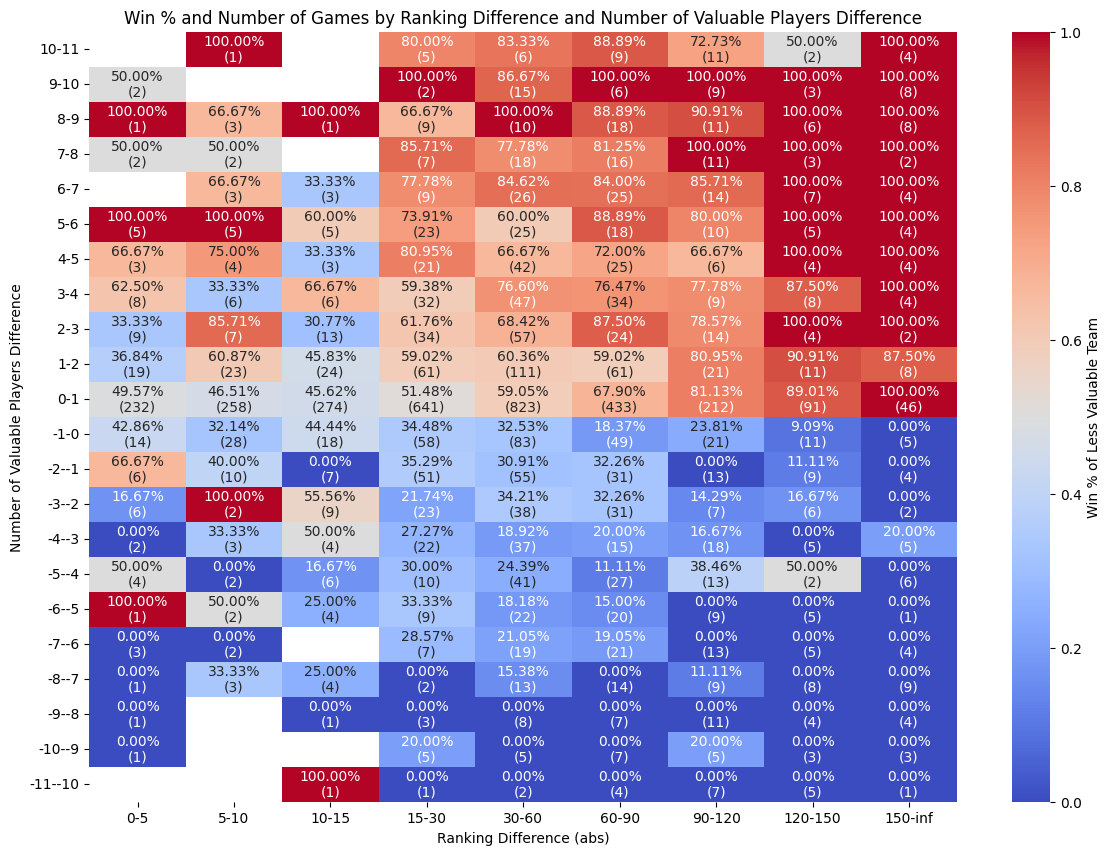

In [369]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Ranking Difference (abs)')
plt.ylabel('Number of Valuable Players Difference')
plt.title('Win % and Number of Games by Ranking Difference and Number of Valuable Players Difference')
plt.show()

### Double sided rank difference vs Global superstar difference

In [344]:
# Define the intervals (bins)
ranking_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
global_superstar_difference_intervals = list(range(-11, 12))  # From -11 to +11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(ranking_difference_abs_intervals) - 1):
    rank_lower_bound = ranking_difference_abs_intervals[i]
    rank_upper_bound = ranking_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(global_superstar_difference_intervals) - 1):
        gs_lower_bound = global_superstar_difference_intervals[j]
        gs_upper_bound = global_superstar_difference_intervals[j + 1]
        
        gs_filtered_data = rank_filtered_data[(rank_filtered_data['Global_Superstar_difference'] >= gs_lower_bound) &
                                              (rank_filtered_data['Global_Superstar_difference'] < gs_upper_bound)]
        
        # Count the number of rows
        row_count = len(gs_filtered_data)
        
        results.append({
            'ranking_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'global_superstar_difference_interval': f"{gs_lower_bound}-{gs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='global_superstar_difference_interval', columns='ranking_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(10, -12, -1)]  # From 11 to -11
new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

ranking_difference_abs_interval       0-5  5-10  10-15  15-30  30-60  60-90  \
global_superstar_difference_interval                                          
10-11                                   0     0      1      1      3      2   
9-10                                    2     0      0      8     11      4   
8-9                                     1     3      3     15     16      6   
7-8                                     3     3      7     10     13     12   
6-7                                     2     4      6     14     16     11   
5-6                                     9    14      8     17     17      7   
4-5                                    11     9      7     11     26      8   
3-4                                     9    12      7     21     28     15   
2-3                                    16    16     24     49     47     48   
1-2                                    26    33     47     80    128     92   
0-1                                   165   162    192    617    926    520   
-1-0                                   36    50     40     83    116     83   
-2--1                                  18    20     12     33     46     35   
-3--2                                   9    11      5     16     27     13   
-4--3                                   5    10      5     15     17      9   
-5--4                                   4     4      3     16     11      9   
-6--5                                   3     6      8      4     14      3   
-7--6                                   0     6      3     10     13      4   
-8--7                                   1     0      3      9     13     11   
-9--8                                   0     0      2      7     10      6   
-10--9                                  0     1      2      0      1      2   
-11--10                                 0     0      0      0      1      0   

ranking_difference_abs_interval       90-120  120-150  150-inf  
global_superstar_difference_interval                            
10-11                                      2        0        1  
9-10                                       2        2        3  
8-9                                        2        3        3  
7-8                                        3        2        6  
6-7                                        4        0        4  
5-6                                        5        1        3  
4-5                                        6        3        3  
3-4                                       12        5        2  
2-3                                       17       13       11  
1-2                                       46       27       15  
0-1                                      259      107       38  
-1-0                                      48       22       14  
-2--1                                     19       11       10  
-3--2                                     12        4        4  
-4--3                                      4        3        2  
-5--4                                      4        0        4  
-6--5                                      1        0        4  
-7--6                                      4        2        4  
-8--7                                      4        2        4  
-9--8                                      1        3        2  
-10--9                                     1        1        2  
-11--10                                    1        1        0

In [348]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(ranking_difference_abs_intervals) - 1):
    rank_lower_bound = ranking_difference_abs_intervals[i]
    rank_upper_bound = ranking_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(global_superstar_difference_intervals) - 1):
        gs_lower_bound = global_superstar_difference_intervals[j]
        gs_upper_bound = global_superstar_difference_intervals[j + 1]
        
        gs_filtered_data = rank_filtered_data[(rank_filtered_data['Global_Superstar_difference'] >= gs_lower_bound) &
                                              (rank_filtered_data['Global_Superstar_difference'] < gs_upper_bound)]
        
        if gs_lower_bound == 0:
            # Use MV_Prediction_Correct values when Global_Superstar_difference is 0
            prediction_sum = gs_filtered_data['rank_prediction_correct'].sum()
        elif gs_lower_bound > 0:
            # Use Global_Superstar_difference_prediction_correct values for positive differences
            prediction_sum = gs_filtered_data['Global_Superstar_difference_prediction_correct'].sum()
        else:
            # Use Global_Superstar_difference_prediction_correct_inverse values for negative differences
            prediction_sum = gs_filtered_data['Global_Superstar_difference_prediction_correct_inverse'].sum()
        
        results.append({
            'ranking_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'global_superstar_difference_interval': f"{gs_lower_bound}-{gs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='global_superstar_difference_interval', columns='ranking_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

ranking_difference_abs_interval       0-5  5-10  10-15  15-30  30-60  60-90  \
global_superstar_difference_interval                                          
10-11                                   0     0      0      1      2      1   
9-10                                    1     0      0      5      8      4   
8-9                                     1     3      1     11     11      6   
7-8                                     2     3      4     10     12      9   
6-7                                     2     4      2     11     13      8   
5-6                                     7    11      4     13     11      5   
4-5                                     3     8      4     10     19      7   
3-4                                     3    10      3     13     23     14   
2-3                                     7     6     13     24     27     38   
1-2                                    15    16     24     50     82     68   
0-1                                    73    66     88    292    529    343   
-1-0                                   14    22     13     37     24      6   
-2--1                                   4     4      2     10      8      2   
-3--2                                   2     2      1      3      8      2   
-4--3                                   2     4      0      2      5      1   
-5--4                                   1     1      0      3      2      1   
-6--5                                   1     1      2      1      1      0   
-7--6                                   0     3      1      3      2      0   
-8--7                                   0     0      0      0      2      0   
-9--8                                   0     0      0      1      1      0   
-10--9                                  0     0      0      0      1      0   
-11--10                                 0     0      0      0      0      0   

ranking_difference_abs_interval       90-120  120-150  150-inf  
global_superstar_difference_interval                            
10-11                                      2        0        1  
9-10                                       2        2        3  
8-9                                        2        2        3  
7-8                                        3        2        6  
6-7                                        4        0        4  
5-6                                        3        1        3  
4-5                                        5        3        3  
3-4                                       12        4        2  
2-3                                       15       13       11  
1-2                                       37       22       14  
0-1                                      204       93       37  
-1-0                                       3        0        0  
-2--1                                      0        0        0  
-3--2                                      2        0        0  
-4--3                                      0        0        0  
-5--4                                      0        0        0  
-6--5                                      0        0        0  
-7--6                                      0        0        0  
-8--7                                      0        0        0  
-9--8                                      0        0        0  
-10--9                                     0        0        0  
-11--10                                    0        0        0

In [349]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

ranking_difference_abs_interval            0-5      5-10     10-15     15-30  \
global_superstar_difference_interval                                           
10-11                                      NaN       NaN  0.000000  1.000000   
9-10                                  0.500000       NaN       NaN  0.625000   
8-9                                   1.000000  1.000000  0.333333  0.733333   
7-8                                   0.666667  1.000000  0.571429  1.000000   
6-7                                   1.000000  1.000000  0.333333  0.785714   
5-6                                   0.777778  0.785714  0.500000  0.764706   
4-5                                   0.272727  0.888889  0.571429  0.909091   
3-4                                   0.333333  0.833333  0.428571  0.619048   
2-3                                   0.437500  0.375000  0.541667  0.489796   
1-2                                   0.576923  0.484848  0.510638  0.625000   
0-1                                   0.442424  0.407407  0.458333  0.473258   
-1-0                                  0.388889  0.440000  0.325000  0.445783   
-2--1                                 0.222222  0.200000  0.166667  0.303030   
-3--2                                 0.222222  0.181818  0.200000  0.187500   
-4--3                                 0.400000  0.400000  0.000000  0.133333   
-5--4                                 0.250000  0.250000  0.000000  0.187500   
-6--5                                 0.333333  0.166667  0.250000  0.250000   
-7--6                                      NaN  0.500000  0.333333  0.300000   
-8--7                                 0.000000       NaN  0.000000  0.000000   
-9--8                                      NaN       NaN  0.000000  0.142857   
-10--9                                     NaN  0.000000  0.000000       NaN   
-11--10                                    NaN       NaN       NaN       NaN   

ranking_difference_abs_interval          30-60     60-90    90-120   120-150  \
global_superstar_difference_interval                                           
10-11                                 0.666667  0.500000  1.000000       NaN   
9-10                                  0.727273  1.000000  1.000000  1.000000   
8-9                                   0.687500  1.000000  1.000000  0.666667   
7-8                                   0.923077  0.750000  1.000000  1.000000   
6-7                                   0.812500  0.727273  1.000000       NaN   
5-6                                   0.647059  0.714286  0.600000  1.000000   
4-5                                   0.730769  0.875000  0.833333  1.000000   
3-4                                   0.821429  0.933333  1.000000  0.800000   
2-3                                   0.574468  0.791667  0.882353  1.000000   
1-2                                   0.640625  0.739130  0.804348  0.814815   
0-1                                   0.571274  0.659615  0.787645  0.869159   
-1-0                                  0.206897  0.072289  0.062500  0.000000   
-2--1                                 0.173913  0.057143  0.000000  0.000000   
-3--2                                 0.296296  0.153846  0.166667  0.000000   
-4--3                                 0.294118  0.111111  0.000000  0.000000   
-5--4                                 0.181818  0.111111  0.000000       NaN   
-6--5                                 0.071429  0.000000  0.000000       NaN   
-7--6                                 0.153846  0.000000  0.000000  0.000000   
-8--7                                 0.153846  0.000000  0.000000  0.000000   
-9--8                                 0.100000  0.000000  0.000000  0.000000   
-10--9                                1.000000  0.000000  0.000000  0.000000   
-11--10                               0.000000       NaN  0.000000  0.000000   

ranking_difference_abs_interval        150-inf  
global_superstar_difference_interval            
10-11                                 1.000000  
9-10       

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/4100988158.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/4100988158.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/4100988158.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of 

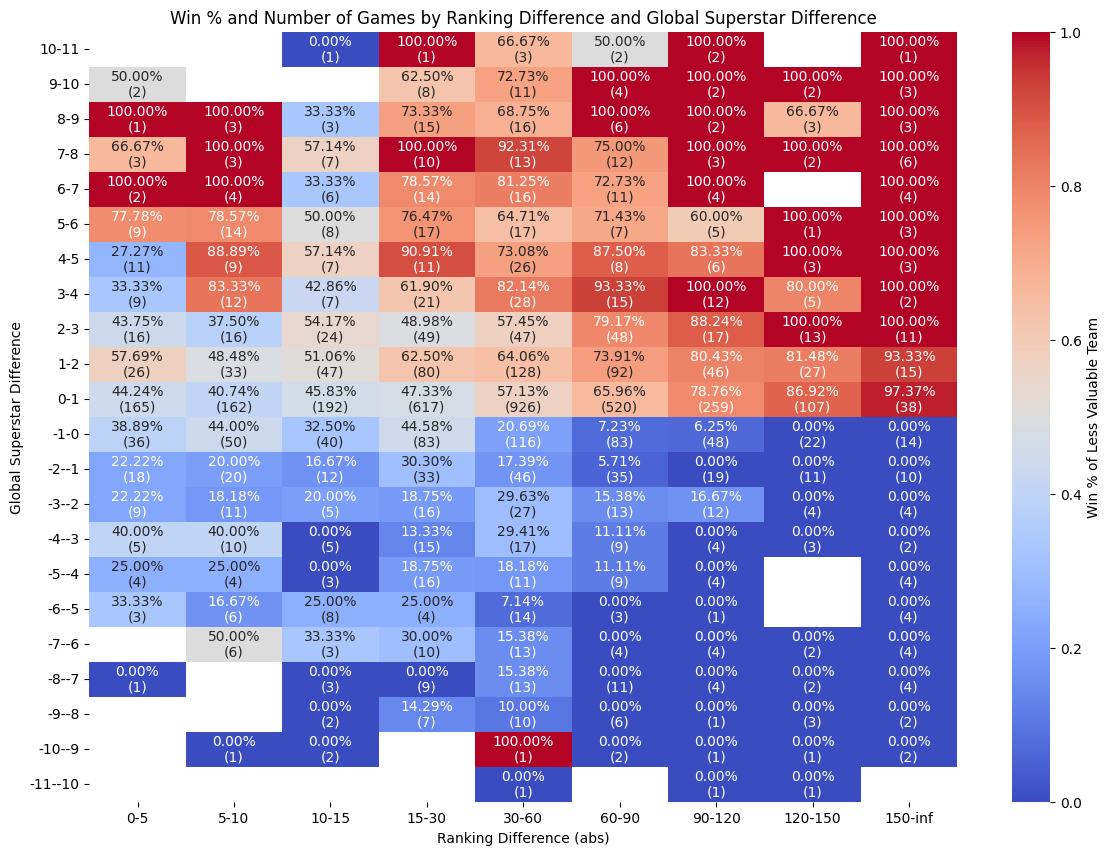

In [350]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Ranking Difference (abs)')
plt.ylabel('Global Superstar Difference')
plt.title('Win % and Number of Games by Ranking Difference and Global Superstar Difference')
plt.show()

### Double sided MV differenc vs Global super star differecne

In [339]:
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
global_superstar_difference_intervals = list(range(-11, 12))  # From -11 to +11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(global_superstar_difference_intervals) - 1):
        gs_lower_bound = global_superstar_difference_intervals[j]
        gs_upper_bound = global_superstar_difference_intervals[j + 1]
        
        gs_filtered_data = mv_filtered_data[(mv_filtered_data['Global_Superstar_difference'] >= gs_lower_bound) &
                                            (mv_filtered_data['Global_Superstar_difference'] < gs_upper_bound)]
        
        # Count the number of rows
        row_count = len(gs_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'global_superstar_difference_interval': f"{gs_lower_bound}-{gs_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='global_superstar_difference_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(10, -12, -1)]  # From 11 to -11
new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval            0-1000000.0  1000000.0-10000000.0  \
global_superstar_difference_interval                                      
10-11                                           0                     0   
9-10                                            0                     0   
8-9                                             0                     0   
7-8                                             0                     0   
6-7                                             0                     0   
5-6                                             0                     0   
4-5                                             0                     0   
3-4                                             0                     0   
2-3                                             1                     1   
1-2                                             3                    25   
0-1                                           450                  1101   
-1-0                                            3                    23   
-2--1                                           0                     3   
-3--2                                           0                     0   
-4--3                                           0                     0   
-5--4                                           0                     0   
-6--5                                           0                     0   
-7--6                                           0                     0   
-8--7                                           0                     0   
-9--8                                           0                     0   
-10--9                                          0                     0   
-11--10                                         0                     0   

mv_difference_abs_interval            10000000.0-50000000.0  \
global_superstar_difference_interval                          
10-11                                                     0   
9-10                                                      0   
8-9                                                       0   
7-8                                                       0   
6-7                                                       0   
5-6                                                       0   
4-5                                                       1   
3-4                                                       3   
2-3                                                      20   
1-2                                                     155   
0-1                                                    1190   
-1-0                                                    162   
-2--1                                                    20   
-3--2                                                     3   
-4--3                                                     0   
-5--4                                                     0   
-6--5                                                     0   
-7--6                                                     0   
-8--7                                                     0   
-9--8                                                     0   
-10--9                                                    0   
-11--10                                                   0   

mv_difference_abs_interval            50000000.0-100000000.0  \
global_superstar_difference_interval                           
10-11                                                      0   
9-10                                                       0   
8-9                                                        0   
7-8                                                        0   
6-7                                                        0   
5-6                                                        1   
4-5                                                        7   
3-4                                                       19   
2-3                                           

In [340]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(global_superstar_difference_intervals) - 1):
        gs_lower_bound = global_superstar_difference_intervals[j]
        gs_upper_bound = global_superstar_difference_intervals[j + 1]
        
        gs_filtered_data = mv_filtered_data[(mv_filtered_data['Global_Superstar_difference'] >= gs_lower_bound) &
                                            (mv_filtered_data['Global_Superstar_difference'] < gs_upper_bound)]
        
        if gs_lower_bound == 0:
            # Use MV_Prediction_Correct values when Global_Superstar_difference is 0
            prediction_sum = gs_filtered_data['MV_Prediction_Correct'].sum()
        elif gs_lower_bound > 0:
            # Use Global_Superstar_difference_prediction_correct values for positive differences
            prediction_sum = gs_filtered_data['Global_Superstar_difference_prediction_correct'].sum()
        else:
            # Use Global_Superstar_difference_prediction_correct_inverse values for negative differences
            prediction_sum = gs_filtered_data['Global_Superstar_difference_prediction_correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'global_superstar_difference_interval': f"{gs_lower_bound}-{gs_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='global_superstar_difference_interval', columns='mv_difference_abs_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval            0-1000000.0  1000000.0-10000000.0  \
global_superstar_difference_interval                                      
10-11                                           0                     0   
9-10                                            0                     0   
8-9                                             0                     0   
7-8                                             0                     0   
6-7                                             0                     0   
5-6                                             0                     0   
4-5                                             0                     0   
3-4                                             0                     0   
2-3                                             0                     0   
1-2                                             1                    10   
0-1                                           216                   623   
-1-0                                            1                    11   
-2--1                                           0                     1   
-3--2                                           0                     0   
-4--3                                           0                     0   
-5--4                                           0                     0   
-6--5                                           0                     0   
-7--6                                           0                     0   
-8--7                                           0                     0   
-9--8                                           0                     0   
-10--9                                          0                     0   
-11--10                                         0                     0   

mv_difference_abs_interval            10000000.0-50000000.0  \
global_superstar_difference_interval                          
10-11                                                     0   
9-10                                                      0   
8-9                                                       0   
7-8                                                       0   
6-7                                                       0   
5-6                                                       0   
4-5                                                       0   
3-4                                                       1   
2-3                                                       4   
1-2                                                      91   
0-1                                                     737   
-1-0                                                     57   
-2--1                                                     6   
-3--2                                                     1   
-4--3                                                     0   
-5--4                                                     0   
-6--5                                                     0   
-7--6                                                     0   
-8--7                                                     0   
-9--8                                                     0   
-10--9                                                    0   
-11--10                                                   0   

mv_difference_abs_interval            50000000.0-100000000.0  \
global_superstar_difference_interval                           
10-11                                                      0   
9-10                                                       0   
8-9                                                        0   
7-8                                                        0   
6-7                                                        0   
5-6                                                        0   
4-5                                                        4   
3-4                                                       12   
2-3                                           

In [341]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval            0-1000000.0  1000000.0-10000000.0  \
global_superstar_difference_interval                                      
10-11                                         NaN                   NaN   
9-10                                          NaN                   NaN   
8-9                                           NaN                   NaN   
7-8                                           NaN                   NaN   
6-7                                           NaN                   NaN   
5-6                                           NaN                   NaN   
4-5                                           NaN                   NaN   
3-4                                           NaN                   NaN   
2-3                                      0.000000              0.000000   
1-2                                      0.333333              0.400000   
0-1                                      0.480000              0.565849   
-1-0                                     0.333333              0.478261   
-2--1                                         NaN              0.333333   
-3--2                                         NaN                   NaN   
-4--3                                         NaN                   NaN   
-5--4                                         NaN                   NaN   
-6--5                                         NaN                   NaN   
-7--6                                         NaN                   NaN   
-8--7                                         NaN                   NaN   
-9--8                                         NaN                   NaN   
-10--9                                        NaN                   NaN   
-11--10                                       NaN                   NaN   

mv_difference_abs_interval            10000000.0-50000000.0  \
global_superstar_difference_interval                          
10-11                                                   NaN   
9-10                                                    NaN   
8-9                                                     NaN   
7-8                                                     NaN   
6-7                                                     NaN   
5-6                                                     NaN   
4-5                                                0.000000   
3-4                                                0.333333   
2-3                                                0.200000   
1-2                                                0.587097   
0-1                                                0.619328   
-1-0                                               0.351852   
-2--1                                              0.300000   
-3--2                                              0.333333   
-4--3                                                   NaN   
-5--4                                                   NaN   
-6--5                                                   NaN   
-7--6                                                   NaN   
-8--7                                                   NaN   
-9--8                                                   NaN   
-10--9                                                  NaN   
-11--10                                                 NaN   

mv_difference_abs_interval            50000000.0-100000000.0  \
global_superstar_difference_interval                           
10-11                                                    NaN   
9-10                                                     NaN   
8-9                                                      NaN   
7-8                                                      NaN   
6-7                                                      NaN   
5-6                                                 0.000000   
4-5                                                 0.571429   
3-4                                                 0.631579   
2-3                                           

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3946025439.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3946025439.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '71.43%
(7)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_87748/3946025439.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

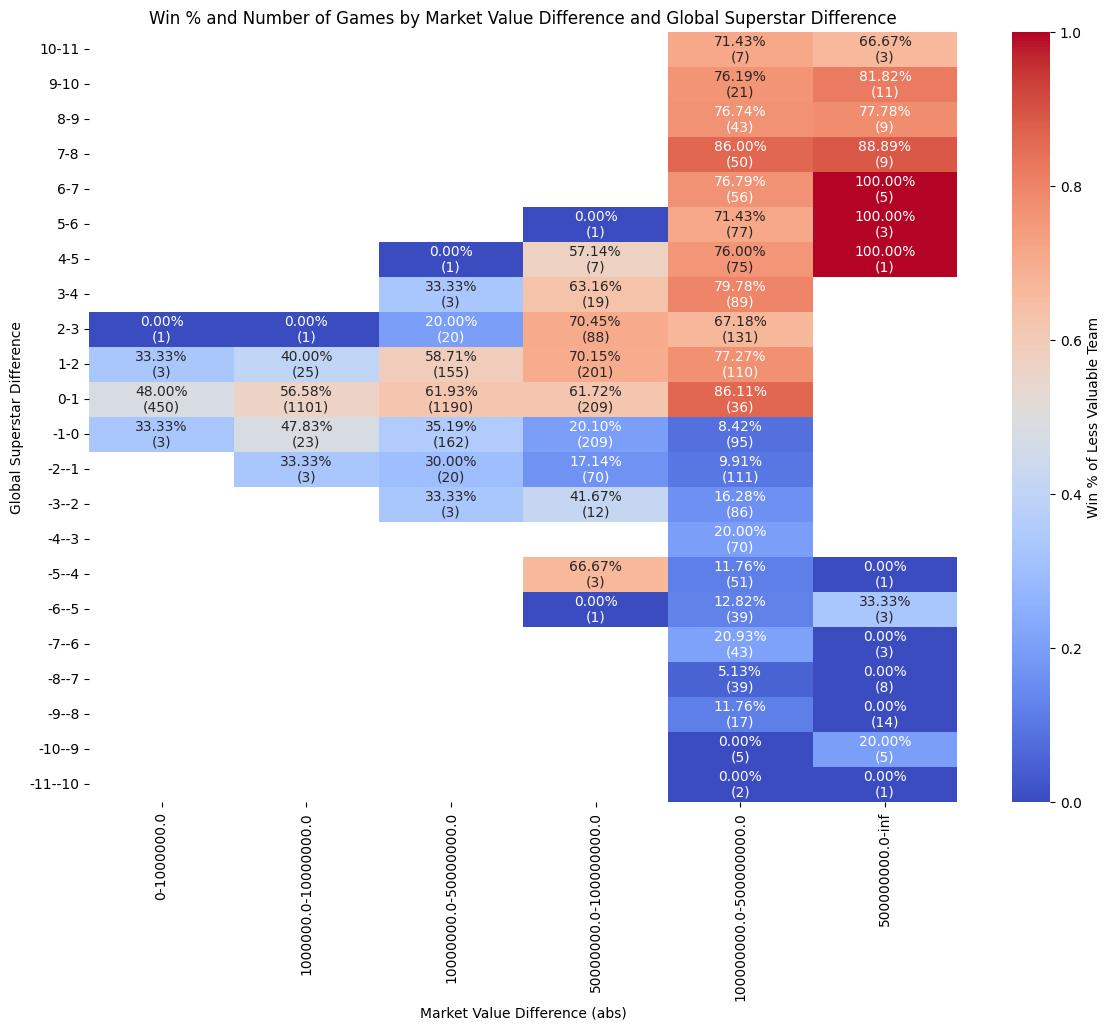

In [342]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Global Superstar Difference')
plt.title('Win % and Number of Games by Market Value Difference and Global Superstar Difference')
plt.show()

### Team 1 Superstars vs Team 2 Superstars (RE-DONE)

In [102]:
plot_type = '∆Rank ≤15 - Superstars_Chart_less_stars_Wins' #'Win rate of team with less superstars'
#latest_match_data = latest_match_data[(latest_match_data['Competition'] != 'Euros') & (latest_match_data['Competition'] != 'World Cup') & (latest_match_data['Competition'] != 'Copa America') & (latest_match_data['Competition'] != 'Gold Cup') & (latest_match_data['Competition'] != 'Olympics') & (latest_match_data['Competition'] != 'World Cup Qualifiers, UEFA') & (latest_match_data['Competition'] != 'World Cup Intercontinental Playoffs') & (latest_match_data['Competition'] != 'Africa Cup of Nations')]

# Define the intervals (bins)
global_stars_intervals = list(range(12))  # From 0 to 11

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(global_stars_intervals) - 1):
    team1_lower_bound = global_stars_intervals[i]
    team1_upper_bound = global_stars_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team 1, Total Global Superstars'] >= team1_lower_bound) &
                                            (latest_match_data['Team 1, Total Global Superstars'] < team1_upper_bound)]
    
    for j in range(len(global_stars_intervals) - 1):
        team2_lower_bound = global_stars_intervals[j]
        team2_upper_bound = global_stars_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team 2, Total Global Superstars'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team 2, Total Global Superstars'] < team2_upper_bound)]
        
        # Count the number of rows
        row_count = len(team2_filtered_data)
        
        results.append({
            'team1_global_stars_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_global_stars_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='team2_global_stars_interval', columns='team1_global_stars_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [f"{i}-{i+1}" for i in range(11)]
new_col_order = [f"{i}-{i+1}" for i in range(11)]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

team1_global_stars_interval  0-1  1-2  2-3  3-4  4-5  5-6  6-7  7-8  8-9  \
team2_global_stars_interval                                                
0-1                          504   77   31   10    4    9    3    5    4   
1-2                           81   29   25   11    6    7    5    6    5   
2-3                           28   19   14    7    6    8    4   11    1   
3-4                            8    8   11    3    1    3    2    6    4   
4-5                            5    4    7    4    2    0    5    1    2   
5-6                            4    5    2    0    3    0    0    2    1   
6-7                            3    3    5    4    4    2    1    1    1   
7-8                            3    6    3    1    6    4    1    2    1   
8-9                            1    1    6    0    1    1    0    8    1   
9-10                           1    2    5    1    1    2    1    2    1   
10-11                          3    1    0    1    1    0    1    0    0   

team1_global_stars_interval  9-10  10-11  
team2_global_stars_interval               
0-1                             1      0  
1-2                             2      2  
2-3                             4      2  
3-4                             1      1  
4-5                             2      1  
5-6                             4      1  
6-7                             2      0  
7-8                             1      0  
8-9                             1      1  
9-10                            0      0  
10-11                           1      0

In [103]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(global_stars_intervals) - 1):
    team1_lower_bound = global_stars_intervals[i]
    team1_upper_bound = global_stars_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team 1, Total Global Superstars'] >= team1_lower_bound) &
                                            (latest_match_data['Team 1, Total Global Superstars'] < team1_upper_bound)]
    
    for j in range(len(global_stars_intervals) - 1):
        team2_lower_bound = global_stars_intervals[j]
        team2_upper_bound = global_stars_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team 2, Total Global Superstars'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team 2, Total Global Superstars'] < team2_upper_bound)]
        
        if i == j:
            # Use MV_Prediction_Correct values along the diagonal
            #prediction_sum = team2_filtered_data['MV_Prediction_Correct'].sum()
            prediction_sum = team2_filtered_data['Global_Superstar_difference_prediction_correct_inverse'].sum() #Team.2.Wins
        else:
            # Use Global_Superstar_difference_prediction_correct values for other cells
            prediction_sum = team2_filtered_data['Global_Superstar_difference_prediction_correct_inverse'].sum() #Global_Superstar_difference_prediction_correct_inverse
        
        results.append({
            'team1_global_stars_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_global_stars_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'sum_prediction_correct': prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='team2_global_stars_interval', columns='team1_global_stars_interval', values='sum_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

team1_global_stars_interval  0-1  1-2  2-3  3-4  4-5  5-6  6-7  7-8  8-9  \
team2_global_stars_interval                                                
0-1                            0   18    7    3    1    2    1    2    0   
1-2                           29    0    7    5    2    0    0    1    0   
2-3                            5    8    0    1    1    0    1    3    0   
3-4                            2    3    3    0    0    1    0    2    0   
4-5                            2    1    1    1    0    0    2    0    1   
5-6                            0    0    0    0    2    0    0    0    0   
6-7                            0    1    1    1    0    0    0    0    0   
7-8                            0    1    0    1    1    1    1    0    0   
8-9                            0    0    2    0    1    0    0    5    0   
9-10                           0    0    3    1    1    1    1    0    0   
10-11                          0    0    0    1    0    0    0    0    0   

team1_global_stars_interval  9-10  10-11  
team2_global_stars_interval               
0-1                             0      0  
1-2                             1      0  
2-3                             0      1  
3-4                             0      0  
4-5                             0      1  
5-6                             1      0  
6-7                             1      0  
7-8                             0      0  
8-9                             0      1  
9-10                            0      0  
10-11                           0      0

In [104]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

team1_global_stars_interval       0-1       1-2       2-3       3-4       4-5  \
team2_global_stars_interval                                                     
0-1                          0.000000  0.233766  0.225806  0.300000  0.250000   
1-2                          0.358025  0.000000  0.280000  0.454545  0.333333   
2-3                          0.178571  0.421053  0.000000  0.142857  0.166667   
3-4                          0.250000  0.375000  0.272727  0.000000  0.000000   
4-5                          0.400000  0.250000  0.142857  0.250000  0.000000   
5-6                          0.000000  0.000000  0.000000       NaN  0.666667   
6-7                          0.000000  0.333333  0.200000  0.250000  0.000000   
7-8                          0.000000  0.166667  0.000000  1.000000  0.166667   
8-9                          0.000000  0.000000  0.333333       NaN  1.000000   
9-10                         0.000000  0.000000  0.600000  1.000000  1.000000   
10-11                        0.000000  0.000000       NaN  1.000000  0.000000   

team1_global_stars_interval       5-6       6-7       7-8  8-9  9-10  10-11  
team2_global_stars_interval                                                  
0-1                          0.222222  0.333333  0.400000  0.0  0.00    NaN  
1-2                          0.000000  0.000000  0.166667  0.0  0.50    0.0  
2-3                          0.000000  0.250000  0.272727  0.0  0.00    0.5  
3-4                          0.333333  0.000000  0.333333  0.0  0.00    0.0  
4-5                               NaN  0.400000  0.000000  0.5  0.00    1.0  
5-6                               NaN       NaN  0.000000  0.0  0.25    0.0  
6-7                          0.000000  0.000000  0.000000  0.0  0.50    NaN  
7-8                          0.250000  1.000000  0.000000  0.0  0.00    NaN  
8-9                          0.000000       NaN  0.625000  0.0  0.00    1.0  
9-10                         0.500000  1.000000  0.000000  0.0   NaN    NaN  
10-11                             NaN  0.000000       NaN  NaN  0.00    NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/2003198825.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(504)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/2003198825.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '23.38%
(77)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/2003198825.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

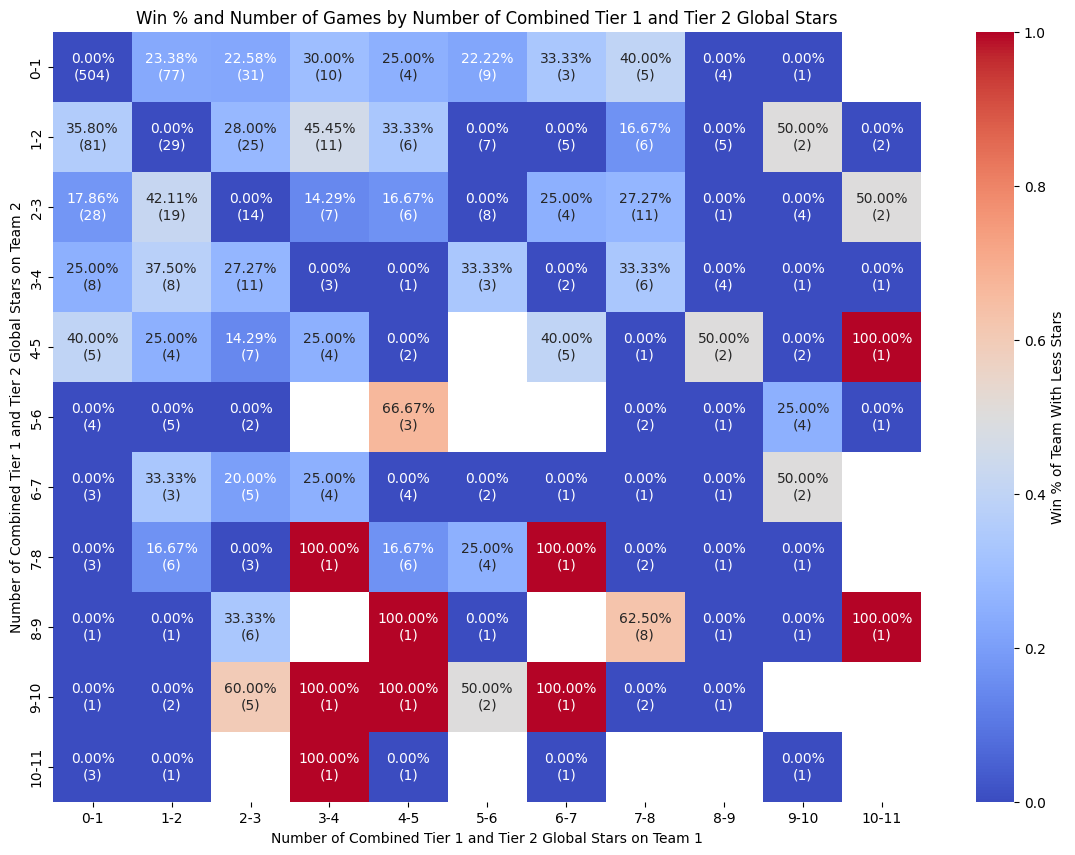

In [105]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Team With Less Stars'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Number of Combined Tier 1 and Tier 2 Global Stars on Team 1')
plt.ylabel('Number of Combined Tier 1 and Tier 2 Global Stars on Team 2')
plt.title('Win % and Number of Games by Number of Combined Tier 1 and Tier 2 Global Stars')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/num_superstars_each_team_{plot_type}.png') 
plt.show()

### X = ∆rank, Y = value of worse ranked team

In [117]:
# Define the intervals (bins)
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]
worse_ranked_team_value_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(worse_ranked_team_value_intervals) - 1):
        value_lower_bound = worse_ranked_team_value_intervals[j]
        value_upper_bound = worse_ranked_team_value_intervals[j + 1]
        
        value_filtered_data = rank_filtered_data[(rank_filtered_data['worse_ranked_team_value'] >= value_lower_bound) &
                                                 (rank_filtered_data['worse_ranked_team_value'] < value_upper_bound)]
        
        # Count the number of rows
        row_count = len(value_filtered_data)
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'worse_ranked_team_value_interval': f"{value_lower_bound}-{value_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='worse_ranked_team_value_interval', columns='rank_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '5000000.0-10000000.0',
    '1000000.0-5000000.0',
    '500000.0-1000000.0',
    '100000.0-500000.0',
    '0-100000.0'
]

new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

rank_difference_abs_interval      0-5  5-10  10-15  15-30  30-60  60-90  \
worse_ranked_team_value_interval                                          
500000000.0-inf                     0     0      0      0      0      0   
100000000.0-500000000.0             3     3      4     11      4      0   
50000000.0-100000000.0              4     5      3     17     15      3   
10000000.0-50000000.0               3     0      2     12      4      2   
5000000.0-10000000.0                0     0      0      0      0      0   
1000000.0-5000000.0                 0     0      0      0      0      0   
500000.0-1000000.0                  0     0      0      0      0      0   
100000.0-500000.0                   0     0      0      0      0      0   
0-100000.0                          0     0      0      0      0      0   

rank_difference_abs_interval      90-120  120-150  150-inf  
worse_ranked_team_value_interval                            
500000000.0-inf                        0        0        0  
100000000.0-500000000.0                0        0        0  
50000000.0-100000000.0                 0        0        0  
10000000.0-50000000.0                  0        0        0  
5000000.0-10000000.0                   0        0        0  
1000000.0-5000000.0                    0        0        0  
500000.0-1000000.0                     0        0        0  
100000.0-500000.0                      0        0        0  
0-100000.0                             0        0        0

In [121]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_lower_bound = rank_difference_abs_intervals[i]
    rank_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_lower_bound) &
                                           (latest_match_data['rank_difference_abs'] < rank_upper_bound)]
    
    for j in range(len(worse_ranked_team_value_intervals) - 1):
        value_lower_bound = worse_ranked_team_value_intervals[j]
        value_upper_bound = worse_ranked_team_value_intervals[j + 1]
        
        value_filtered_data = rank_filtered_data[(rank_filtered_data['worse_ranked_team_value'] >= value_lower_bound) &
                                                 (rank_filtered_data['worse_ranked_team_value'] < value_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = value_filtered_data['Rank_Prediction_Correct_inverse'].sum()
        
        results.append({
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'worse_ranked_team_value_interval': f"{value_lower_bound}-{value_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='worse_ranked_team_value_interval', columns='rank_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

rank_difference_abs_interval      0-5  5-10  10-15  15-30  30-60  60-90  \
worse_ranked_team_value_interval                                          
500000000.0-inf                     0     0      0      0      0      0   
100000000.0-500000000.0             1     1      0      1      0      0   
50000000.0-100000000.0              2     1      1      7      4      0   
10000000.0-50000000.0               1     0      0      4      1      2   
5000000.0-10000000.0                0     0      0      0      0      0   
1000000.0-5000000.0                 0     0      0      0      0      0   
500000.0-1000000.0                  0     0      0      0      0      0   
100000.0-500000.0                   0     0      0      0      0      0   
0-100000.0                          0     0      0      0      0      0   

rank_difference_abs_interval      90-120  120-150  150-inf  
worse_ranked_team_value_interval                            
500000000.0-inf                        0        0        0  
100000000.0-500000000.0                0        0        0  
50000000.0-100000000.0                 0        0        0  
10000000.0-50000000.0                  0        0        0  
5000000.0-10000000.0                   0        0        0  
1000000.0-5000000.0                    0        0        0  
500000.0-1000000.0                     0        0        0  
100000.0-500000.0                      0        0        0  
0-100000.0                             0        0        0

In [122]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

rank_difference_abs_interval           0-5      5-10     10-15     15-30  \
worse_ranked_team_value_interval                                           
500000000.0-inf                        NaN       NaN       NaN       NaN   
100000000.0-500000000.0           0.333333  0.333333  0.000000  0.090909   
50000000.0-100000000.0            0.500000  0.200000  0.333333  0.411765   
10000000.0-50000000.0             0.333333       NaN  0.000000  0.333333   
5000000.0-10000000.0                   NaN       NaN       NaN       NaN   
1000000.0-5000000.0                    NaN       NaN       NaN       NaN   
500000.0-1000000.0                     NaN       NaN       NaN       NaN   
100000.0-500000.0                      NaN       NaN       NaN       NaN   
0-100000.0                             NaN       NaN       NaN       NaN   

rank_difference_abs_interval         30-60  60-90  90-120  120-150  150-inf  
worse_ranked_team_value_interval                                             
500000000.0-inf                        NaN    NaN     NaN      NaN      NaN  
100000000.0-500000000.0           0.000000    NaN     NaN      NaN      NaN  
50000000.0-100000000.0            0.266667    0.0     NaN      NaN      NaN  
10000000.0-50000000.0             0.250000    1.0     NaN      NaN      NaN  
5000000.0-10000000.0                   NaN    NaN     NaN      NaN      NaN  
1000000.0-5000000.0                    NaN    NaN     NaN      NaN      NaN  
500000.0-1000000.0                     NaN    NaN     NaN      NaN      NaN  
100000.0-500000.0                      NaN    NaN     NaN      NaN      NaN  
0-100000.0                             NaN    NaN     NaN      NaN      NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_45920/693682073.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


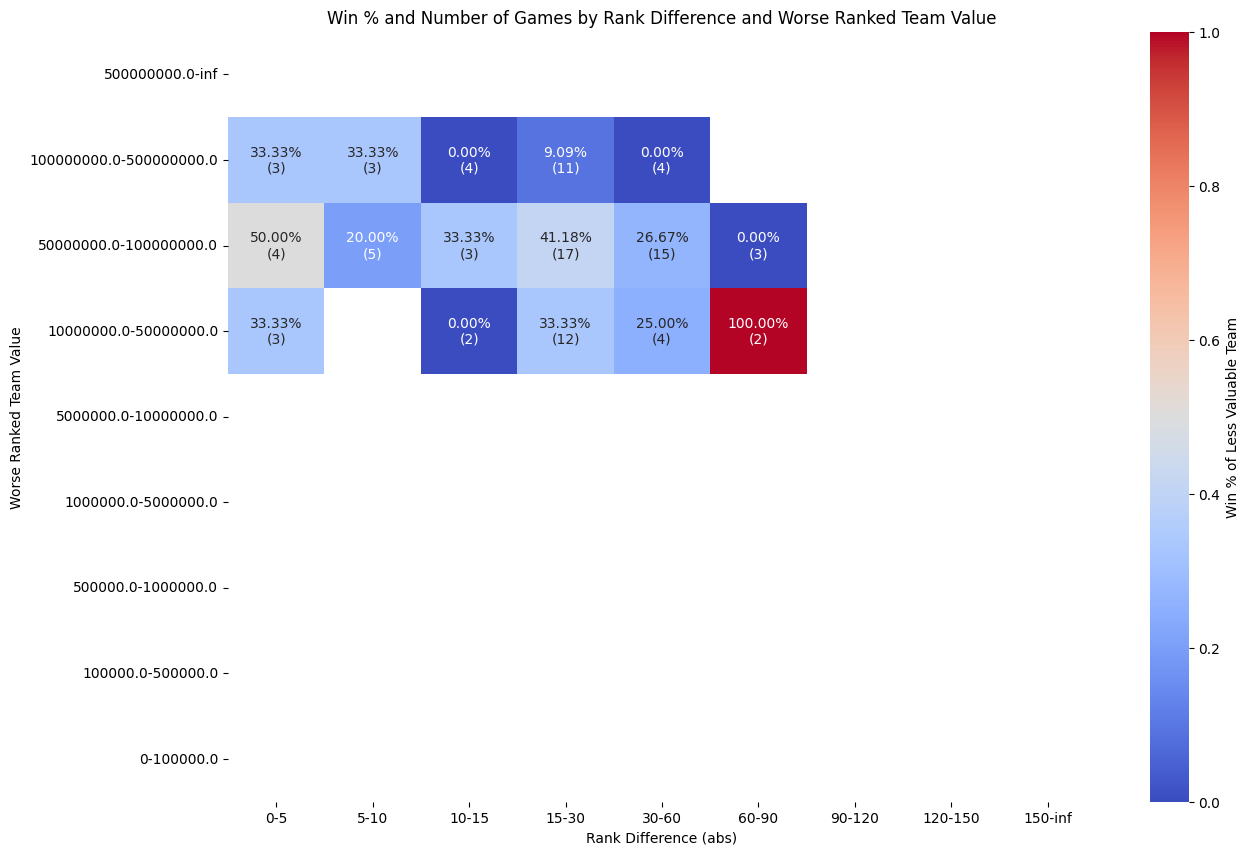

In [123]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference (abs)')
plt.ylabel('Worse Ranked Team Value')
plt.title('Win % and Number of Games by Rank Difference and Worse Ranked Team Value')
plt.show()

### X = ∆MV, Y = FIFA ranking of less valuable team

In [134]:
# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, np.inf]
less_valuable_team_FIFA_ranking_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(less_valuable_team_FIFA_ranking_intervals) - 1):
        rank_lower_bound = less_valuable_team_FIFA_ranking_intervals[j]
        rank_upper_bound = less_valuable_team_FIFA_ranking_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['less_valuable_team_FIFA_ranking'] >= rank_lower_bound) &
                                              (mv_filtered_data['less_valuable_team_FIFA_ranking'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'less_valuable_team_FIFA_ranking_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='less_valuable_team_FIFA_ranking_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '10-15',
    '5-10',
    '0-5'
]

new_col_order = [
    '0-100000.0',
    '100000.0-500000.0',
    '500000.0-1000000.0',
    '1000000.0-5000000.0',
    '5000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval                0-100000.0  100000.0-500000.0  \
less_valuable_team_FIFA_ranking_interval                                  
150-inf                                            0                  0   
120-150                                            0                  0   
90-120                                             0                  0   
60-90                                              0                  1   
30-60                                              0                  0   
15-30                                              0                  0   
10-15                                              0                  0   
5-10                                               0                  0   
0-5                                                0                  0   

mv_difference_abs_interval                500000.0-1000000.0  \
less_valuable_team_FIFA_ranking_interval                       
150-inf                                                    0   
120-150                                                    0   
90-120                                                     0   
60-90                                                      0   
30-60                                                      0   
15-30                                                      1   
10-15                                                      0   
5-10                                                       0   
0-5                                                        0   

mv_difference_abs_interval                1000000.0-5000000.0  \
less_valuable_team_FIFA_ranking_interval                        
150-inf                                                     0   
120-150                                                     0   
90-120                                                      0   
60-90                                                       1   
30-60                                                       2   
15-30                                                       3   
10-15                                                       1   
5-10                                                        0   
0-5                                                         0   

mv_difference_abs_interval                5000000.0-10000000.0  \
less_valuable_team_FIFA_ranking_interval                         
150-inf                                                      0   
120-150                                                      1   
90-120                                                       0   
60-90                                                        2   
30-60                                                        4   
15-30                                                        2   
10-15                                                        1   
5-10                                                         0   
0-5                                                          0   

mv_difference_abs_interval                10000000.0-50000000.0  \
less_valuable_team_FIFA_ranking_interval                          
150-inf                                                       0   
120-150                                                       0   
90-120                                                        0   
60-90                                                        15   
30-60                                                        23   
15-30                                                         8   
10-15                                                         1   
5-10                                                          1   
0-5                                                           1   

mv_difference_abs_interval                50000000.0-100000000.0  \
less_valuable_team_FIFA_ranking_interval                           
150-inf                                                        0   
120-150                                                        0   
90-120          

In [138]:
# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(less_valuable_team_FIFA_ranking_intervals) - 1):
        rank_lower_bound = less_valuable_team_FIFA_ranking_intervals[j]
        rank_upper_bound = less_valuable_team_FIFA_ranking_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['less_valuable_team_FIFA_ranking'] >= rank_lower_bound) &
                                              (mv_filtered_data['less_valuable_team_FIFA_ranking'] < rank_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = rank_filtered_data['MV_Prediction_Correct_inverse'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'less_valuable_team_FIFA_ranking_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='less_valuable_team_FIFA_ranking_interval', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval                0-100000.0  100000.0-500000.0  \
less_valuable_team_FIFA_ranking_interval                                  
150-inf                                            0                  0   
120-150                                            0                  0   
90-120                                             0                  0   
60-90                                              0                  0   
30-60                                              0                  0   
15-30                                              0                  0   
10-15                                              0                  0   
5-10                                               0                  0   
0-5                                                0                  0   

mv_difference_abs_interval                500000.0-1000000.0  \
less_valuable_team_FIFA_ranking_interval                       
150-inf                                                    0   
120-150                                                    0   
90-120                                                     0   
60-90                                                      0   
30-60                                                      0   
15-30                                                      0   
10-15                                                      0   
5-10                                                       0   
0-5                                                        0   

mv_difference_abs_interval                1000000.0-5000000.0  \
less_valuable_team_FIFA_ranking_interval                        
150-inf                                                     0   
120-150                                                     0   
90-120                                                      0   
60-90                                                       1   
30-60                                                       0   
15-30                                                       2   
10-15                                                       0   
5-10                                                        0   
0-5                                                         0   

mv_difference_abs_interval                5000000.0-10000000.0  \
less_valuable_team_FIFA_ranking_interval                         
150-inf                                                      0   
120-150                                                      1   
90-120                                                       0   
60-90                                                        1   
30-60                                                        1   
15-30                                                        1   
10-15                                                        0   
5-10                                                         0   
0-5                                                          0   

mv_difference_abs_interval                10000000.0-50000000.0  \
less_valuable_team_FIFA_ranking_interval                          
150-inf                                                       0   
120-150                                                       0   
90-120                                                        0   
60-90                                                         1   
30-60                                                        10   
15-30                                                         4   
10-15                                                         0   
5-10                                                          0   
0-5                                                           1   

mv_difference_abs_interval                50000000.0-100000000.0  \
less_valuable_team_FIFA_ranking_interval                           
150-inf                                                        0   
120-150                                                        0   
90-120          

In [139]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval                0-100000.0  100000.0-500000.0  \
less_valuable_team_FIFA_ranking_interval                                  
150-inf                                          NaN                NaN   
120-150                                          NaN                NaN   
90-120                                           NaN                NaN   
60-90                                            NaN                0.0   
30-60                                            NaN                NaN   
15-30                                            NaN                NaN   
10-15                                            NaN                NaN   
5-10                                             NaN                NaN   
0-5                                              NaN                NaN   

mv_difference_abs_interval                500000.0-1000000.0  \
less_valuable_team_FIFA_ranking_interval                       
150-inf                                                  NaN   
120-150                                                  NaN   
90-120                                                   NaN   
60-90                                                    NaN   
30-60                                                    NaN   
15-30                                                    0.0   
10-15                                                    NaN   
5-10                                                     NaN   
0-5                                                      NaN   

mv_difference_abs_interval                1000000.0-5000000.0  \
less_valuable_team_FIFA_ranking_interval                        
150-inf                                                   NaN   
120-150                                                   NaN   
90-120                                                    NaN   
60-90                                                1.000000   
30-60                                                0.000000   
15-30                                                0.666667   
10-15                                                0.000000   
5-10                                                      NaN   
0-5                                                       NaN   

mv_difference_abs_interval                5000000.0-10000000.0  \
less_valuable_team_FIFA_ranking_interval                         
150-inf                                                    NaN   
120-150                                                   1.00   
90-120                                                     NaN   
60-90                                                     0.50   
30-60                                                     0.25   
15-30                                                     0.50   
10-15                                                     0.00   
5-10                                                       NaN   
0-5                                                        NaN   

mv_difference_abs_interval                10000000.0-50000000.0  \
less_valuable_team_FIFA_ranking_interval                          
150-inf                                                     NaN   
120-150                                                     NaN   
90-120                                                      NaN   
60-90                                                  0.066667   
30-60                                                  0.434783   
15-30                                                  0.500000   
10-15                                                  0.000000   
5-10                                                   0.000000   
0-5                                                    1.000000   

mv_difference_abs_interval                50000000.0-100000000.0  \
less_valuable_team_FIFA_ranking_interval                           
150-inf                                                      NaN   
120-150                                                      NaN   
90-120          

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_45920/551203261.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


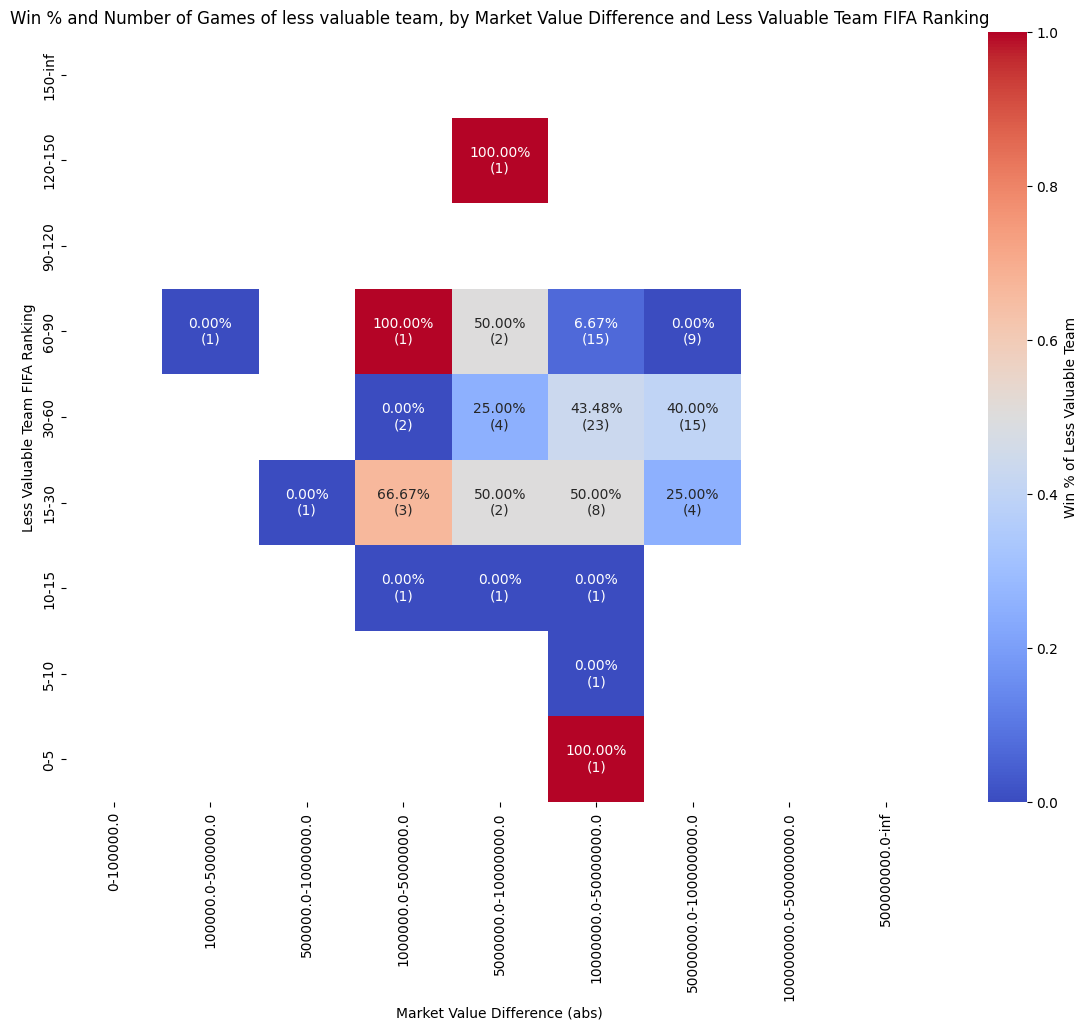

In [140]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference (abs)')
plt.ylabel('Less Valuable Team FIFA Ranking')
plt.title('Win % and Number of Games of less valuable team, by Market Value Difference and Less Valuable Team FIFA Ranking')
plt.show()

### X = ∆MV, Y = value of larger team

In [51]:
# Create a column for the larger team value
latest_match_data['larger_team_value'] = latest_match_data[['Team.1.Total.Market.Value', 'Team.2.Total.Market.Value']].max(axis=1)

# Subset the data
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
larger_team_value_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(larger_team_value_intervals) - 1):
        team_lower_bound = larger_team_value_intervals[j]
        team_upper_bound = larger_team_value_intervals[j + 1]
        
        team_filtered_data = mv_filtered_data[(mv_filtered_data['larger_team_value'] >= team_lower_bound) &
                                              (mv_filtered_data['larger_team_value'] < team_upper_bound)]
        
        # Count the number of rows
        row_count = len(team_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'larger_team_value_interval': f"{team_lower_bound}-{team_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='larger_team_value_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '1000000.0-10000000.0',
    '0-1000000.0'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval  0-1000000.0  1000000.0-10000000.0  \
larger_team_value_interval                                      
500000000.0-inf                       0                     1   
100000000.0-500000000.0               3                    23   
50000000.0-100000000.0                4                    35   
10000000.0-50000000.0                26                   359   
1000000.0-10000000.0                225                   735   
0-1000000.0                         199                     0   

mv_difference_abs_interval  10000000.0-50000000.0  50000000.0-100000000.0  \
larger_team_value_interval                                                  
500000000.0-inf                                 2                       5   
100000000.0-500000000.0                       124                     295   
50000000.0-100000000.0                        281                     520   
10000000.0-50000000.0                        1147                       0   
1000000.0-10000000.0                            0                       0   
0-1000000.0                                     0                       0   

mv_difference_abs_interval  100000000.0-500000000.0  500000000.0-inf  
larger_team_value_interval                                            
500000000.0-inf                                  81               79  
100000000.0-500000000.0                        1175                0  
50000000.0-100000000.0                            0                0  
10000000.0-50000000.0                             0                0  
1000000.0-10000000.0                              0                0  
0-1000000.0                                       0                0

In [53]:
# Create a column for the larger team value
latest_match_data['larger_team_value'] = latest_match_data[['Team.1.Total.Market.Value', 'Team.2.Total.Market.Value']].max(axis=1)

# Subset the data
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
larger_team_value_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(larger_team_value_intervals) - 1):
        team_lower_bound = larger_team_value_intervals[j]
        team_upper_bound = larger_team_value_intervals[j + 1]
        
        team_filtered_data = mv_filtered_data[(mv_filtered_data['larger_team_value'] >= team_lower_bound) &
                                              (mv_filtered_data['larger_team_value'] < team_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = team_filtered_data['MV_Prediction_Correct'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'larger_team_value_interval': f"{team_lower_bound}-{team_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='larger_team_value_interval', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '1000000.0-10000000.0',
    '0-1000000.0'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval  0-1000000.0  1000000.0-10000000.0  \
larger_team_value_interval                                      
500000000.0-inf                       0                     1   
100000000.0-500000000.0               1                    10   
50000000.0-100000000.0                0                    10   
10000000.0-50000000.0                11                    97   
1000000.0-10000000.0                 65                   123   
0-1000000.0                          47                     0   

mv_difference_abs_interval  10000000.0-50000000.0  50000000.0-100000000.0  \
larger_team_value_interval                                                  
500000000.0-inf                                 0                       4   
100000000.0-500000000.0                        45                      73   
50000000.0-100000000.0                         68                      57   
10000000.0-50000000.0                         171                       0   
1000000.0-10000000.0                            0                       0   
0-1000000.0                                     0                       0   

mv_difference_abs_interval  100000000.0-500000000.0  500000000.0-inf  
larger_team_value_interval                                            
500000000.0-inf                                  18                4  
100000000.0-500000000.0                         112                0  
50000000.0-100000000.0                            0                0  
10000000.0-50000000.0                             0                0  
1000000.0-10000000.0                              0                0  
0-1000000.0                                       0                0

In [55]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval  0-1000000.0  1000000.0-10000000.0  \
larger_team_value_interval                                      
500000000.0-inf                     NaN              1.000000   
100000000.0-500000000.0        0.333333              0.434783   
50000000.0-100000000.0         0.000000              0.285714   
10000000.0-50000000.0          0.423077              0.270195   
1000000.0-10000000.0           0.288889              0.167347   
0-1000000.0                    0.236181                   NaN   

mv_difference_abs_interval  10000000.0-50000000.0  50000000.0-100000000.0  \
larger_team_value_interval                                                  
500000000.0-inf                          0.000000                0.800000   
100000000.0-500000000.0                  0.362903                0.247458   
50000000.0-100000000.0                   0.241993                0.109615   
10000000.0-50000000.0                    0.149085                     NaN   
1000000.0-10000000.0                          NaN                     NaN   
0-1000000.0                                   NaN                     NaN   

mv_difference_abs_interval  100000000.0-500000000.0  500000000.0-inf  
larger_team_value_interval                                            
500000000.0-inf                            0.222222         0.050633  
100000000.0-500000000.0                    0.095319              NaN  
50000000.0-100000000.0                          NaN              NaN  
10000000.0-50000000.0                           NaN              NaN  
1000000.0-10000000.0                            NaN              NaN  
0-1000000.0                                     NaN              NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_21561/2128548272.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_21561/2128548272.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_21561/2128548272.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

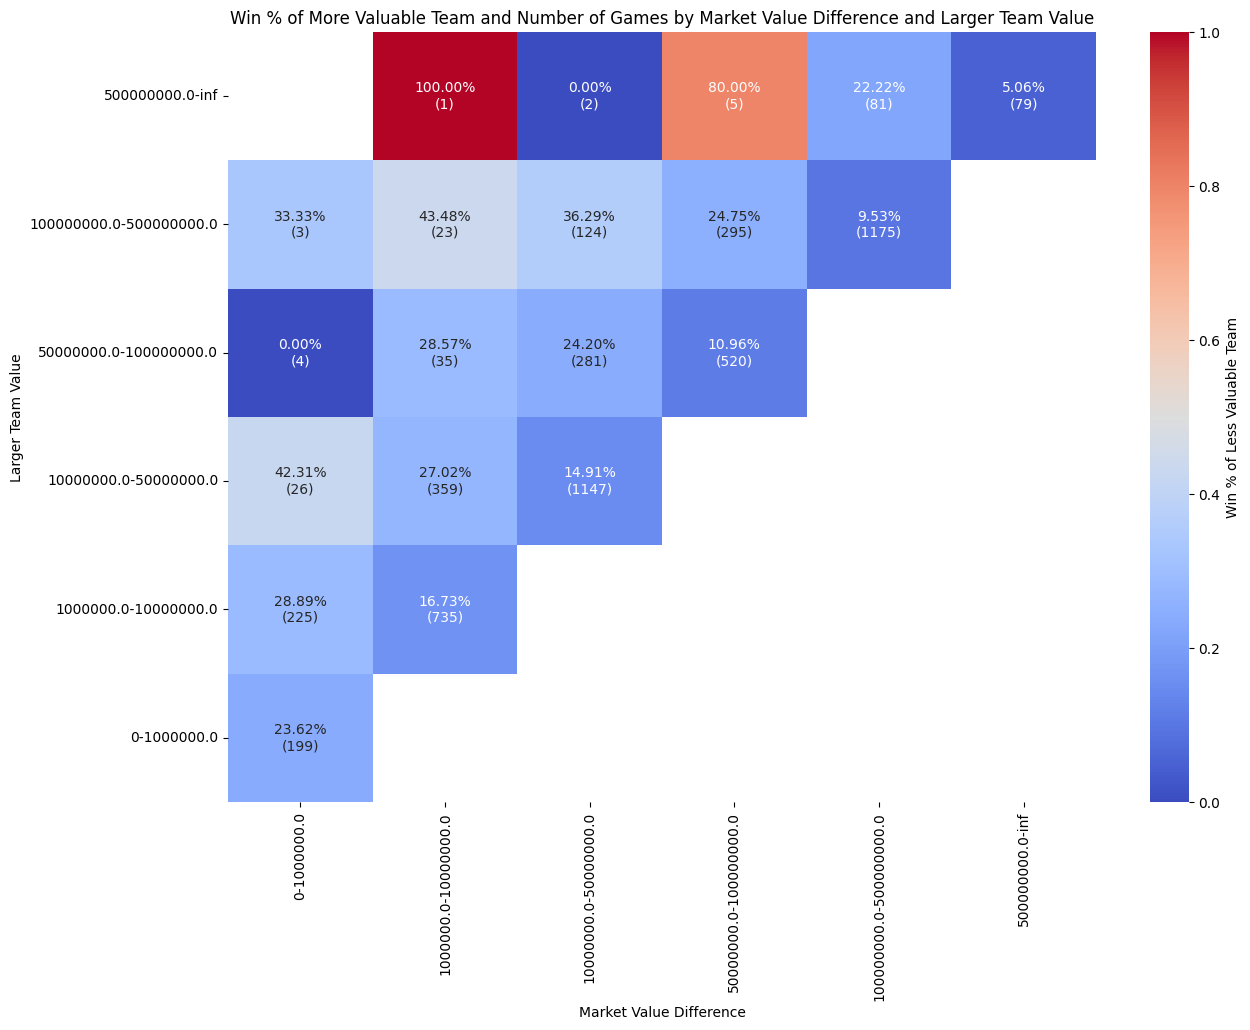

In [56]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference')
plt.ylabel('Larger Team Value')
plt.title('Win % of More Valuable Team and Number of Games by Market Value Difference and Larger Team Value')
plt.show()

### Team 1 rank vs Team 2 rank (RE-DONE)

In [303]:
plot_type = '1 star on team 2 - Win rate of away team'#'Win rate of away team' #
latest_match_data = latest_match_data[(latest_match_data['Competition'] != 'Euros') & (latest_match_data['Competition'] != 'World Cup') & (latest_match_data['Competition'] != 'Copa America') & (latest_match_data['Competition'] != 'Gold Cup') & (latest_match_data['Competition'] != 'Olympics') & (latest_match_data['Competition'] != 'World Cup Qualifiers, UEFA') & (latest_match_data['Competition'] != 'World Cup Intercontinental Playoffs') & (latest_match_data['Competition'] != 'Africa Cup of Nations')]

# Subset the data
subset_1e6 = latest_match_data[latest_match_data['Team.1.Rank'] <= 1e6]

# Define the intervals (bins)
rank_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_intervals) - 1):
    team1_lower_bound = rank_intervals[i]
    team1_upper_bound = rank_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team.1.Rank'] >= team1_lower_bound) &
                                            (latest_match_data['Team.1.Rank'] < team1_upper_bound)]
    
    for j in range(len(rank_intervals) - 1):
        team2_lower_bound = rank_intervals[j]
        team2_upper_bound = rank_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team.2.Rank'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team.2.Rank'] < team2_upper_bound)]
        
        # Count the number of rows
        row_count = len(team2_filtered_data)
        
        results.append({
            'team1_rank_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_rank_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='team2_rank_interval', columns='team1_rank_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '10-15',
    '5-10',
    '0-5'
]

new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

team1_rank_interval  0-5  5-10  10-15  15-30  30-60  60-90  90-120  120-150  \
team2_rank_interval                                                           
150-inf                0     0      0      0      0      0       0        0   
120-150                0     0      0      0      2      0       2        1   
90-120                 0     0      0      1      2      1       3        2   
60-90                  0     0      0      0     13      8      10       11   
30-60                  1     0      0      9     24     35      39       36   
15-30                  0     0      1      6     30     16      12       13   
10-15                  0     0      0      0      3      5       4        3   
5-10                   0     0      0      0      3      5       1        0   
0-5                    0     0      0      0      0      1       1        0   

team1_rank_interval  150-inf  
team2_rank_interval           
150-inf                    0  
120-150                    0  
90-120                     1  
60-90                      7  
30-60                     25  
15-30                      6  
10-15                      2  
5-10                       1  
0-5                        0

In [304]:
# Subset the data
subset_1e6 = latest_match_data[latest_match_data['Team.1.Rank'] <= 1e6]

# Define the intervals (bins)
rank_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_intervals) - 1):
    team1_lower_bound = rank_intervals[i]
    team1_upper_bound = rank_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team.1.Rank'] >= team1_lower_bound) &
                                            (latest_match_data['Team.1.Rank'] < team1_upper_bound)]
    
    for j in range(len(rank_intervals) - 1):
        team2_lower_bound = rank_intervals[j]
        team2_upper_bound = rank_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team.2.Rank'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team.2.Rank'] < team2_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        rank_prediction_sum = team2_filtered_data['Team.2.Wins'].sum()
        
        
        results.append({
            'team1_rank_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_rank_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='team2_rank_interval', columns='team1_rank_interval', values='sum_rank_prediction_correct').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '10-15',
    '5-10',
    '0-5'
]

new_col_order = [
    '0-5',
    '5-10',
    '10-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

team1_rank_interval  0-5  5-10  10-15  15-30  30-60  60-90  90-120  120-150  \
team2_rank_interval                                                           
150-inf                0     0      0      0      0      0       0        0   
120-150                0     0      0      0      1      0       0        0   
90-120                 0     0      0      0      0      1       1        0   
60-90                  0     0      0      0      2      4       2        2   
30-60                  0     0      0      3      5     18      26       25   
15-30                  0     0      0      3     12      7       7       11   
10-15                  0     0      0      0      1      3       3        2   
5-10                   0     0      0      0      3      2       1        0   
0-5                    0     0      0      0      0      1       1        0   

team1_rank_interval  150-inf  
team2_rank_interval           
150-inf                    0  
120-150                    0  
90-120                     0  
60-90                      6  
30-60                     22  
15-30                      6  
10-15                      2  
5-10                       1  
0-5                        0

In [305]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

team1_rank_interval  0-5  5-10  10-15     15-30     30-60     60-90    90-120  \
team2_rank_interval                                                             
150-inf              NaN   NaN    NaN       NaN       NaN       NaN       NaN   
120-150              NaN   NaN    NaN       NaN  0.500000       NaN  0.000000   
90-120               NaN   NaN    NaN  0.000000  0.000000  1.000000  0.333333   
60-90                NaN   NaN    NaN       NaN  0.153846  0.500000  0.200000   
30-60                0.0   NaN    NaN  0.333333  0.208333  0.514286  0.666667   
15-30                NaN   NaN    0.0  0.500000  0.400000  0.437500  0.583333   
10-15                NaN   NaN    NaN       NaN  0.333333  0.600000  0.750000   
5-10                 NaN   NaN    NaN       NaN  1.000000  0.400000  1.000000   
0-5                  NaN   NaN    NaN       NaN       NaN  1.000000  1.000000   

team1_rank_interval   120-150   150-inf  
team2_rank_interval                      
150-inf                   NaN       NaN  
120-150              0.000000       NaN  
90-120               0.000000  0.000000  
60-90                0.181818  0.857143  
30-60                0.694444  0.880000  
15-30                0.846154  1.000000  
10-15                0.666667  1.000000  
5-10                      NaN  1.000000  
0-5                       NaN       NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_36659/1681968282.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


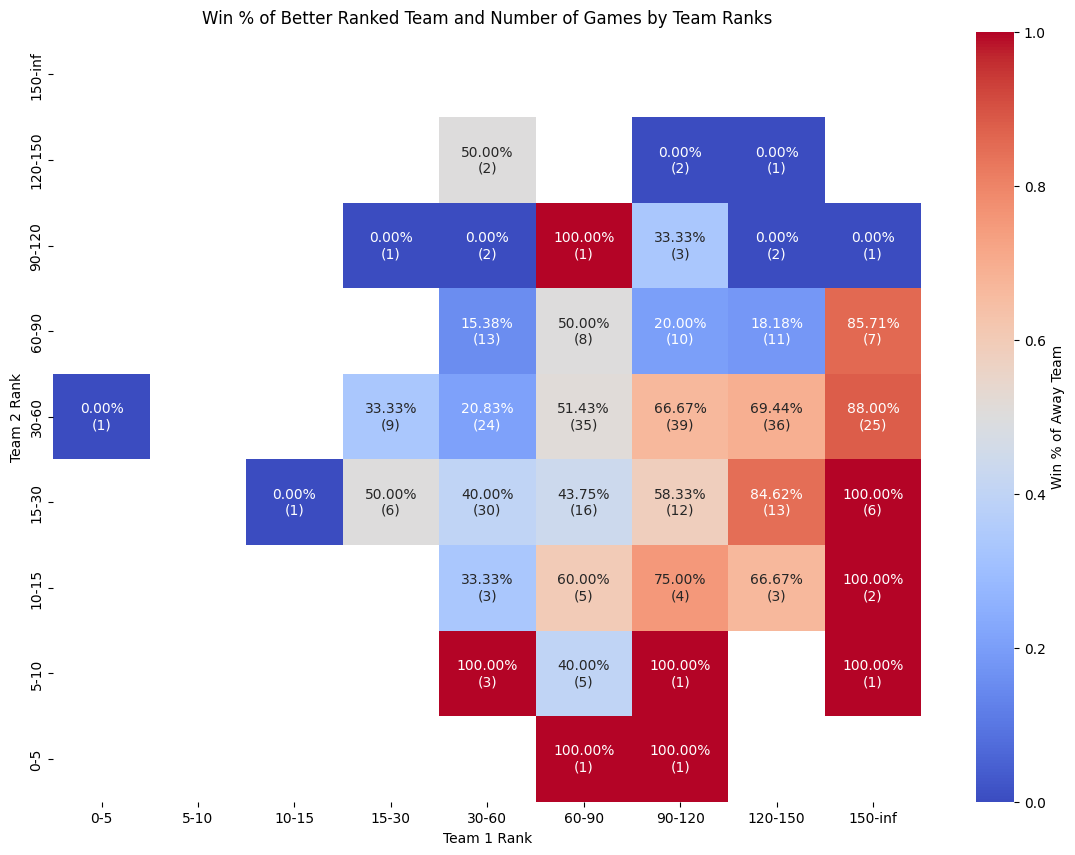

In [306]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Away Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Team 1 Rank')
plt.ylabel('Team 2 Rank')
plt.title('Win % of Better Ranked Team and Number of Games by Team Ranks')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/team1_rank_team2_rank_{plot_type}.png') 
plt.show()

### Team 1 Value vs Team 2 Value (RE-DONE)

In [131]:
plot_type = '∆Rank ≤15 Win rate of less valuable team' #'MV Chart - Win rate of away team'
#latest_match_data = latest_match_data[(latest_match_data['Competition'] != 'Euros') & (latest_match_data['Competition'] != 'World Cup') & (latest_match_data['Competition'] != 'Copa America') & (latest_match_data['Competition'] != 'Gold Cup') & (latest_match_data['Competition'] != 'Olympics') & (latest_match_data['Competition'] != 'World Cup Qualifiers, UEFA') & (latest_match_data['Competition'] != 'World Cup Intercontinental Playoffs') & (latest_match_data['Competition'] != 'Africa Cup of Nations')]


# Define the intervals (bins)
team_value_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(team_value_intervals) - 1):
    team1_lower_bound = team_value_intervals[i]
    team1_upper_bound = team_value_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team.1.Total.Market.Value'] >= team1_lower_bound) &
                                            (latest_match_data['Team.1.Total.Market.Value'] < team1_upper_bound)]
    
    for j in range(len(team_value_intervals) - 1):
        team2_lower_bound = team_value_intervals[j]
        team2_upper_bound = team_value_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team.2.Total.Market.Value'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team.2.Total.Market.Value'] < team2_upper_bound)]
        
        # Count the number of rows
        row_count = len(team2_filtered_data)
        
        results.append({
            'team1_value_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_value_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='team2_value_interval', columns='team1_value_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '1000000.0-10000000.0',
    '0-1000000.0'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

team1_value_interval     0-1000000.0  1000000.0-10000000.0  \
team2_value_interval                                         
500000000.0-inf                    0                     0   
100000000.0-500000000.0            0                     2   
50000000.0-100000000.0             0                     6   
10000000.0-50000000.0              7                    50   
1000000.0-10000000.0              29                   112   
0-1000000.0                       53                    33   

team1_value_interval     10000000.0-50000000.0  50000000.0-100000000.0  \
team2_value_interval                                                     
500000000.0-inf                              1                       1   
100000000.0-500000000.0                     44                      52   
50000000.0-100000000.0                      57                      40   
10000000.0-50000000.0                      122                      59   
1000000.0-10000000.0                        61                       6   
0-1000000.0                                  4                       0   

team1_value_interval     100000000.0-500000000.0  500000000.0-inf  
team2_value_interval                                               
500000000.0-inf                               28                7  
100000000.0-500000000.0                      205               30  
50000000.0-100000000.0                        51                1  
10000000.0-50000000.0                         57                2  
1000000.0-10000000.0                           3                0  
0-1000000.0                                    0                0

In [132]:
# Subset the data
subset_1e6 = latest_match_data[latest_match_data['Team.1.Total.Market.Value'] <= 1e6]

# Define the intervals (bins)
team_value_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(team_value_intervals) - 1):
    team1_lower_bound = team_value_intervals[i]
    team1_upper_bound = team_value_intervals[i + 1]
    
    team1_filtered_data = latest_match_data[(latest_match_data['Team.1.Total.Market.Value'] >= team1_lower_bound) &
                                            (latest_match_data['Team.1.Total.Market.Value'] < team1_upper_bound)]
    
    for j in range(len(team_value_intervals) - 1):
        team2_lower_bound = team_value_intervals[j]
        team2_upper_bound = team_value_intervals[j + 1]
        
        team2_filtered_data = team1_filtered_data[(team1_filtered_data['Team.2.Total.Market.Value'] >= team2_lower_bound) &
                                                  (team1_filtered_data['Team.2.Total.Market.Value'] < team2_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = team2_filtered_data['MV_Prediction_Correct_inverse'].sum()
        
        results.append({
            'team1_value_interval': f"{team1_lower_bound}-{team1_upper_bound}",
            'team2_value_interval': f"{team2_lower_bound}-{team2_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='team2_value_interval', columns='team1_value_interval', values='sum_mv_prediction_correct').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '1000000.0-10000000.0',
    '0-1000000.0'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

team1_value_interval     0-1000000.0  1000000.0-10000000.0  \
team2_value_interval                                         
500000000.0-inf                    0                     0   
100000000.0-500000000.0            0                     0   
50000000.0-100000000.0             0                     1   
10000000.0-50000000.0              0                    11   
1000000.0-10000000.0               5                    36   
0-1000000.0                       16                     4   

team1_value_interval     10000000.0-50000000.0  50000000.0-100000000.0  \
team2_value_interval                                                     
500000000.0-inf                              0                       0   
100000000.0-500000000.0                      7                      18   
50000000.0-100000000.0                      22                      14   
10000000.0-50000000.0                       31                      12   
1000000.0-10000000.0                        13                       0   
0-1000000.0                                  0                       0   

team1_value_interval     100000000.0-500000000.0  500000000.0-inf  
team2_value_interval                                               
500000000.0-inf                               11                3  
100000000.0-500000000.0                       57                5  
50000000.0-100000000.0                         7                0  
10000000.0-50000000.0                         14                0  
1000000.0-10000000.0                           0                0  
0-1000000.0                                    0                0

In [133]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

team1_value_interval     0-1000000.0  1000000.0-10000000.0  \
team2_value_interval                                         
500000000.0-inf                  NaN                   NaN   
100000000.0-500000000.0          NaN              0.000000   
50000000.0-100000000.0           NaN              0.166667   
10000000.0-50000000.0       0.000000              0.220000   
1000000.0-10000000.0        0.172414              0.321429   
0-1000000.0                 0.301887              0.121212   

team1_value_interval     10000000.0-50000000.0  50000000.0-100000000.0  \
team2_value_interval                                                     
500000000.0-inf                       0.000000                0.000000   
100000000.0-500000000.0               0.159091                0.346154   
50000000.0-100000000.0                0.385965                0.350000   
10000000.0-50000000.0                 0.254098                0.203390   
1000000.0-10000000.0                  0.213115                0.000000   
0-1000000.0                           0.000000                     NaN   

team1_value_interval     100000000.0-500000000.0  500000000.0-inf  
team2_value_interval                                               
500000000.0-inf                         0.392857         0.428571  
100000000.0-500000000.0                 0.278049         0.166667  
50000000.0-100000000.0                  0.137255         0.000000  
10000000.0-50000000.0                   0.245614         0.000000  
1000000.0-10000000.0                    0.000000              NaN  
0-1000000.0                                  NaN              NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/1196652026.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/1196652026.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_47861/1196652026.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of 

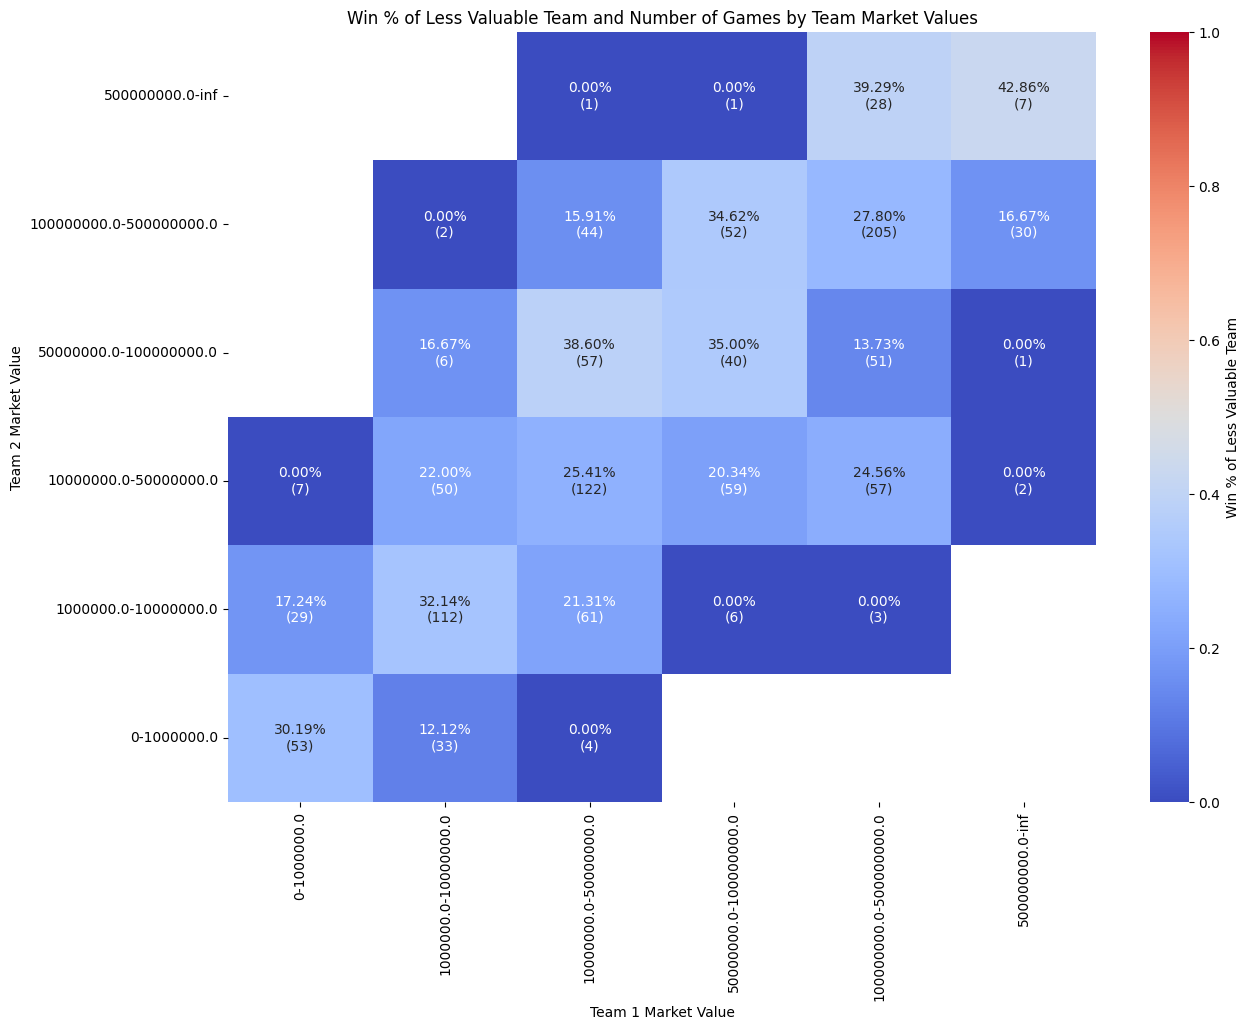

In [134]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Team 1 Market Value')
plt.ylabel('Team 2 Market Value')
plt.title('Win % of Less Valuable Team and Number of Games by Team Market Values')
plt.savefig(f'/Users/finneganlaister-smith/Downloads/team1_MV_team2_MV_{plot_type}.png') 
plt.show()

### MV difference vs Ranking difference, straigth up

#### plot the win % of the more/less valubale team, and the better/worse ranked team

In [30]:
# Subset the data
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[j]
        rank_upper_bound = rank_difference_abs_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (mv_filtered_data['rank_difference_abs'] < rank_upper_bound)]
        
        # Count the number of rows
        row_count = len(rank_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='rank_difference_abs_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '10-15',
    '5-10',
    '0-5'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval    0-1000000.0  1000000.0-10000000.0  \
rank_difference_abs_interval                                      
150-inf                                 0                     0   
120-150                                 0                     1   
90-120                                  4                     6   
60-90                                  17                    24   
30-60                                  56                    90   
15-30                                  49                    88   
10-15                                  13                    36   
5-10                                   21                    40   
0-5                                    17                    30   

mv_difference_abs_interval    10000000.0-50000000.0  50000000.0-100000000.0  \
rank_difference_abs_interval                                                  
150-inf                                           0                       0   
120-150                                           1                       0   
90-120                                            0                       0   
60-90                                            12                       4   
30-60                                            52                       8   
15-30                                            66                      18   
10-15                                            37                      20   
5-10                                             40                      19   
0-5                                              30                      20   

mv_difference_abs_interval    100000000.0-500000000.0  500000000.0-inf  
rank_difference_abs_interval                                            
150-inf                                             0                0  
120-150                                             0                0  
90-120                                              0                0  
60-90                                               0                0  
30-60                                               3                0  
15-30                                               4                0  
10-15                                               7                0  
5-10                                               23                0  
0-5                                                22                1

In [31]:
# Subset the data
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
rank_difference_abs_intervals = [0, 5, 10, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(rank_difference_abs_intervals) - 1):
        rank_lower_bound = rank_difference_abs_intervals[j]
        rank_upper_bound = rank_difference_abs_intervals[j + 1]
        
        rank_filtered_data = mv_filtered_data[(mv_filtered_data['rank_difference_abs'] >= rank_lower_bound) &
                                              (mv_filtered_data['rank_difference_abs'] < rank_upper_bound)]
        
        #DATA COLUMN FOR HEAT MAP 
        mv_prediction_sum = rank_filtered_data['MV_Prediction_Correct'].sum()
        #rank_prediction_sum = rank_filtered_data['rank_prediction_correct'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'rank_difference_abs_interval': f"{rank_lower_bound}-{rank_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='rank_difference_abs_interval', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '10-15',
    '5-10',
    '0-5'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval    0-1000000.0  1000000.0-10000000.0  \
rank_difference_abs_interval                                      
150-inf                                 0                     0   
120-150                                 0                     1   
90-120                                  1                     2   
60-90                                   3                     7   
30-60                                  15                    35   
15-30                                  18                    41   
10-15                                   3                    15   
5-10                                    8                    21   
0-5                                     9                    13   

mv_difference_abs_interval    10000000.0-50000000.0  50000000.0-100000000.0  \
rank_difference_abs_interval                                                  
150-inf                                           0                       0   
120-150                                           1                       0   
90-120                                            0                       0   
60-90                                             3                       2   
30-60                                            23                       2   
15-30                                            22                       9   
10-15                                            10                       8   
5-10                                             12                      11   
0-5                                              10                       5   

mv_difference_abs_interval    100000000.0-500000000.0  500000000.0-inf  
rank_difference_abs_interval                                            
150-inf                                             0                0  
120-150                                             0                0  
90-120                                              0                0  
60-90                                               0                0  
30-60                                               1                0  
15-30                                               3                0  
10-15                                               5                0  
5-10                                               12                0  
0-5                                                12                1

In [32]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval    0-1000000.0  1000000.0-10000000.0  \
rank_difference_abs_interval                                      
150-inf                               NaN                   NaN   
120-150                               NaN              1.000000   
90-120                           0.250000              0.333333   
60-90                            0.176471              0.291667   
30-60                            0.267857              0.388889   
15-30                            0.367347              0.465909   
10-15                            0.230769              0.416667   
5-10                             0.380952              0.525000   
0-5                              0.529412              0.433333   

mv_difference_abs_interval    10000000.0-50000000.0  50000000.0-100000000.0  \
rank_difference_abs_interval                                                  
150-inf                                         NaN                     NaN   
120-150                                    1.000000                     NaN   
90-120                                          NaN                     NaN   
60-90                                      0.250000                0.500000   
30-60                                      0.442308                0.250000   
15-30                                      0.333333                0.500000   
10-15                                      0.270270                0.400000   
5-10                                       0.300000                0.578947   
0-5                                        0.333333                0.250000   

mv_difference_abs_interval    100000000.0-500000000.0  500000000.0-inf  
rank_difference_abs_interval                                            
150-inf                                           NaN              NaN  
120-150                                           NaN              NaN  
90-120                                            NaN              NaN  
60-90                                             NaN              NaN  
30-60                                        0.333333              NaN  
15-30                                        0.750000              NaN  
10-15                                        0.714286              NaN  
5-10                                         0.521739              NaN  
0-5                                          0.545455              1.0

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_21561/1798581390.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'


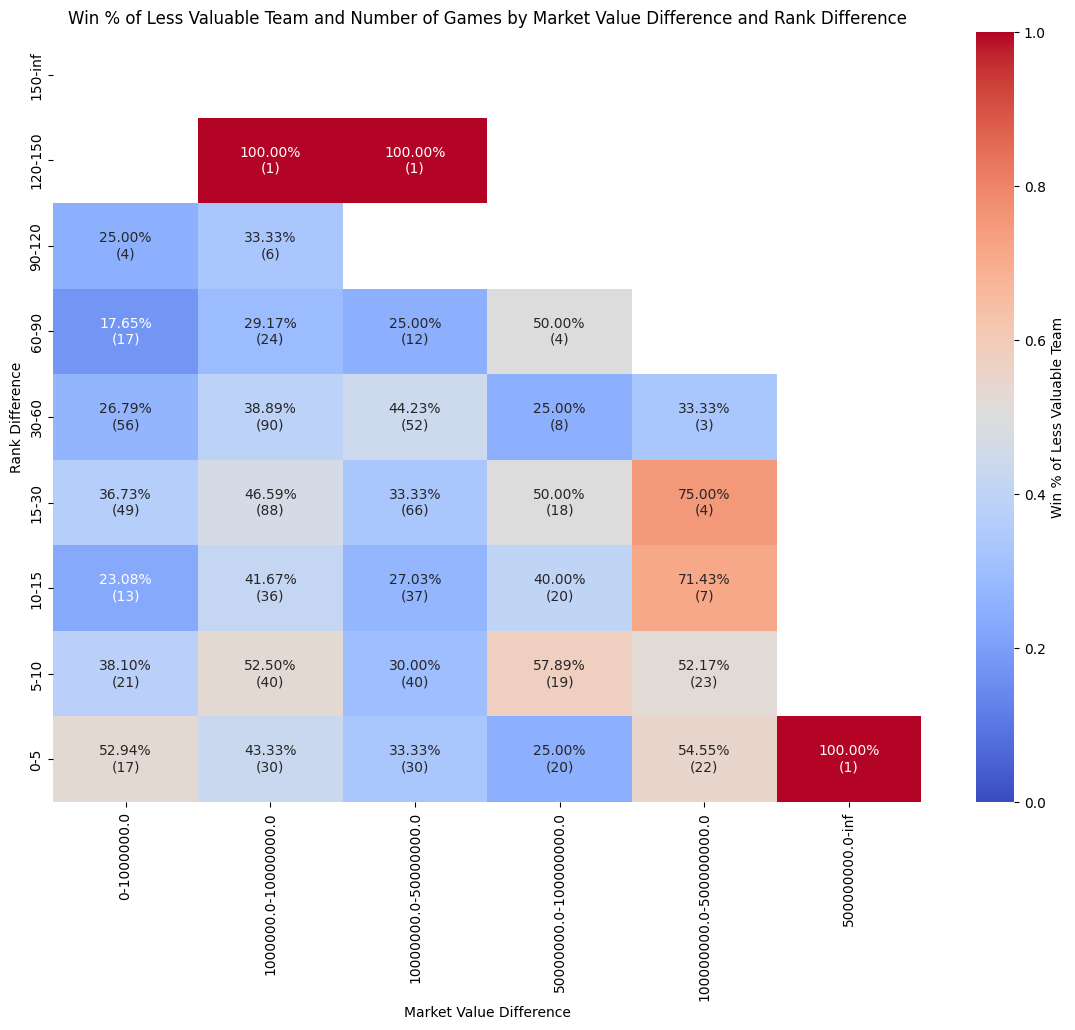

In [33]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference')
plt.ylabel('Rank Difference')
plt.title('Win % of Less Valuable Team and Number of Games by Market Value Difference and Rank Difference')
plt.show()

### Ranking difference vs rank of lower team 

In [55]:
rank_difference_abs_intervals = [0, 15, 30, 60, 90, 120, 150, np.inf]
smaller_team_rank_intervals = [0, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_difference_abs_lower_bound = rank_difference_abs_intervals[i]
    rank_difference_abs_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_difference_abs_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_difference_abs_lower_bound) &
                                         (latest_match_data['rank_difference_abs'] < rank_difference_abs_upper_bound)]
    
    for j in range(len(smaller_team_rank_intervals) - 1):
        team_lower_bound = smaller_team_rank_intervals[j]
        team_upper_bound = smaller_team_rank_intervals[j + 1]
        
        team_filtered_data = rank_difference_abs_filtered_data[(rank_difference_abs_filtered_data['smaller_team_rank'] >= team_lower_bound) &
                                              (rank_difference_abs_filtered_data['smaller_team_rank'] < team_upper_bound)]
        
        # Count the number of rows
        row_count = len(team_filtered_data)
        
        results.append({
            'rank_difference_abs_interval': f"{rank_difference_abs_lower_bound}-{rank_difference_abs_upper_bound}",
            'smaller_team_rank_interval': f"{team_lower_bound}-{team_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='smaller_team_rank_interval', columns='rank_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '0-15'
]


new_col_order = [
    '0-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table


rank_difference_abs_interval  0-15  15-30  30-60  60-90  90-120  120-150  \
smaller_team_rank_interval                                                 
150-inf                         75     95    215    190     179      167   
120-150                         72    109    256    251     188       45   
90-120                          90    140    321    286      91        0   
60-90                          176    235    402    173       0        0   
30-60                          257    324    309      0       0        0   
15-30                          231    134      0      0       0        0   
0-15                           168      0      0      0       0        0   

rank_difference_abs_interval  150-inf  
smaller_team_rank_interval             
150-inf                           140  
120-150                             0  
90-120                              0  
60-90                               0  
30-60                               0  
15-30                               0  
0-15                                0

In [56]:

# Define the intervals (bins)
rank_difference_abs_intervals = [0, 15, 30, 60, 90, 120, 150, np.inf]
smaller_team_rank_intervals = [0, 15, 30, 60, 90, 120, 150, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(rank_difference_abs_intervals) - 1):
    rank_difference_abs_lower_bound = rank_difference_abs_intervals[i]
    rank_difference_abs_upper_bound = rank_difference_abs_intervals[i + 1]
    
    rank_difference_abs_filtered_data = latest_match_data[(latest_match_data['rank_difference_abs'] >= rank_difference_abs_lower_bound) &
                                         (latest_match_data['rank_difference_abs'] < rank_difference_abs_upper_bound)]
    
    for j in range(len(smaller_team_rank_intervals) - 1):
        team_lower_bound = smaller_team_rank_intervals[j]
        team_upper_bound = smaller_team_rank_intervals[j + 1]
        
        team_filtered_data = rank_difference_abs_filtered_data[(rank_difference_abs_filtered_data['smaller_team_rank'] >= team_lower_bound) &
                                              (rank_difference_abs_filtered_data['smaller_team_rank'] < team_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        rank_prediction_sum = team_filtered_data['rank_prediction_correct'].sum()
        
        results.append({
            'rank_difference_abs_interval': f"{rank_difference_abs_lower_bound}-{rank_difference_abs_upper_bound}",
            'smaller_team_rank_interval': f"{team_lower_bound}-{team_upper_bound}",
            'sum_rank_prediction_correct': rank_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='smaller_team_rank_interval', columns='rank_difference_abs_interval', values='sum_rank_prediction_correct').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '150-inf',
    '120-150',
    '90-120',
    '60-90',
    '30-60',
    '15-30',
    '0-15'
]

new_col_order = [
    '0-15',
    '15-30',
    '30-60',
    '60-90',
    '90-120',
    '120-150',
    '150-inf'
]

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

rank_difference_abs_interval  0-15  15-30  30-60  60-90  90-120  120-150  \
smaller_team_rank_interval                                                 
150-inf                         31     20     35     15      10        4   
120-150                         18     30     58     36      11        2   
90-120                          27     36     55     33       7        0   
60-90                           45     54     71     17       0        0   
30-60                           83     81     52      0       0        0   
15-30                           69     25      0      0       0        0   
0-15                            44      0      0      0       0        0   

rank_difference_abs_interval  150-inf  
smaller_team_rank_interval             
150-inf                             2  
120-150                             0  
90-120                              0  
60-90                               0  
30-60                               0  
15-30                               0  
0-15                                0

In [58]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

rank_difference_abs_interval      0-15     15-30     30-60     60-90  \
smaller_team_rank_interval                                             
150-inf                       0.413333  0.210526  0.162791  0.078947   
120-150                       0.250000  0.275229  0.226562  0.143426   
90-120                        0.300000  0.257143  0.171340  0.115385   
60-90                         0.255682  0.229787  0.176617  0.098266   
30-60                         0.322957  0.250000  0.168285       NaN   
15-30                         0.298701  0.186567       NaN       NaN   
0-15                          0.261905       NaN       NaN       NaN   

rank_difference_abs_interval    90-120   120-150   150-inf  
smaller_team_rank_interval                                  
150-inf                       0.055866  0.023952  0.014286  
120-150                       0.058511  0.044444       NaN  
90-120                        0.076923       NaN       NaN  
60-90                              NaN       NaN       NaN  
30-60                              NaN       NaN       NaN  
15-30                              NaN       NaN       NaN  
0-15                               NaN       NaN       NaN

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_43590/1912816486.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '41.33%
(75)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_43590/1912816486.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '21.05%
(95)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_43590/1912816486.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future erro

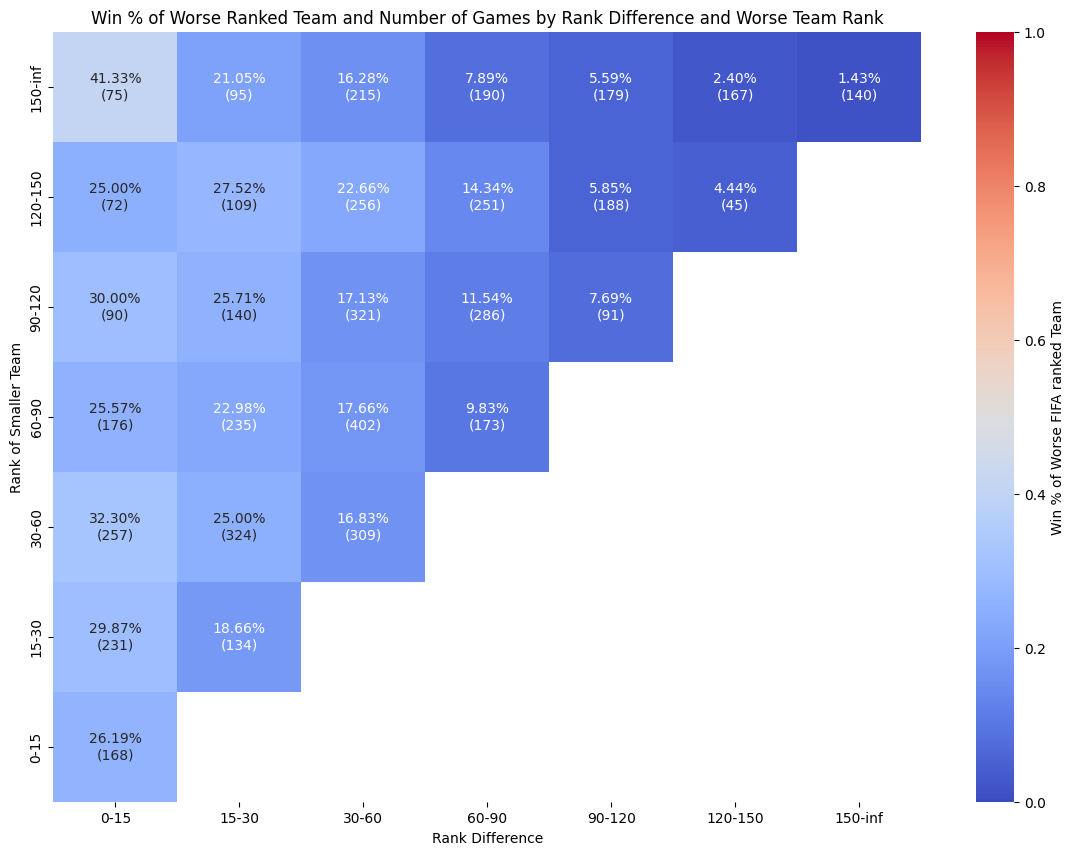

In [60]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'Win % of Worse FIFA ranked Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Rank Difference')
plt.ylabel('Rank of Smaller Team')
plt.title('Win % of Worse Ranked Team and Number of Games by Rank Difference and Worse Team Rank')
plt.show()

## Attempt 2 - MV difference against value of lower team 

#### heatmap table - number of rows

In [29]:
# Subset the data
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
smaller_team_value_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(smaller_team_value_intervals) - 1):
        team_lower_bound = smaller_team_value_intervals[j]
        team_upper_bound = smaller_team_value_intervals[j + 1]
        
        team_filtered_data = mv_filtered_data[(mv_filtered_data['smaller_team_value'] >= team_lower_bound) &
                                              (mv_filtered_data['smaller_team_value'] < team_upper_bound)]
        
        # Count the number of rows
        row_count = len(team_filtered_data)
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'smaller_team_value_interval': f"{team_lower_bound}-{team_upper_bound}",
            'count': row_count
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table = results_df.pivot(index='smaller_team_value_interval', columns='mv_difference_abs_interval', values='count').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '1000000.0-10000000.0',
    '0-1000000.0'
]


new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table = pivot_table.reindex(index=new_row_order, columns=new_col_order)
pivot_table

mv_difference_abs_interval   0-1000000.0  1000000.0-10000000.0  \
smaller_team_value_interval                                      
500000000.0-inf                        0                     1   
100000000.0-500000000.0                3                    23   
50000000.0-100000000.0                 4                    32   
10000000.0-50000000.0                 24                   174   
1000000.0-10000000.0                 147                   540   
0-1000000.0                          279                   383   

mv_difference_abs_interval   10000000.0-50000000.0  50000000.0-100000000.0  \
smaller_team_value_interval                                                  
500000000.0-inf                                  1                       2   
100000000.0-500000000.0                         80                      72   
50000000.0-100000000.0                          90                      86   
10000000.0-50000000.0                          405                     305   
1000000.0-10000000.0                           736                     280   
0-1000000.0                                    242                      75   

mv_difference_abs_interval   100000000.0-500000000.0  500000000.0-inf  
smaller_team_value_interval                                            
500000000.0-inf                                    3                0  
100000000.0-500000000.0                          236               14  
50000000.0-100000000.0                           152               14  
10000000.0-50000000.0                            442               37  
1000000.0-10000000.0                             342               11  
0-1000000.0                                       81                3

### heatmap table - num WINS

In [30]:
# Subset the data
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]

# Define the intervals (bins)
mv_difference_abs_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
smaller_team_value_intervals = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Create an empty list to store results
results = []

# Loop through the intervals and filter data
for i in range(len(mv_difference_abs_intervals) - 1):
    mv_lower_bound = mv_difference_abs_intervals[i]
    mv_upper_bound = mv_difference_abs_intervals[i + 1]
    
    mv_filtered_data = latest_match_data[(latest_match_data['mv_difference_abs'] >= mv_lower_bound) &
                                         (latest_match_data['mv_difference_abs'] < mv_upper_bound)]
    
    for j in range(len(smaller_team_value_intervals) - 1):
        team_lower_bound = smaller_team_value_intervals[j]
        team_upper_bound = smaller_team_value_intervals[j + 1]
        
        team_filtered_data = mv_filtered_data[(mv_filtered_data['smaller_team_value'] >= team_lower_bound) &
                                              (mv_filtered_data['smaller_team_value'] < team_upper_bound)]
        
        # Sum the MV_Prediction_Correct values
        mv_prediction_sum = team_filtered_data['MV_Prediction_Correct'].sum()
        
        results.append({
            'mv_difference_abs_interval': f"{mv_lower_bound}-{mv_upper_bound}",
            'smaller_team_value_interval': f"{team_lower_bound}-{team_upper_bound}",
            'sum_mv_prediction_correct': mv_prediction_sum
        })

# Convert the results into a DataFrame
results_df_wins = pd.DataFrame(results)

# Pivot the results DataFrame
pivot_table_wins = results_df_wins.pivot(index='smaller_team_value_interval', columns='mv_difference_abs_interval', values='sum_mv_prediction_correct').fillna(0)

# Define the new order for rows and columns
new_row_order = [
    '500000000.0-inf',
    '100000000.0-500000000.0',
    '50000000.0-100000000.0',
    '10000000.0-50000000.0',
    '1000000.0-10000000.0',
    '0-1000000.0'
]

new_col_order = [
    '0-1000000.0',
    '1000000.0-10000000.0',
    '10000000.0-50000000.0',
    '50000000.0-100000000.0',
    '100000000.0-500000000.0',
    '500000000.0-inf'
]

# Reindex the pivot table
pivot_table_wins = pivot_table_wins.reindex(index=new_row_order, columns=new_col_order)
pivot_table_wins

mv_difference_abs_interval   0-1000000.0  1000000.0-10000000.0  \
smaller_team_value_interval                                      
500000000.0-inf                        0                     1   
100000000.0-500000000.0                1                    10   
50000000.0-100000000.0                 0                     9   
10000000.0-50000000.0                 10                    52   
1000000.0-10000000.0                  49                   131   
0-1000000.0                           64                    38   

mv_difference_abs_interval   10000000.0-50000000.0  50000000.0-100000000.0  \
smaller_team_value_interval                                                  
500000000.0-inf                                  0                       2   
100000000.0-500000000.0                         32                      21   
50000000.0-100000000.0                          28                      27   
10000000.0-50000000.0                          112                      55   
1000000.0-10000000.0                           100                      26   
0-1000000.0                                     12                       3   

mv_difference_abs_interval   100000000.0-500000000.0  500000000.0-inf  
smaller_team_value_interval                                            
500000000.0-inf                                    0                0  
100000000.0-500000000.0                           47                1  
50000000.0-100000000.0                            17                3  
10000000.0-50000000.0                             51                0  
1000000.0-10000000.0                              14                0  
0-1000000.0                                        1                0

### Pivot table and chart

In [31]:
pivot_table_percentage = pivot_table_wins / pivot_table
pivot_table_percentage

mv_difference_abs_interval   0-1000000.0  1000000.0-10000000.0  \
smaller_team_value_interval                                      
500000000.0-inf                      NaN              1.000000   
100000000.0-500000000.0         0.333333              0.434783   
50000000.0-100000000.0          0.000000              0.281250   
10000000.0-50000000.0           0.416667              0.298851   
1000000.0-10000000.0            0.333333              0.242593   
0-1000000.0                     0.229391              0.099217   

mv_difference_abs_interval   10000000.0-50000000.0  50000000.0-100000000.0  \
smaller_team_value_interval                                                  
500000000.0-inf                           0.000000                1.000000   
100000000.0-500000000.0                   0.400000                0.291667   
50000000.0-100000000.0                    0.311111                0.313953   
10000000.0-50000000.0                     0.276543                0.180328   
1000000.0-10000000.0                      0.135870                0.092857   
0-1000000.0                               0.049587                0.040000   

mv_difference_abs_interval   100000000.0-500000000.0  500000000.0-inf  
smaller_team_value_interval                                            
500000000.0-inf                             0.000000              NaN  
100000000.0-500000000.0                     0.199153         0.071429  
50000000.0-100000000.0                      0.111842         0.214286  
10000000.0-50000000.0                       0.115385         0.000000  
1000000.0-10000000.0                        0.040936         0.000000  
0-1000000.0                                 0.012346         0.000000

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_43590/2582112184.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan%
(0)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_43590/2582112184.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '100.00%
(1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_43590/2582112184.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error o

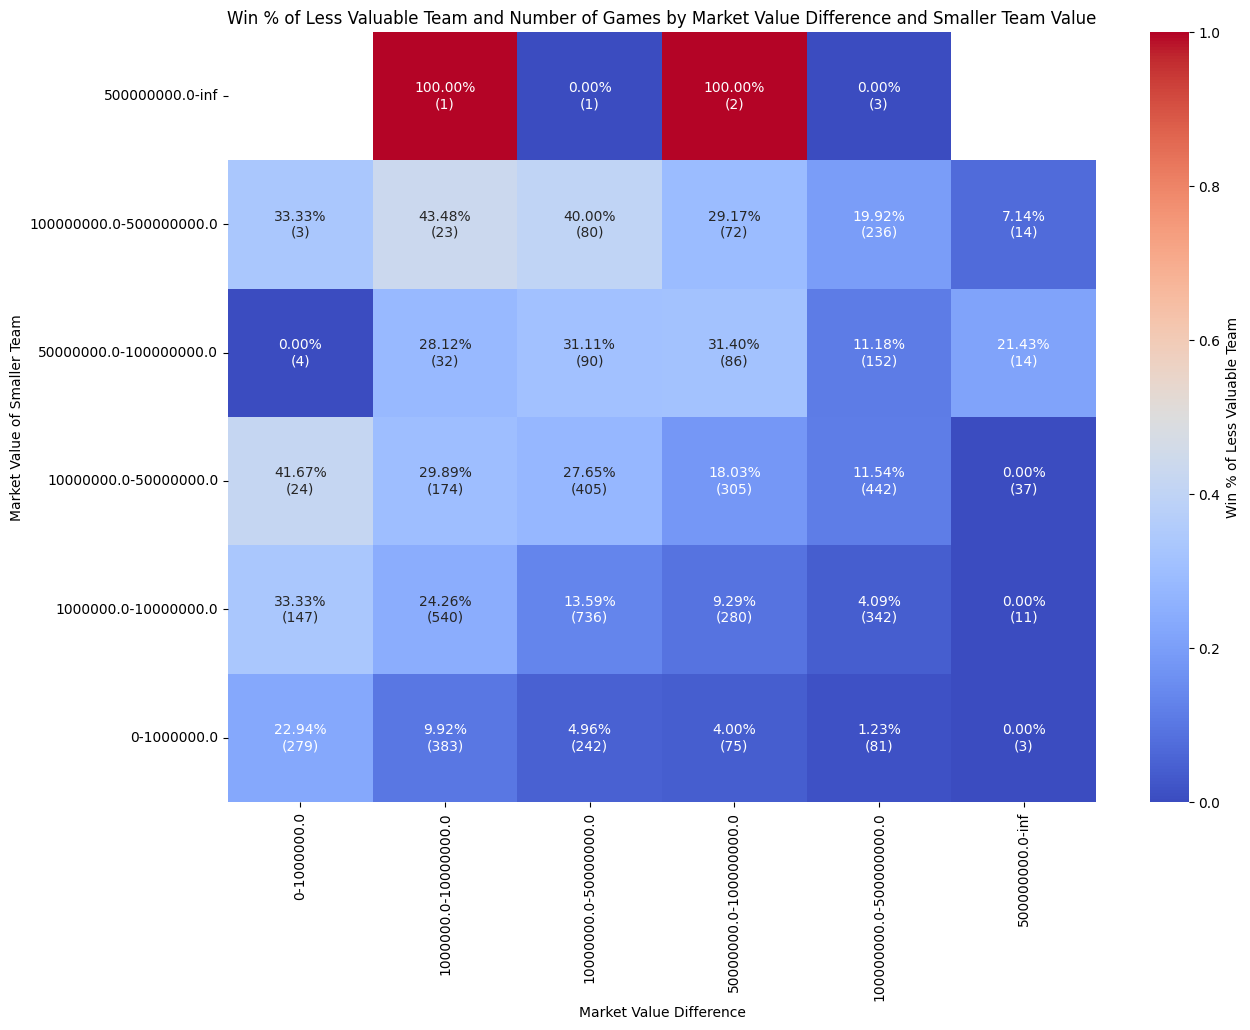

In [34]:
# Create a new DataFrame for annotations with win percentage and number of games
annotations = pivot_table_percentage.copy()
for i, row in enumerate(pivot_table_percentage.index):
    for j, col in enumerate(pivot_table_percentage.columns):
        annotations.iloc[i, j] = f'{pivot_table_percentage.iloc[i, j]*100:.2f}%\n({int(pivot_table.iloc[i, j])})'

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_table_percentage, annot=annotations, fmt='', cmap='coolwarm', cbar_kws={'label': 'Win % of Less Valuable Team'}, yticklabels=pivot_table_percentage.index, xticklabels=pivot_table_percentage.columns)
plt.xlabel('Market Value Difference')
plt.ylabel('Market Value of Smaller Team')
plt.title('Win % of Less Valuable Team and Number of Games by Market Value Difference and Smaller Team Value')
plt.show()

## attempt 1 (OLD NOW)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define bins
value_diff_bins = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
smaller_team_value_bins = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Bin the data
latest_match_data['value_diff_bin'] = pd.cut(latest_match_data['mv_difference_abs'], bins=value_diff_bins)
latest_match_data['smaller_team_value_bin'] = pd.cut(latest_match_data['smaller_team_value'], bins=smaller_team_value_bins)

# Verify the binning process
print(latest_match_data[['mv_difference_abs', 'value_diff_bin', 'smaller_team_value', 'smaller_team_value_bin']].head())

# Calculate win percentage for each bin
heatmap_data = latest_match_data.groupby(['value_diff_bin', 'smaller_team_value_bin'])['MV_Prediction_Correct'].mean().unstack()

# Calculate sample size for each bin
sample_size_data = latest_match_data.groupby(['value_diff_bin', 'smaller_team_value_bin']).size().unstack()

# Combine win percentage and sample size into annotations
annotations = heatmap_data.round(2).astype(str) + "\n(" + sample_size_data.astype(str) + ")"

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=annotations, fmt='', cmap='coolwarm', cbar_kws={'label': 'Win % of More Valuable Team'}, yticklabels=heatmap_data.index[::-1])
plt.xlabel('Market Value Difference')
plt.ylabel('Market Value of Smaller Team')
plt.title('Win % of More Valuable Team by Market Value Difference and Smaller Team Value')
plt.show()

# Verify the sample size for a specific bin
subset = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]
print(f"Sample size for mv_difference_abs <= 1e6: {len(subset)}")

In [ ]:
import pandas as pd
import numpy as np

# Define bins
value_diff_bins = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]
smaller_team_value_bins = [0, 1e6, 10e6, 50e6, 100e6, 500e6, np.inf]

# Function to count samples in each bin
def count_samples(data, team_value_bins):
    bin_counts = []
    for team_value_bin in team_value_bins:
        count = data[(data['smaller_team_value'] > team_value_bin.left) & (data['smaller_team_value'] <= team_value_bin.right)].shape[0]
        bin_counts.append(count)
    return bin_counts

# Create a dictionary to store the counts for each value_diff_bin
sample_size_data = {}

# Iterate over each value_diff_bin and count samples for each smaller_team_value_bin
for i in range(len(value_diff_bins) - 1):
    lower_bound = value_diff_bins[i]
    upper_bound = value_diff_bins[i + 1]
    subset = latest_match_data[(latest_match_data['mv_difference_abs'] > lower_bound) & (latest_match_data['mv_difference_abs'] <= upper_bound)]
    sample_size_data[f'({lower_bound}, {upper_bound}]'] = count_samples(subset, pd.cut(subset['smaller_team_value'], bins=smaller_team_value_bins).cat.categories)

# Convert the dictionary to a DataFrame for better visualization
sample_size_df = pd.DataFrame(sample_size_data, index=pd.cut(latest_match_data['smaller_team_value'], bins=smaller_team_value_bins).cat.categories).T

# Print the sample size data
print("Sample size data (number of games in each bin):")
print(sample_size_df)

# Verify the sample size for specific bins
subset_1e6 = latest_match_data[latest_match_data['mv_difference_abs'] <= 1e6]
print(f"\nSample size for mv_difference_abs <= 1e6: {len(subset_1e6)}")

subset_500e6_inf = latest_match_data[latest_match_data['mv_difference_abs'] >= 500e6]
print(f"Sample size for mv_difference_abs >= 500e6: {len(subset_500e6_inf)}")

In [ ]:
#sanity checking 

#latest_match_data[latest_match_data['mv_difference_abs'] >= 500000000]#5*(10**8)#['Team.1.Total.Market.Value'].max()
latest_match_data[latest_match_data['mv_difference_abs'] <= (10**6)]#['Team.2.Total.Market.Value'].max()

In [ ]:
# Prepare data for continuous heatmap
heatmap_data_continuous = latest_match_data.pivot_table(index='mv_difference_abs', 
                                           columns=latest_match_data[['Team.1.Total.Market.Value', 'Team.2.Total.Market.Value']].min(axis=1), 
                                           values='MV_Prediction_Correct')

# Plot continuous heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_continuous, cmap='coolwarm', cbar_kws={'label': 'Win % of More Valuable Team'})
plt.xlabel('Market Value Difference')
plt.ylabel('Market Value of Smaller Team')
plt.title('Win % of More Valuable Team by Market Value Difference and Smaller Team Value (Continuous)')
plt.show()